**STUDI KOMPARASI METODE HYPERPARAMETER TUNING UNTUK OPTIMASI SUPPORT VECTOR REGRESSION DALAM PREDIKSI HARGA RUMAH DI BANDUNG** <br>
Nama: Anisa Ulfa Rahmawati<br>
NIM: 22.11.5044<br>
Link dataset: https://www.kaggle.com/datasets/khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung<br>


### **1. DATA ACQUISITION** ###

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Semester 7/Skripsi/Dataset/results.csv"
df = pd.read_csv(path)

df.head()

Mounted at /content/drive


Rumah Premier  Rp 2,1 Miliar   Cicilan: 7 Jutaan per bulan  \
0  Rumah     NaN  Rp 4,1 Miliar  Cicilan: 15 Jutaan per bulan   
1  Rumah     NaN  Rp 3,3 Miliar  Cicilan: 12 Jutaan per bulan   
2  Rumah     NaN    Rp 580 Juta   Cicilan: 2 Jutaan per bulan   
3  Rumah     NaN  Rp 1,3 Miliar   Cicilan: 4 Jutaan per bulan   
4  Rumah     NaN  Rp 3,6 Miliar  Cicilan: 13 Jutaan per bulan   

  Rumah 2 Lantai Bagus Sertifikat Hak Milik di Maltra Residence, Bandung  \
0                    Rumah Cantik @ Andir (Sudirman)                       
1  Jual Cepat Rumah di Maleber Rajawali Bisa Untu...                       
2  Rumah minimalis 3 lantai di andir Bandung coco...                       
3  Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...                       
4  Rumah 2,5 Lantai Strategis SHM di Komplek Kert...                       

   Andir, Bandung   3  2  2.1  137 m²  170 m²  
0  Andir, Bandung   3  2    3  202 m²  300 m²  
1  Andir, Bandung   5  2    1  350 m²  258 m²  
2  Andir, Bandung   2  2    1   30 m²   80 m²  
3  Andir, Bandung  11  3    0  176 m²  176 m²  
4  Andir, Bandung   5  3    1  184 m²  234 m²

### **2. DATA PREPROCESSING** ###

In [ ]:
# Header kolom
df.columns = ["tipe", "status", "harga", "cicilan", "judul", "lokasi", "kt", "km", "carport", "luas_bangunan", "luas_tanah"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7610 entries, 0 to 7609
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tipe           7610 non-null   object
 1   status         144 non-null    object
 2   harga          7610 non-null   object
 3   cicilan        7610 non-null   object
 4   judul          7610 non-null   object
 5   lokasi         7610 non-null   object
 6   kt             7610 non-null   int64 
 7   km             7610 non-null   int64 
 8   carport        7610 non-null   int64 
 9   luas_bangunan  7608 non-null   object
 10  luas_tanah     7609 non-null   object
dtypes: int64(3), object(8)
memory usage: 654.1+ KB


In [ ]:
df.head()

tipe status          harga                       cicilan  \
0  Rumah    NaN  Rp 4,1 Miliar  Cicilan: 15 Jutaan per bulan   
1  Rumah    NaN  Rp 3,3 Miliar  Cicilan: 12 Jutaan per bulan   
2  Rumah    NaN    Rp 580 Juta   Cicilan: 2 Jutaan per bulan   
3  Rumah    NaN  Rp 1,3 Miliar   Cicilan: 4 Jutaan per bulan   
4  Rumah    NaN  Rp 3,6 Miliar  Cicilan: 13 Jutaan per bulan   

                                               judul          lokasi  kt  km  \
0                    Rumah Cantik @ Andir (Sudirman)  Andir, Bandung   3   2   
1  Jual Cepat Rumah di Maleber Rajawali Bisa Untu...  Andir, Bandung   5   2   
2  Rumah minimalis 3 lantai di andir Bandung coco...  Andir, Bandung   2   2   
3  Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...  Andir, Bandung  11   3   
4  Rumah 2,5 Lantai Strategis SHM di Komplek Kert...  Andir, Bandung   5   3   

   carport luas_bangunan luas_tanah  
0        3        202 m²     300 m²  
1        1        350 m²     258 m²  
2        1         30 m²      80 m²  
3        0        176 m²     176 m²  
4        1        184 m²     234 m²

In [ ]:
# Pembersihan
def parse_harga(val):
    if pd.isnull(val):
        return None
    val_str = str(val)
    cleaned = (
        val_str.replace('Rp','')
               .replace('.','')
               .replace(',', '.')
               .replace(' ','')
               .strip()
    )

    try:
        if 'miliar' in val_str.lower():
            angka = cleaned.lower().replace('miliar','')
            return float(angka) * 1000
        if 'juta' in val_str.lower():
            angka = cleaned.lower().replace('juta','')
            return float(angka)
        if cleaned.replace('.', '', 1).isdigit():
            return float(cleaned) / 1_000_000
    except:
        return None
    return None

df['harga_rumah'] = df['harga'].apply(parse_harga)

def tampilkan_harga(val):
    if pd.isnull(val):
        return "-"
    elif val >= 1000:
        return f"Rp{val/1000:.1f} Miliar"
    else:
        return f"Rp{val:.0f} Juta"

df['harga_tampil'] = df['harga_rumah'].apply(tampilkan_harga)

In [ ]:
# Membersihkan kolom luas bangunan dan tanah
def clean_luas(val):
    if pd.isnull(val):
        return None
    s = str(val).lower()
    s = s.replace('m²','').replace('m2','').replace('m','').strip()
    s = ''.join(c for c in s if c.isdigit() or c=='.')

    if s == '':
        return None
    try:
        return float(s)
    except:
        return None

df['luas_bangunan'] = df['luas_bangunan'].apply(clean_luas)
df['luas_tanah']    = df['luas_tanah'].apply(clean_luas)

In [ ]:
# Drop kolom yang tidak digunakan
df = df.drop(columns=['tipe', 'status', 'cicilan', 'judul'])
print("Kolom telah dihapus.")

Kolom telah dihapus.


In [ ]:
# Mengecek missing value
print("Jumlah Missing Value per Kolom:\n")
print(df.isnull().sum())

# Cek total missing value
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing value di dataset: {total_missing}")

Jumlah Missing Value per Kolom:

harga            0
lokasi           0
kt               0
km               0
carport          0
luas_bangunan    2
luas_tanah       1
harga_rumah      0
harga_tampil     0
dtype: int64

Total missing value di dataset: 3


In [ ]:
# Menangani missing value
df = df.dropna(subset=['luas_bangunan', 'luas_tanah']).copy()
print("Missing value setelah ditangani (per kolom):")
print(df.isnull().sum())

Missing value setelah ditangani (per kolom):
harga            0
lokasi           0
kt               0
km               0
carport          0
luas_bangunan    0
luas_tanah       0
harga_rumah      0
harga_tampil     0
dtype: int64


In [ ]:
# NORMALISASI NAMA LOKASI
df['lokasi'] = (
    df['lokasi']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(', bandung', '', regex=False)
    .str.replace('-', ' ', regex=False)
    .str.replace(r'\s+', ' ', regex=True)
    .replace({
        'buahbatu': 'buah batu',
        'ujungberung': 'ujung berung',
        'sumurbandung': 'sumur bandung',
        'gede bage': 'gedebage',
        'babakanciparay': 'babakan ciparay',

        # tambahan administratif
        'bojongloa kaler bandung': 'bojongloa kaler',
        'cibeunying kaler bandung': 'cibeunying kaler',
        'cinambo bandung': 'cinambo',

        # normalisasi umum
        'andir bandung': 'andir',
        'antapani bandung': 'antapani',
        'arcamanik bandung': 'arcamanik',
        'astanaanyar bandung': 'astanaanyar',
        'babakan ciparay bandung': 'babakan ciparay',
        'bandung kidul bandung': 'bandung kidul',
        'bandung kulon bandung': 'bandung kulon',
        'bandung wetan bandung': 'bandung wetan',
        'batununggal bandung': 'batununggal',
        'bojongloa kidul bandung': 'bojongloa kidul',
        'buah batu bandung': 'buah batu',
        'cibeunying kidul bandung': 'cibeunying kidul',
        'cibiru bandung': 'cibiru',
        'cicendo bandung': 'cicendo',
        'cidadap bandung': 'cidadap',
        'coblong bandung': 'coblong',
        'gedebage bandung': 'gedebage',
        'kiaracondong bandung': 'kiaracondong',
        'lengkong bandung': 'lengkong',
        'mandalajati bandung': 'mandalajati',
        'panyileukan bandung': 'panyileukan',
        'rancasari bandung': 'rancasari',
        'regol bandung': 'regol',
        'sukajadi bandung': 'sukajadi',
        'sukasari bandung': 'sukasari',
        'sumur bandung bandung': 'sumur bandung',
        'ujung berung bandung': 'ujung berung'
    })
)

# MAPPING KECAMATAN
kecamatan_to_wilayah = {

    # UTARA
    'cidadap': 'utara',
    'coblong': 'utara',
    'sukajadi': 'utara',
    'sukasari': 'utara',
    'cibeunying kaler': 'utara',

    # TENGAH
    'andir': 'tengah',
    'astanaanyar': 'tengah',
    'cicendo': 'tengah',
    'sumur bandung': 'tengah',
    'bandung wetan': 'tengah',
    'regol': 'tengah',
    'lengkong': 'tengah',

    # BARAT
    'bandung kulon': 'barat',
    'bojongloa kaler': 'barat',
    'bojongloa kidul': 'barat',
    'babakan ciparay': 'barat',

    # SELATAN
    'bandung kidul': 'selatan',
    'batununggal': 'selatan',
    'buah batu': 'selatan',
    'kiaracondong': 'selatan',
    'cibeunying kidul': 'selatan',

    # TIMUR
    'antapani': 'timur',
    'arcamanik': 'timur',
    'cibiru': 'timur',
    'gedebage': 'timur',
    'mandalajati': 'timur',
    'panyileukan': 'timur',
    'rancasari': 'timur',
    'ujung berung': 'timur',
    'cinambo': 'timur'
}

# WILAYAH ENCODING
wilayah_mapping = {
    'utara': 1,
    'tengah': 2,
    'barat': 3,
    'selatan': 4,
    'timur': 5
}

In [ ]:
# Konversi kolom numerik ke angka
df_clean = df.copy()

for col in ['kt', 'km', 'carport', 'luas_bangunan', 'luas_tanah', 'harga_rumah']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
df_clean['lokasi'] = df['lokasi']
df_clean.head()

harga lokasi  kt  km  carport  luas_bangunan  luas_tanah  \
0  Rp 4,1 Miliar  andir   3   2        3          202.0       300.0   
1  Rp 3,3 Miliar  andir   5   2        1          350.0       258.0   
2    Rp 580 Juta  andir   2   2        1           30.0        80.0   
3  Rp 1,3 Miliar  andir  11   3        0          176.0       176.0   
4  Rp 3,6 Miliar  andir   5   3        1          184.0       234.0   

   harga_rumah  harga_tampil  
0       4100.0  Rp4.1 Miliar  
1       3300.0  Rp3.3 Miliar  
2        580.0    Rp580 Juta  
3       1300.0  Rp1.3 Miliar  
4       3600.0  Rp3.6 Miliar

In [ ]:
# Feature Engineering
df_clean['total_rooms'] = df_clean['kt'] + df_clean['km']
df_clean['luas_ratio'] = df_clean['luas_bangunan'] / df_clean['luas_tanah']
df_clean['kepadatan_kamar'] = df_clean['total_rooms'] / df_clean['luas_bangunan']
df_clean['sisa_lahan'] = df_clean['luas_tanah'] - df_clean['luas_bangunan']
df_clean['bangunan_log'] = np.log1p(df_clean['luas_bangunan'])
df_clean['harga_per_m2'] = df_clean['harga_rumah'] / df_clean['luas_bangunan']

In [ ]:
# Cek outliers
print("Data shape sebelum menghapus outlier:", df_clean.shape)
print(df_clean.describe())

Data shape sebelum menghapus outlier: (7608, 15)
                kt           km      carport  luas_bangunan    luas_tanah  \
count  7608.000000  7608.000000  7608.000000    7608.000000  7.608000e+03   
mean      4.477129     3.196635     1.374606     274.572029  6.426534e+02   
std       4.712784     4.105065     1.928196     440.579932  3.446124e+04   
min       0.000000     0.000000     0.000000       6.000000  1.000000e+00   
25%       3.000000     2.000000     0.000000     102.000000  1.000000e+02   
50%       4.000000     3.000000     1.000000     165.000000  1.800000e+02   
75%       5.000000     3.000000     2.000000     313.000000  3.000000e+02   
max      99.000000    99.000000    40.000000   11850.000000  3.006000e+06   

         harga_rumah  total_rooms   luas_ratio  kepadatan_kamar    sisa_lahan  \
count    7608.000000  7608.000000  7608.000000      7608.000000  7.608000e+03   
mean     4982.325381     7.673764     1.409557         0.041915  3.680814e+02   
std     14763.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

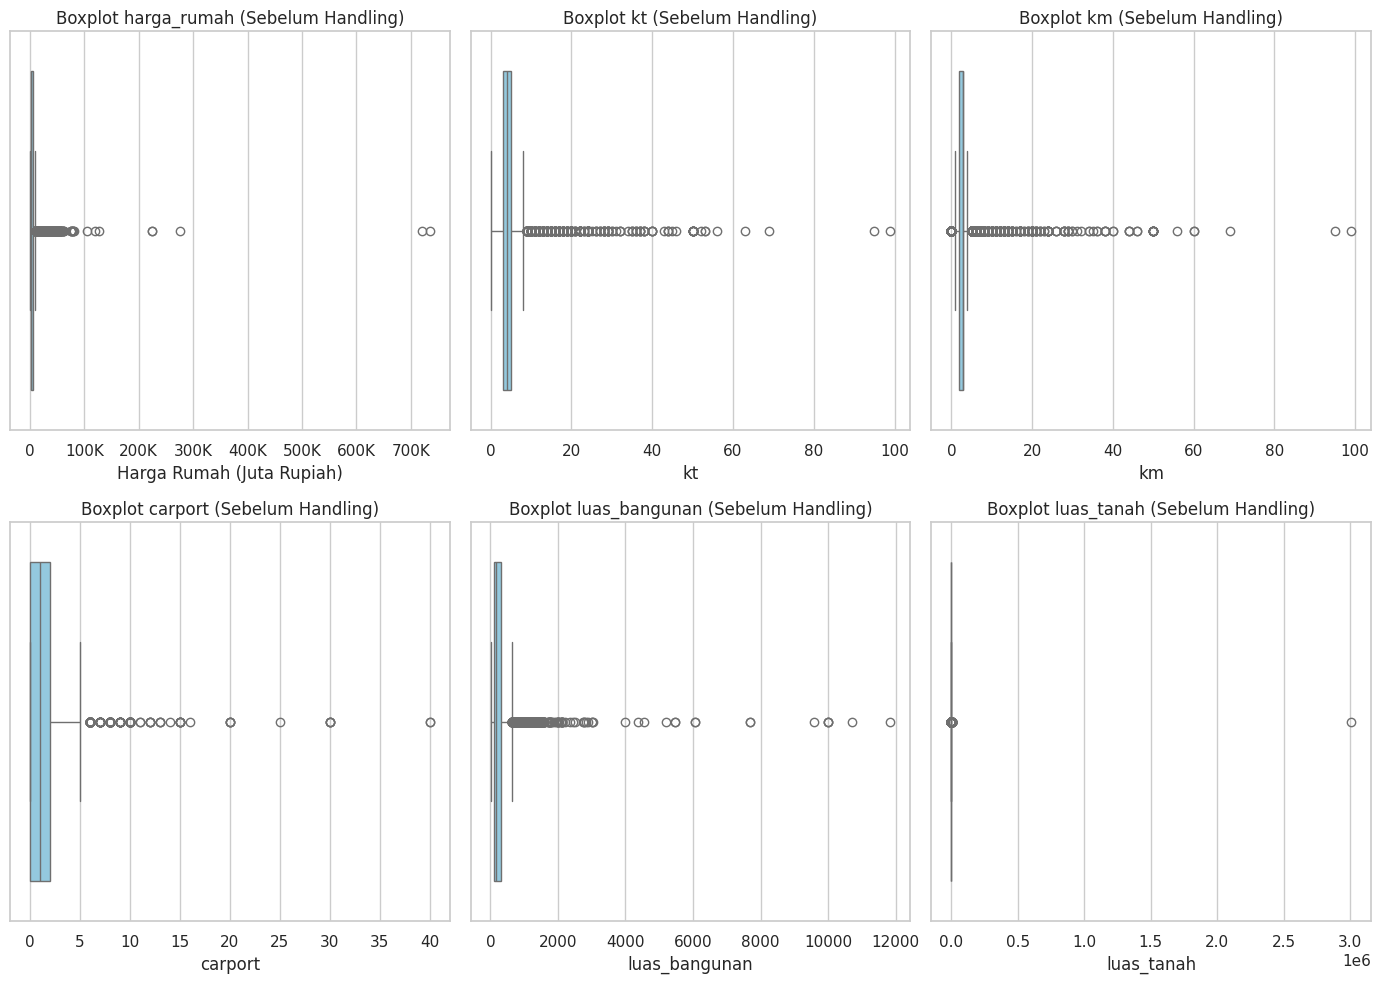

In [ ]:
from matplotlib.ticker import FuncFormatter

def juta_formatter(x, pos):
    return f"{x/1_000:.0f}K" if x >= 1000 else f"{x:.0f}"

# Visualisasi Outlier Semua Fitur Numerik
num_cols = ['harga_rumah', 'kt', 'km', 'carport', 'luas_bangunan', 'luas_tanah']

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(2, 3, i)
    sns.boxplot(data=df_clean, x=col, color="skyblue")

    if col == 'harga_rumah':
        ax.xaxis.set_major_formatter(FuncFormatter(juta_formatter))
        ax.set_xlabel("Harga Rumah (Juta Rupiah)")

    plt.title(f"Boxplot {col} (Sebelum Handling)")

plt.tight_layout()
plt.show()


In [ ]:
#  FUNGSI IQR UNTUK MASK & BOUNDARY
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def iqr_mask_with_bounds(series, lower, upper):
    return (series < lower) | (series > upper)


num_cols = ['harga_rumah', 'kt', 'km', 'carport', 'luas_bangunan', 'luas_tanah']


#  SIMPAN BOUNDARY AWAL
bounds_before = {col: iqr_bounds(df_clean[col]) for col in num_cols}


# HITUNG OUTLIER SEBELUM HANDLING
outlier_before = {
    col: iqr_mask_with_bounds(df_clean[col], *bounds_before[col]).sum()
    for col in num_cols
}

df_out_before = pd.DataFrame.from_dict(
    outlier_before,
    orient='index',
    columns=['Outlier Sebelum']
)

print("=== TABEL OUTLIER SEBELUM HANDLING ===")
print(df_out_before)

=== TABEL OUTLIER SEBELUM HANDLING ===
               Outlier Sebelum
harga_rumah                761
kt                         481
km                        1041
carport                    229
luas_bangunan              614
luas_tanah                 387


In [ ]:
#  HANDLING OUTLIERS
from scipy.stats.mstats import winsorize

df_fix = df_clean.copy()

#  Winsorize fitur kontinu
for col in ['harga_rumah', 'luas_bangunan', 'luas_tanah']:
    df_fix[col] = np.asarray(
        winsorize(df_fix[col], limits=[0.03, 0.03])
    ).astype(float)

#  Mask outlier fitur diskret pakai boundary AWAL
mask_kt  = iqr_mask_with_bounds(df_fix['kt'],      *bounds_before['kt'])
mask_km  = iqr_mask_with_bounds(df_fix['km'],      *bounds_before['km'])
mask_l   = iqr_mask_with_bounds(df_fix['carport'],  *bounds_before['carport'])

#  Gabung mask dan hapus sekali
combined_mask = mask_kt | mask_km | mask_l
df_no_outlier = df_fix[~combined_mask].copy()

In [ ]:
#  HITUNG OUTLIER SESUDAH HANDLING (boundary AWAL)
outlier_after = {
    col: iqr_mask_with_bounds(df_no_outlier[col], *bounds_before[col]).sum()
    for col in num_cols
}

df_out_after = pd.DataFrame.from_dict(
    outlier_after,
    orient='index',
    columns=['Outlier Sesudah']
)

# tabel final
tabel_outlier = pd.concat([df_out_before, df_out_after], axis=1)
tabel_outlier['Berkurang'] = tabel_outlier['Outlier Sebelum'] - tabel_outlier['Outlier Sesudah']

print("=== TABEL PERBANDINGAN SEBELUM & SESUDAH ===")
print(tabel_outlier)

=== TABEL PERBANDINGAN SEBELUM & SESUDAH ===
               Outlier Sebelum  Outlier Sesudah  Berkurang
harga_rumah                761              382        379
kt                         481                0        481
km                        1041                0       1041
carport                    229                0        229
luas_bangunan              614              275        339
luas_tanah                 387              113        274


In [ ]:
# Encode
semua_kecamatan = list(kecamatan_to_wilayah.keys())

# Dataframe helper untuk manual encode
df_wilayah_all = pd.DataFrame({'lokasi': semua_kecamatan})
df_wilayah_all['wilayah'] = df_wilayah_all['lokasi'].map(kecamatan_to_wilayah)
df_wilayah_all['wilayah_encoded'] = df_wilayah_all['wilayah'].map(wilayah_mapping).astype('Int64')

df_final = df_no_outlier.copy()

# Map wilayah untuk kecamatan yang ada di dataset
df_final['wilayah'] = df_final['lokasi'].map(kecamatan_to_wilayah)
df_final['wilayah_encoded'] = df_final['wilayah'].map(wilayah_mapping).astype('Int64')

print("Jumlah wilayah unik:", df_final['wilayah_encoded'].nunique())
for wilayah_code in sorted(df_final['wilayah_encoded'].dropna().unique()):
    lokasi_wilayah = df_final[df_final['wilayah_encoded'] == wilayah_code]['lokasi'].unique()
    print(f"Wilayah {wilayah_code}: {len(lokasi_wilayah)} kecamatan")
    print(lokasi_wilayah)
    print("-" * 50)

# Cek kecamatan yang belum termapping (harusnya kosong di df_final)
unmapped_lokasi = df_final[df_final['wilayah'].isna()]['lokasi'].unique()
print("Lokasi yang tidak termapping:", unmapped_lokasi)

# df_wilayah_all bisa dipakai untuk referensi semua kecamatan dengan kode,
# sehingga walaupun 3 kecamatan tidak ada di dataset, tetap tercatat.
print("Semua kecamatan dengan kode wilayah:")
print(df_wilayah_all)

Jumlah wilayah unik: 5
Wilayah 1: 4 kecamatan
['cidadap' 'coblong' 'sukajadi' 'sukasari']
--------------------------------------------------
Wilayah 2: 7 kecamatan
['andir' 'astanaanyar' 'bandung wetan' 'cicendo' 'lengkong' 'regol'
 'sumur bandung']
--------------------------------------------------
Wilayah 3: 3 kecamatan
['bandung kulon' 'bojongloa kidul' 'babakan ciparay']
--------------------------------------------------
Wilayah 4: 5 kecamatan
['bandung kidul' 'batununggal' 'buah batu' 'cibeunying kidul'
 'kiaracondong']
--------------------------------------------------
Wilayah 5: 8 kecamatan
['antapani' 'arcamanik' 'cibiru' 'gedebage' 'mandalajati' 'panyileukan'
 'rancasari' 'ujung berung']
--------------------------------------------------
Lokasi yang tidak termapping: []
Semua kecamatan dengan kode wilayah:
              lokasi  wilayah  wilayah_encoded
0            cidadap    utara                1
1            coblong    utara                1
2           sukajadi    utara   

In [ ]:
df_wilayah_all.to_csv('wilayah_all.csv', index=False)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6352 entries, 0 to 7609
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   harga            6352 non-null   object 
 1   lokasi           6352 non-null   object 
 2   kt               6352 non-null   int64  
 3   km               6352 non-null   int64  
 4   carport          6352 non-null   int64  
 5   luas_bangunan    6352 non-null   float64
 6   luas_tanah       6352 non-null   float64
 7   harga_rumah      6352 non-null   float64
 8   harga_tampil     6352 non-null   object 
 9   total_rooms      6352 non-null   int64  
 10  luas_ratio       6352 non-null   float64
 11  kepadatan_kamar  6352 non-null   float64
 12  sisa_lahan       6352 non-null   float64
 13  bangunan_log     6352 non-null   float64
 14  harga_per_m2     6352 non-null   float64
 15  wilayah          6352 non-null   object 
 16  wilayah_encoded  6352 non-null   Int64  
dtypes: Int64(1), float6

In [ ]:
df_final.head()

harga lokasi  kt  km  carport  luas_bangunan  luas_tanah  \
0   Rp 4,1 Miliar  andir   3   2        3          202.0       300.0   
1   Rp 3,3 Miliar  andir   5   2        1          350.0       258.0   
2     Rp 580 Juta  andir   2   2        1           60.0        80.0   
4   Rp 3,6 Miliar  andir   5   3        1          184.0       234.0   
5  Rp 1,17 Miliar  andir   2   1        1           65.0        45.0   

   harga_rumah  harga_tampil  total_rooms  luas_ratio  kepadatan_kamar  \
0       4100.0  Rp4.1 Miliar            5    0.673333         0.024752   
1       3300.0  Rp3.3 Miliar            7    1.356589         0.020000   
2        580.0    Rp580 Juta            4    0.375000         0.133333   
4       3600.0  Rp3.6 Miliar            8    0.786325         0.043478   
5       1170.0  Rp1.2 Miliar            3    1.444444         0.046154   

   sisa_lahan  bangunan_log  harga_per_m2 wilayah  wilayah_encoded  
0        98.0      5.313206     20.297030  tengah                2  
1       -92.0      5.860786      9.428571  tengah                2  
2        50.0      3.433987     19.333333  tengah                2  
4        50.0      5.220356     19.565217  tengah                2  
5       -20.0      4.189655     18.000000  tengah                2

 ### **3. EXPLORATORY DATA ANALYSIS** ###

In [ ]:
df_final.describe()

kt           km      carport  luas_bangunan   luas_tanah  \
count  6352.000000  6352.000000  6352.000000    6352.000000  6352.000000   
mean      3.491184     2.402708     1.124528     210.908533   196.482210   
std       1.345023     0.938502     1.021459     177.471209   145.092965   
min       0.000000     1.000000     0.000000      60.000000    40.000000   
25%       3.000000     2.000000     0.000000      97.000000    93.000000   
50%       3.000000     2.000000     1.000000     147.000000   150.000000   
75%       4.000000     3.000000     2.000000     260.000000   254.000000   
max       8.000000     4.000000     5.000000     947.000000   770.000000   

        harga_rumah  total_rooms   luas_ratio  kepadatan_kamar    sisa_lahan  \
count   6352.000000  6352.000000  6352.000000      6352.000000  6.352000e+03   
mean    3432.895781     5.893892     1.446536         0.039699  4.524348e+02   
std     4394.596544     2.063871    11.819147         0.021616  3.771586e+04   
min      400.000000     1.000000     0.000060         0.000591 -1.170000e+04   
25%      990.000000     4.000000     0.771429         0.024540 -4.200000e+01   
50%     1900.000000     6.000000     1.077778         0.037433 -9.000000e+00   
75%     3800.000000     7.000000     1.444444         0.050000  4.325000e+01   
max    25000.000000    12.000000   807.000000         0.500000  3.005820e+06   

       bangunan_log  harga_per_m2  wilayah_encoded  
count   6352.000000   6352.000000           6352.0  
mean       5.097313     17.656854         3.335642  
std        0.714983    178.698861         1.416017  
min        1.945910      0.073579              1.0  
25%        4.584967      8.964281              2.0  
50%        4.997212     12.500000              3.0  
75%        5.564520     18.339372              5.0  
max        9.380168  11136.363636              5.0

In [ ]:
import math
numeric_cols = df_final.select_dtypes(include=['int64','float64','Int64']).columns

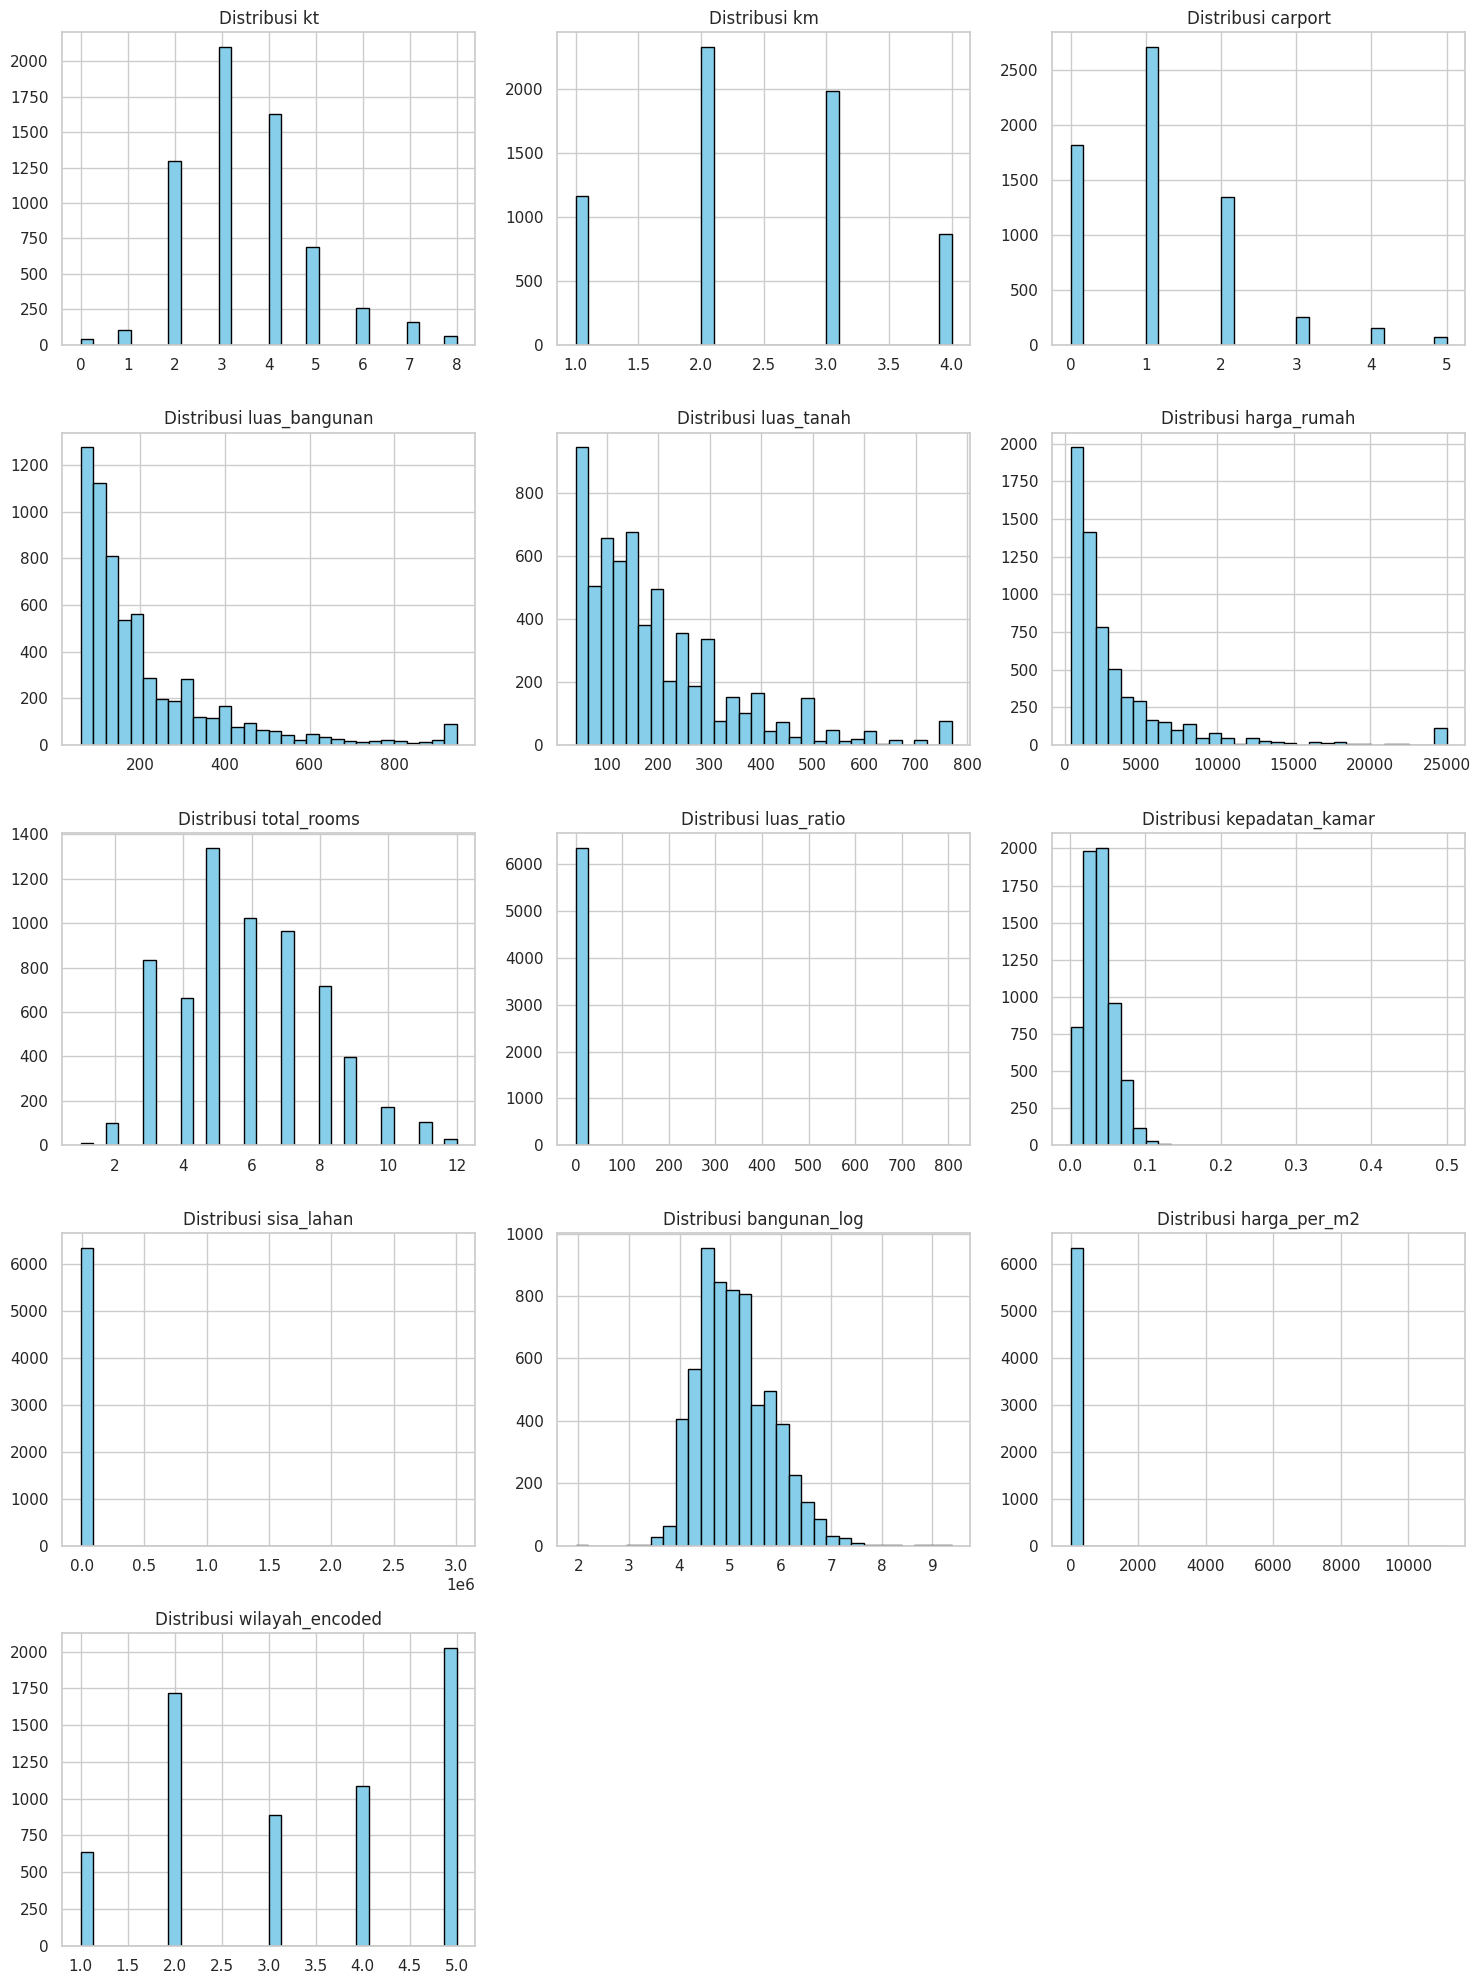

In [ ]:
# Histogram semua fitur numerik
plt.figure(figsize=(5 * 3, 4 * math.ceil(len(numeric_cols)/3)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(math.ceil(len(numeric_cols)/3), 3, i)
    plt.hist(df_final[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

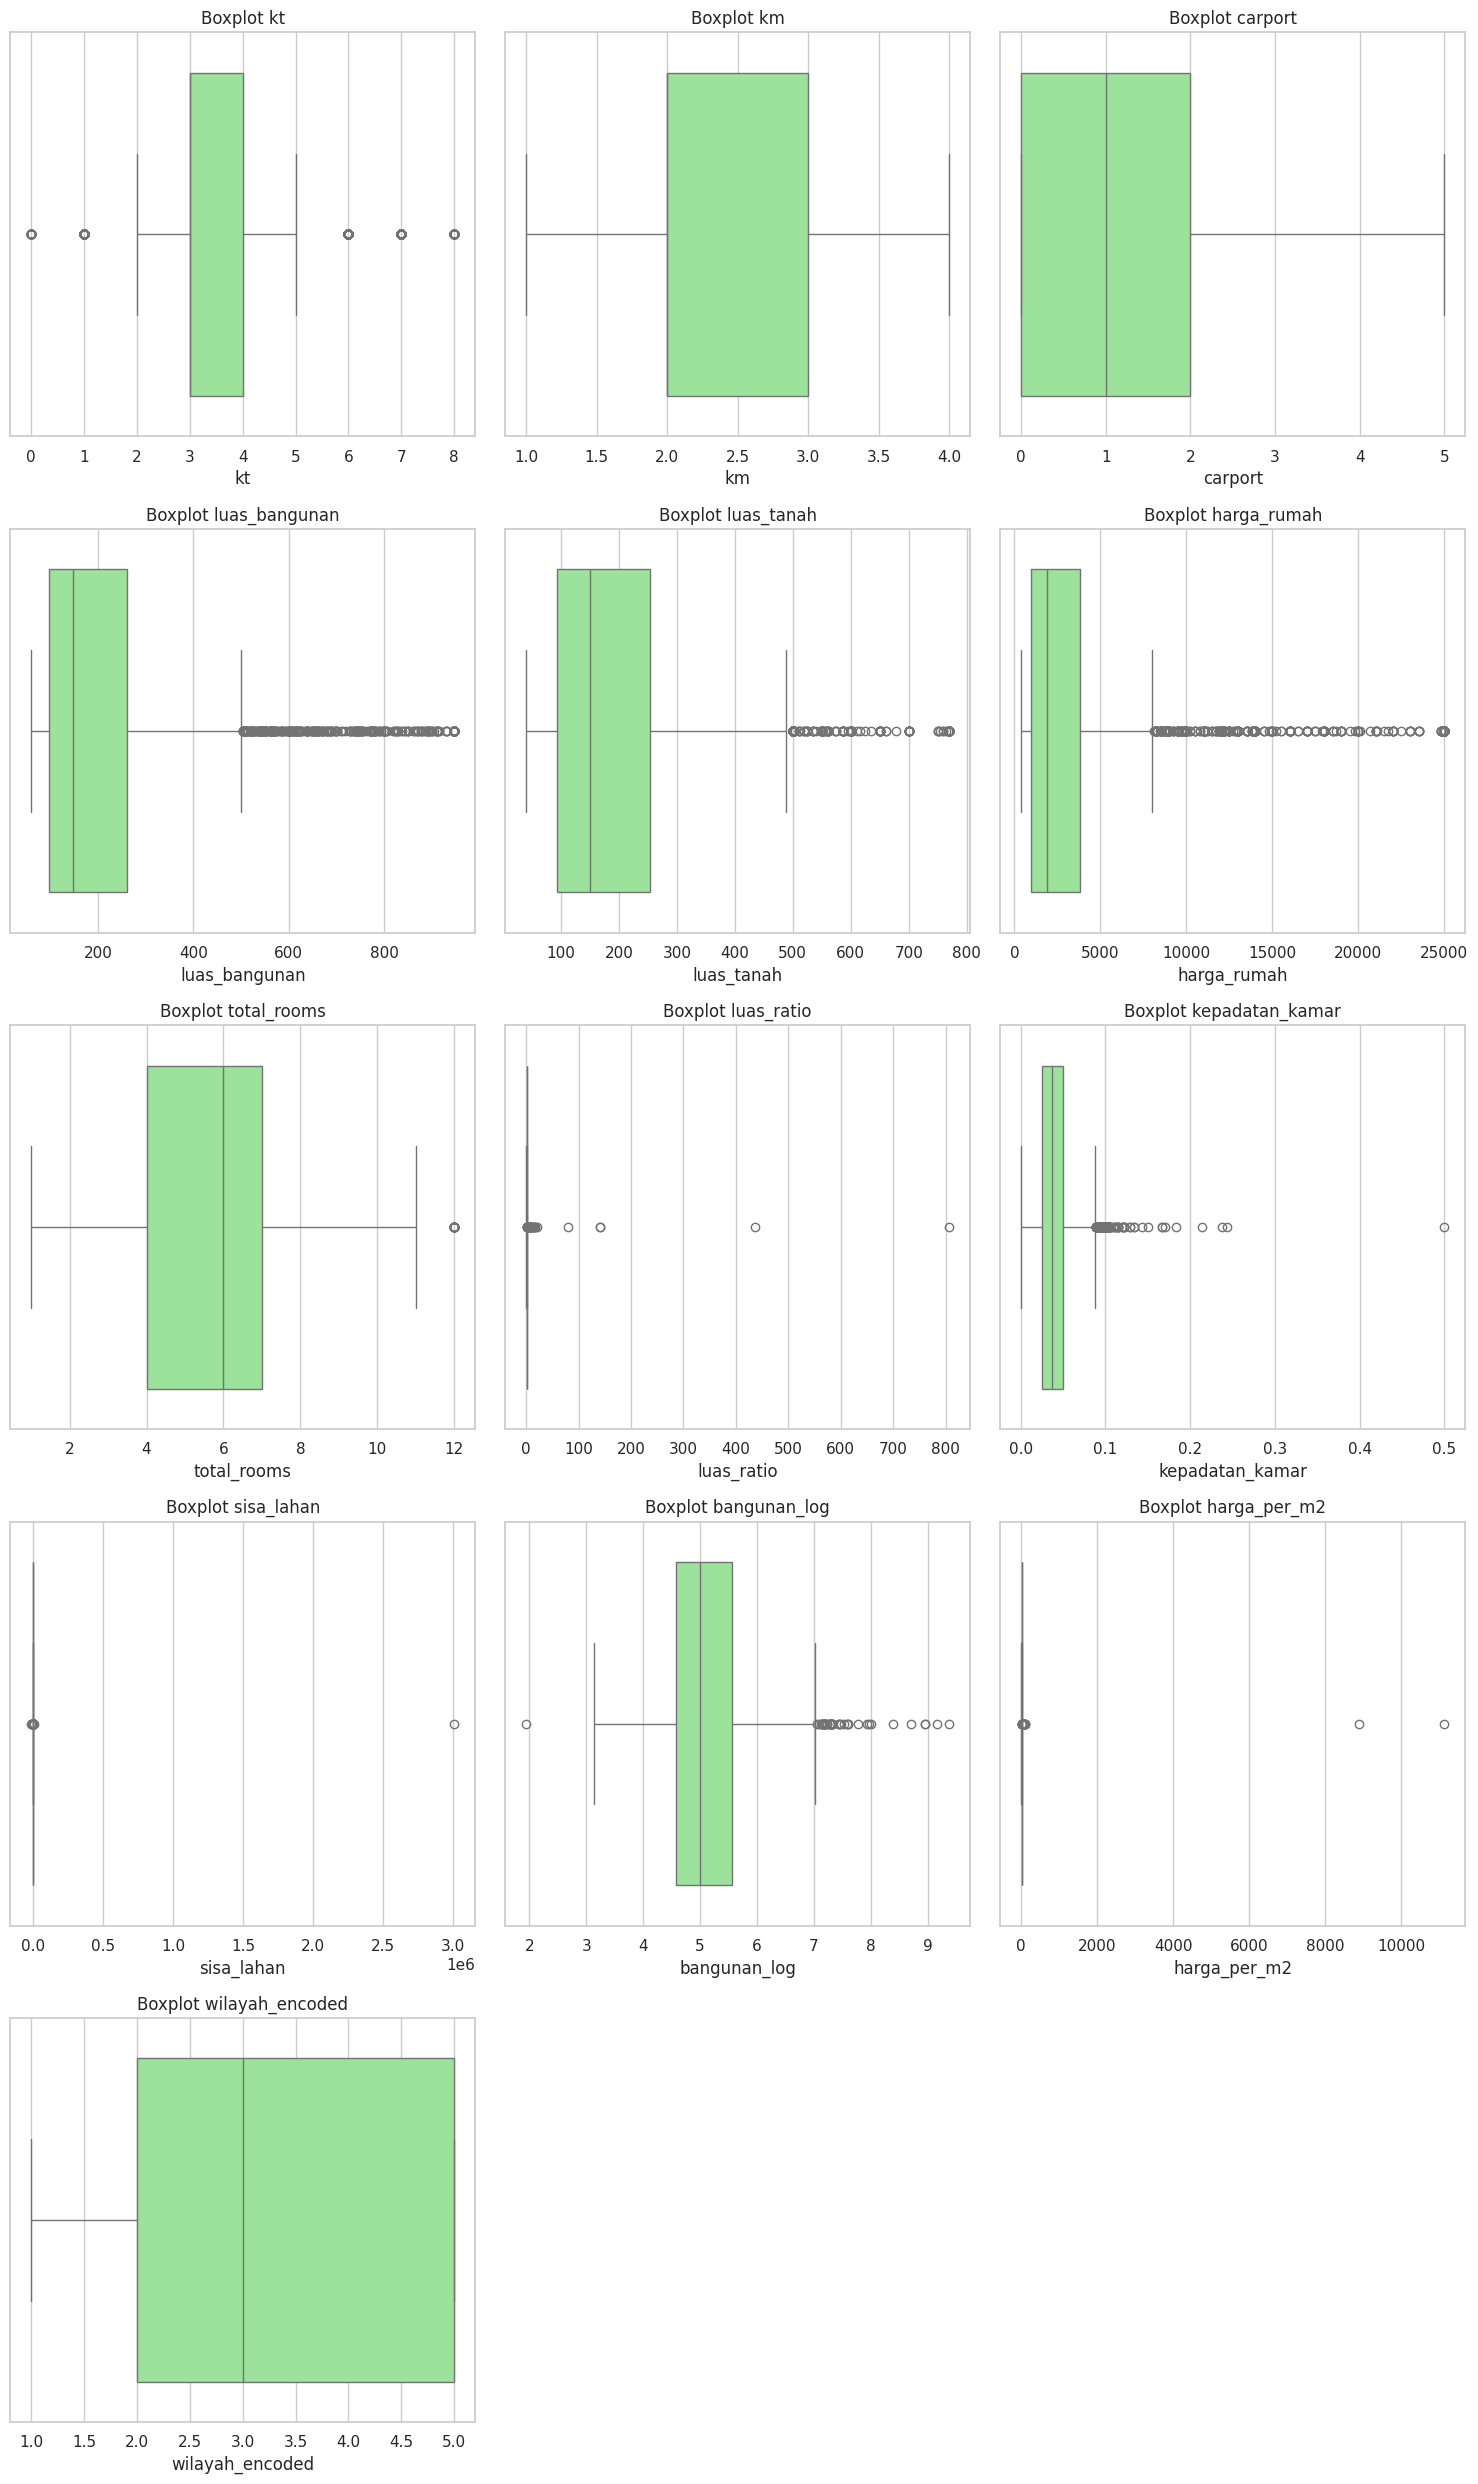

In [ ]:
# Boxplot semua fitur
plt.figure(figsize=(5 * 3, 5 * math.ceil(len(numeric_cols)/3)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(math.ceil(len(numeric_cols)/3), 3, i)
    sns.boxplot(x=df_final[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

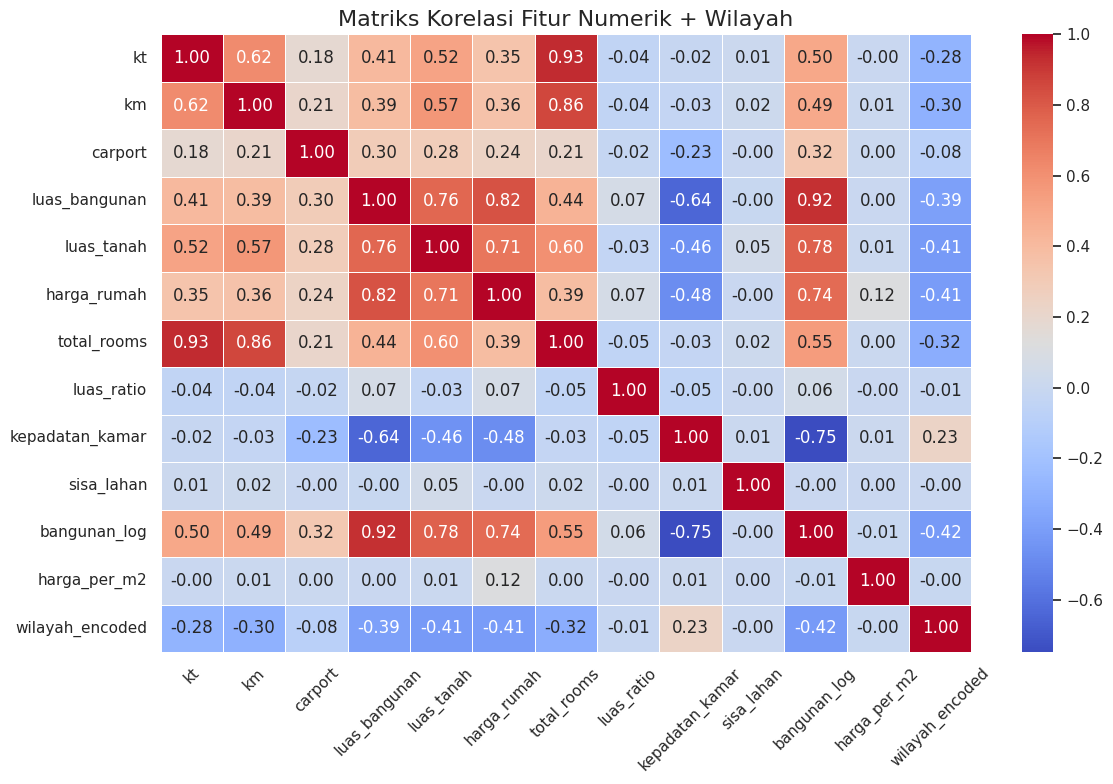

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_final[numeric_cols].corr(), annot=True, fmt=".2f",
            cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Matriks Korelasi Fitur Numerik + Wilayah', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

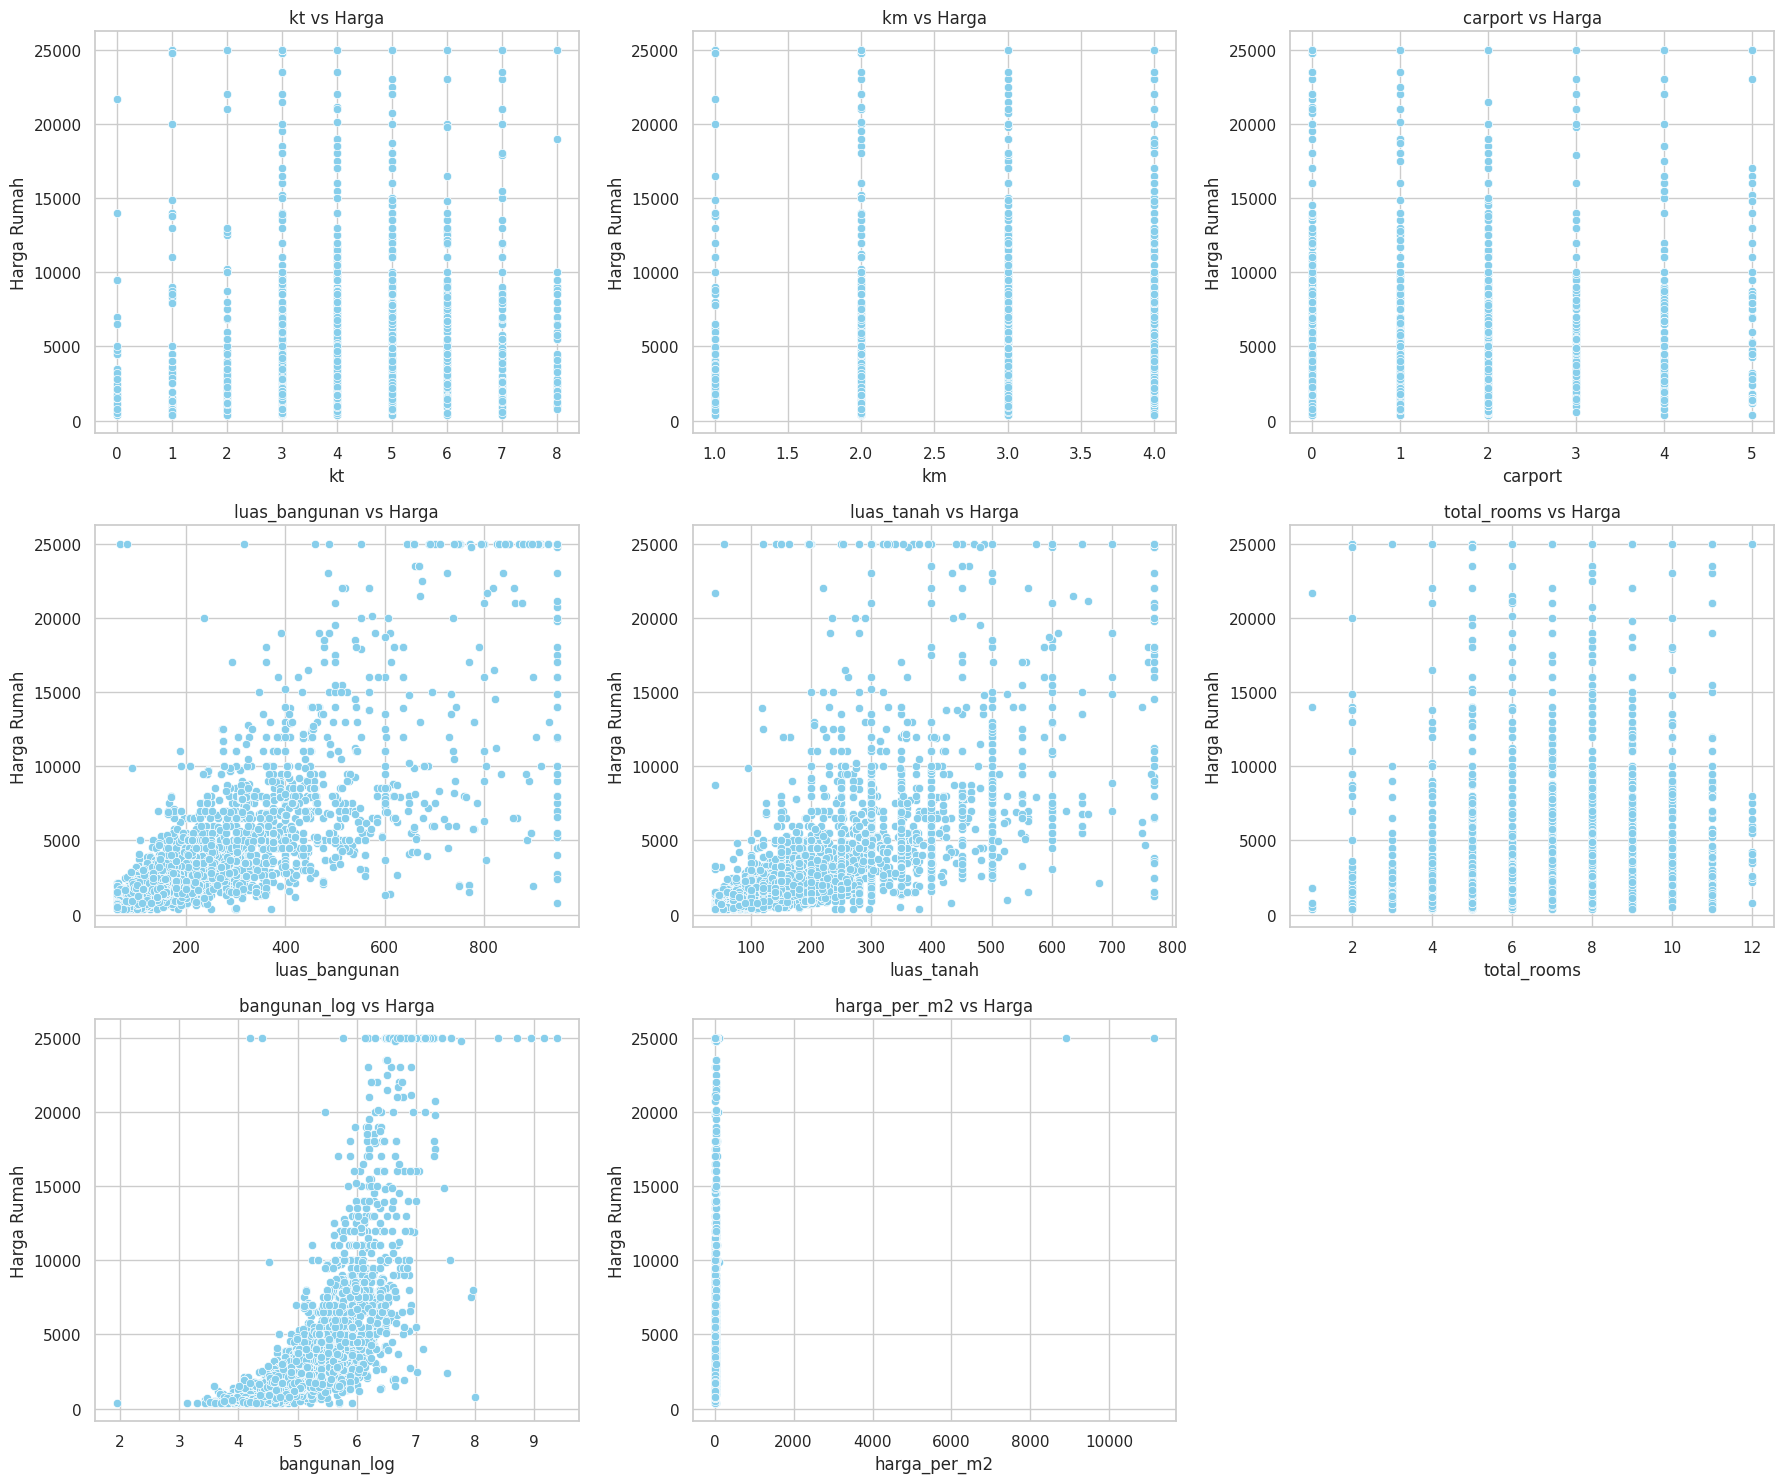

In [ ]:
# Scatter Plot
features_main = ['kt', 'km', 'carport', 'luas_bangunan',
                 'luas_tanah', 'total_rooms', 'bangunan_log', 'harga_per_m2']

n_features = len(features_main)
cols = 3
rows = math.ceil(n_features / cols)

plt.figure(figsize=(6 * cols, 5 * rows))
for i, feature in enumerate(features_main):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=df_final, x=feature, y='harga_rumah', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Harga Rumah')
    plt.title(f'{feature} vs Harga', fontsize=12)
plt.tight_layout()
plt.show()

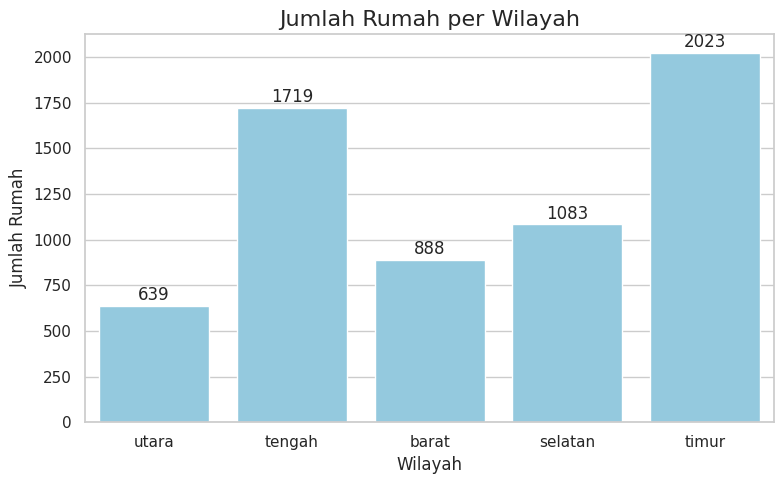

In [ ]:
# Count plot jumlah rumah per wilayah
wilayah_order = ['utara','tengah','barat','selatan','timur']
wilayah_count = df_final['wilayah'].value_counts().reindex(wilayah_order)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=wilayah_count.index, y=wilayah_count.values, color='skyblue')  # ganti palette jadi color

plt.title('Jumlah Rumah per Wilayah', fontsize=16)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Rumah')

for i, count in enumerate(wilayah_count.values):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### **3. FEATURE SELECTION** ###

In [ ]:
print("Cek missing value setelah EDA:")
print(df_final.isnull().sum())

Cek missing value setelah EDA:
harga              0
lokasi             0
kt                 0
km                 0
carport            0
luas_bangunan      0
luas_tanah         0
harga_rumah        0
harga_tampil       0
total_rooms        0
luas_ratio         0
kepadatan_kamar    0
sisa_lahan         0
bangunan_log       0
harga_per_m2       0
wilayah            0
wilayah_encoded    0
dtype: int64


In [ ]:
# Salinan dataframe
df_model = df_final.copy()

# Drop fitur yang tidak dipakai
drop_cols = ['harga', 'harga_tampil']
df_model = df_model.drop(columns=[c for c in drop_cols if c in df_model.columns])

# Pisahkan fitur & target
x = df_model.drop('harga_rumah', axis=1)
y = df_model['harga_rumah']

print("df_model shape:", df_model.shape)
print("x shape:", x.shape)

df_model shape: (6352, 15)
x shape: (6352, 14)


In [ ]:
# Cek & drop missing values jika ada
df_model = pd.concat([x, y], axis=1).dropna()

x = df_model.drop(columns=['harga_rumah'])
y = df_model['harga_rumah']

harga_rumah        1.000000
luas_bangunan      0.824548
bangunan_log       0.744568
luas_tanah         0.705853
total_rooms        0.387750
km                 0.355517
kt                 0.346917
carport            0.235342
harga_per_m2       0.116741
luas_ratio         0.069377
sisa_lahan        -0.001679
kepadatan_kamar   -0.480477
Name: harga_rumah, dtype: float64


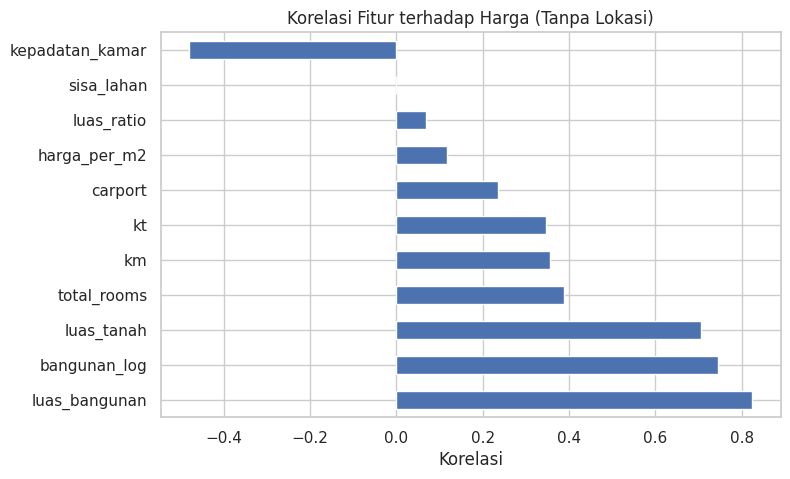

In [ ]:
# Korelasi terhadap target (tanpa lokasi)
correlation_with_target = (
    df_final
    .drop(columns=['wilayah', 'wilayah_encoded'], errors='ignore')
    .corr(numeric_only=True)['harga_rumah']
    .sort_values(ascending=False)
)
print(correlation_with_target)
non_lokasi = correlation_with_target.index.drop('harga_rumah')

plt.figure(figsize=(8, 5))
correlation_with_target[non_lokasi].plot(kind='barh')
plt.title('Korelasi Fitur terhadap Harga (Tanpa Lokasi)')
plt.xlabel('Korelasi')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest
x_no_lok = df_final.drop(
    columns=['harga_rumah', 'wilayah', 'wilayah_encoded'],
    errors='ignore'
)

y = df_final['harga_rumah']

x_no_lok = x_no_lok.select_dtypes(include=[np.number])

# Bersihkan NaN / inf
mask = np.isfinite(x_no_lok).all(axis=1)
x_no_lok = x_no_lok[mask]
y = y[mask]

f_scores, p_values = f_regression(x_no_lok, y)

anova_df = pd.DataFrame({
    "Fitur": x_no_lok.columns,
    "F_Score (ANOVA)": f_scores,
    "p_value": p_values
}).sort_values(by="F_Score (ANOVA)", ascending=False)

anova_df


Fitur  F_Score (ANOVA)        p_value
3     luas_bangunan     13486.251229   0.000000e+00
9      bangunan_log      7899.868074   0.000000e+00
4        luas_tanah      6305.148380   0.000000e+00
7   kepadatan_kamar      1905.957194   0.000000e+00
5       total_rooms      1123.664056  5.611578e-227
1                km       918.709572  1.345247e-188
0                kt       868.793771  4.376971e-179
2           carport       372.322038   1.149303e-80
10     harga_per_m2        87.736715   1.016551e-20
6        luas_ratio        30.711520   3.114121e-08
8        sisa_lahan         0.017911   8.935404e-01

In [ ]:
selector = SelectKBest(score_func=f_regression, k=7)
selector.fit(x_no_lok, y)

scores_df = pd.DataFrame({
    "Fitur": x_no_lok.columns,
    "Skor": selector.scores_
}).sort_values(by="Skor", ascending=False)

selected_num_features = list(x_no_lok.columns[selector.get_support()])

print("Fitur numerik terpilih SelectKBest:")
print(selected_num_features)

Fitur numerik terpilih SelectKBest:
['kt', 'km', 'luas_bangunan', 'luas_tanah', 'total_rooms', 'kepadatan_kamar', 'bangunan_log']


/tmp/ipython-input-2471022234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df, x='Skor', y='Fitur', palette='viridis')


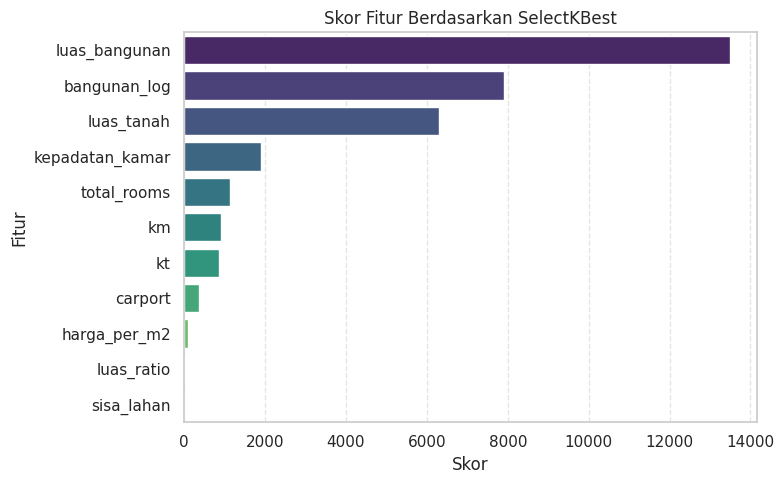

In [ ]:
# Visualisasi Skor Fitur
plt.figure(figsize=(8, 5))
sns.barplot(data=scores_df, x='Skor', y='Fitur', palette='viridis')
plt.title('Skor Fitur Berdasarkan SelectKBest')
plt.xlabel('Skor')
plt.ylabel('Fitur')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Fitur terpilih untuk modelling
final_features = selected_num_features + ['wilayah_encoded']

print("Final fitur untuk modelling:")
print(final_features)

x = df_final[final_features].copy()
y = df_final['harga_rumah']

print("Shape x (final):", x.shape)
print("Jumlah fitur:", x.shape[1])

Final fitur untuk modelling:
['kt', 'km', 'luas_bangunan', 'luas_tanah', 'total_rooms', 'kepadatan_kamar', 'bangunan_log', 'wilayah_encoded']
Shape x (final): (6352, 8)
Jumlah fitur: 8


### **5.DATA SPLIT** ###

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (5081, 8)
Test shape: (1271, 8)


###**6. MODELLING DENGAN SVR**

BASELINE SVR EVALUATION
TRAIN:
MSE  : 20411758.37
RMSE : 4517.94
R²   : -0.0064

TEST:
MSE  : 14981495.53
RMSE : 3870.59
R²   : 0.0252

Waktu komputasi: 0 menit 1.39 detik


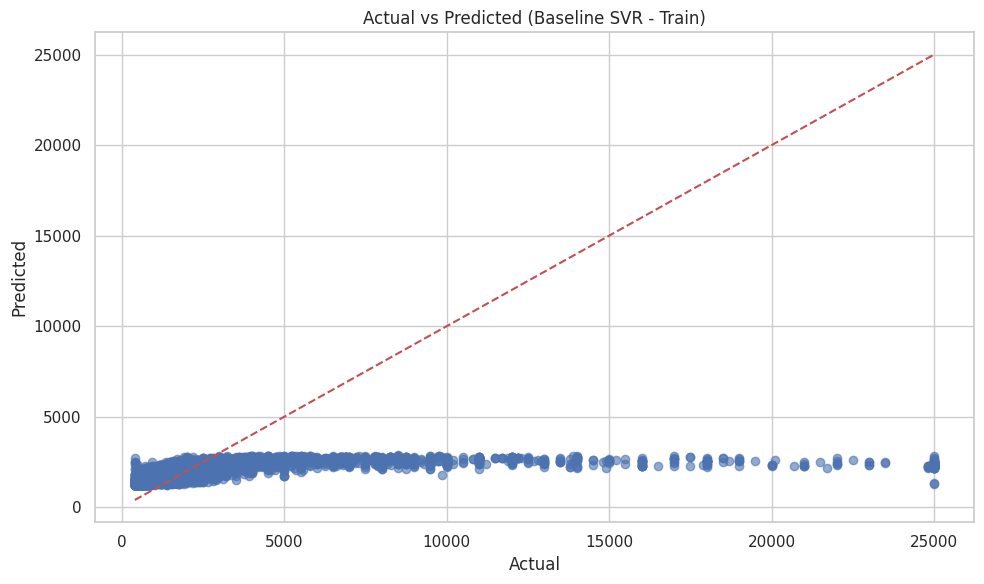

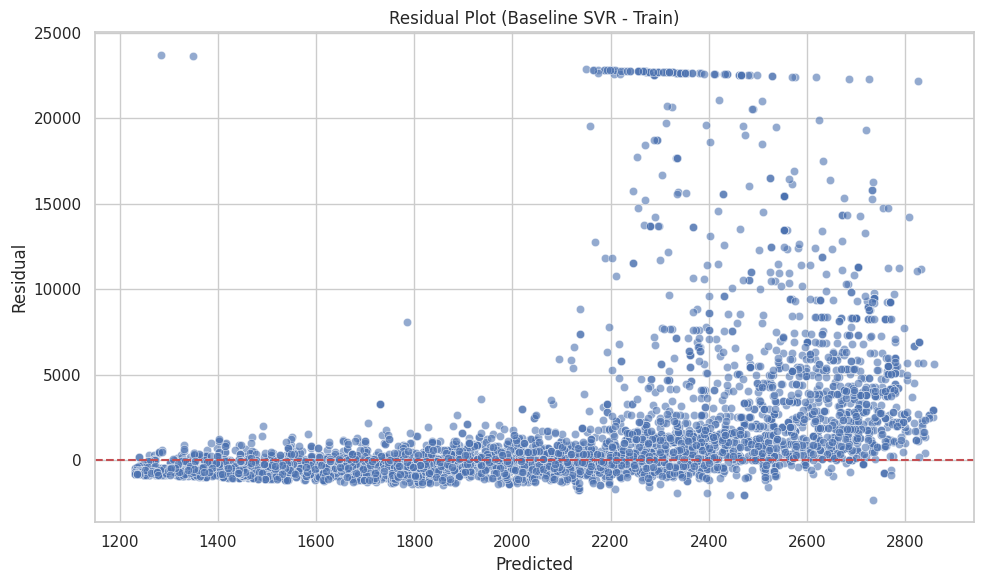

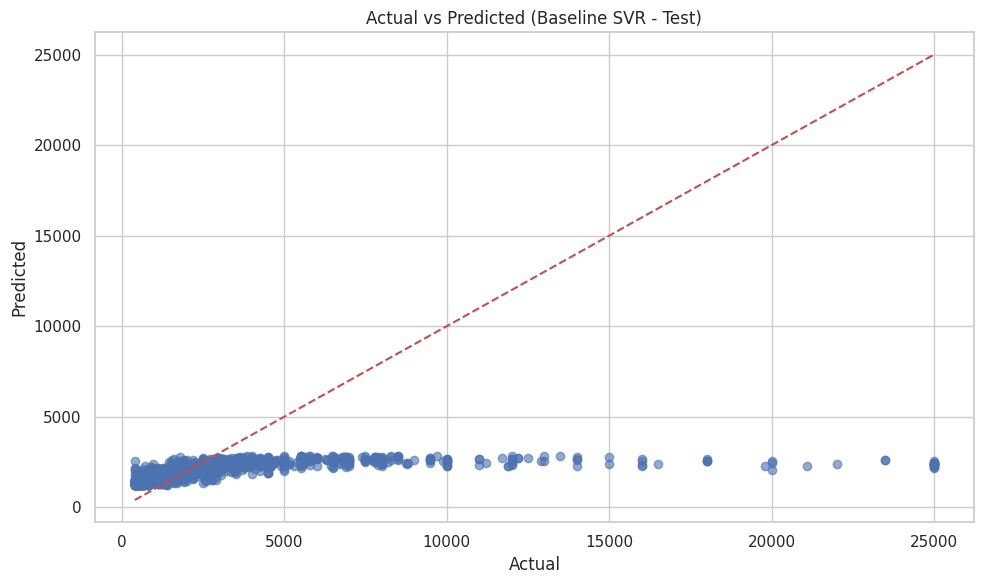

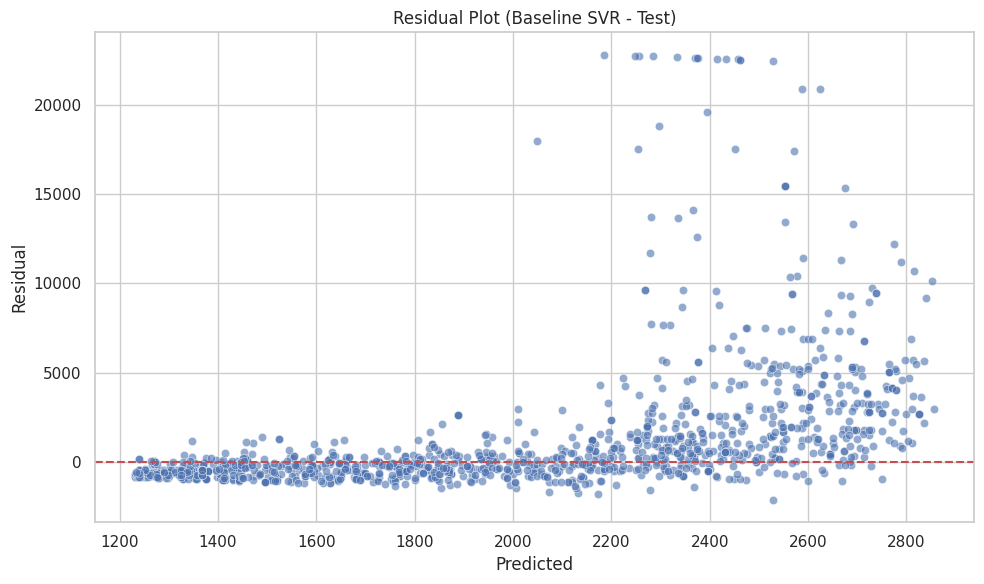

In [ ]:
# BASELINE MODEL
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import time

# Pipeline Baseline
baseline_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# TRAIN
start_time_baseline = time.time()
baseline_model.fit(x_train, y_train)
end_time_baseline = time.time()

y_train_pred = baseline_model.predict(x_train)
y_test_pred  = baseline_model.predict(x_test)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("BASELINE SVR EVALUATION")
print("TRAIN:")
print(f"MSE  : {mse_train:.2f}")
print(f"RMSE : {rmse_train:.2f}")
print(f"R²   : {r2_train:.4f}")

# TEST
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTEST:")
print(f"MSE  : {mse_test:.2f}")
print(f"RMSE : {rmse_test:.2f}")
print(f"R²   : {r2_test:.4f}")

# WAKTU KOMPUTASI
elapsed_time_baseline = end_time_baseline - start_time_baseline
m, s = divmod(elapsed_time_baseline, 60)
print(f"\nWaktu komputasi: {int(m)} menit {s:.2f} detik")

# PLOT TRAIN

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    'r--'
)
plt.title('Actual vs Predicted (Baseline SVR - Train)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=y_train - y_train_pred, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot (Baseline SVR - Train)')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()

# PLOT TEST
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.title('Actual vs Predicted (Baseline SVR - Test)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=y_test - y_test_pred, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot (Baseline SVR - Test)')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# TABEL AKTUAL vs PREDIKSI (TEST)
predictions_baseline_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred[:10]
})

print("\nPerbandingan 10 data pertama (Baseline SVR - Test):")
print(predictions_baseline_df)


Perbandingan 10 data pertama (Baseline SVR - Test):
   Actual    Predicted
0  4200.0  2464.301096
1  2000.0  2400.592769
2  1990.0  2274.590946
3   574.0  1369.997819
4  1900.0  2157.785237
5  3100.0  2439.714232
6  6500.0  2586.729901
7  4500.0  2671.304610
8  1670.0  2046.545036
9   479.0  1233.302348


###**7. HYPERPARAMETER TUNING**

**GRID SEARCH CV 3**



Fitting 3 folds for each of 12 candidates, totalling 36 fits

[Grid Search | CV=3] Best Parameters:
{'svr__C': 3, 'svr__epsilon': 0.04, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
[Grid Search | CV=3] Best Cross-Validation R²: 0.8390325754915029

[Grid Search | CV=3] Cross-Validation Evaluation (Train):
MSE  (CV): 4750360.76
RMSE (CV): 2179.53
R²   (CV): 0.7658

[Grid Search | CV=3] Test Set Evaluation:
MSE  (Test): 4697779.12
RMSE (Test): 2167.44
R²   (Test): 0.6943

[Grid Search | CV=3] Waktu komputasi: 0 menit 49.13 detik


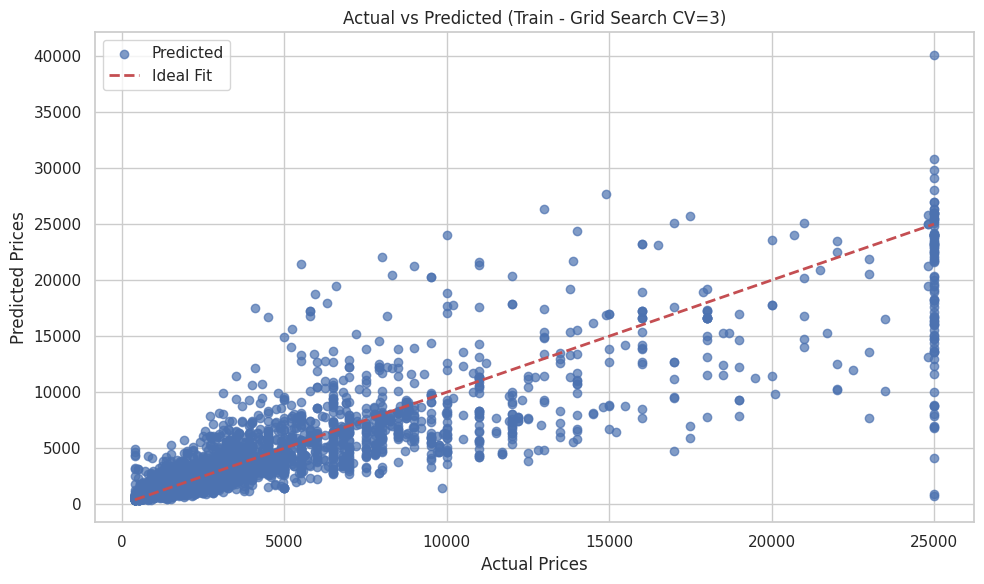

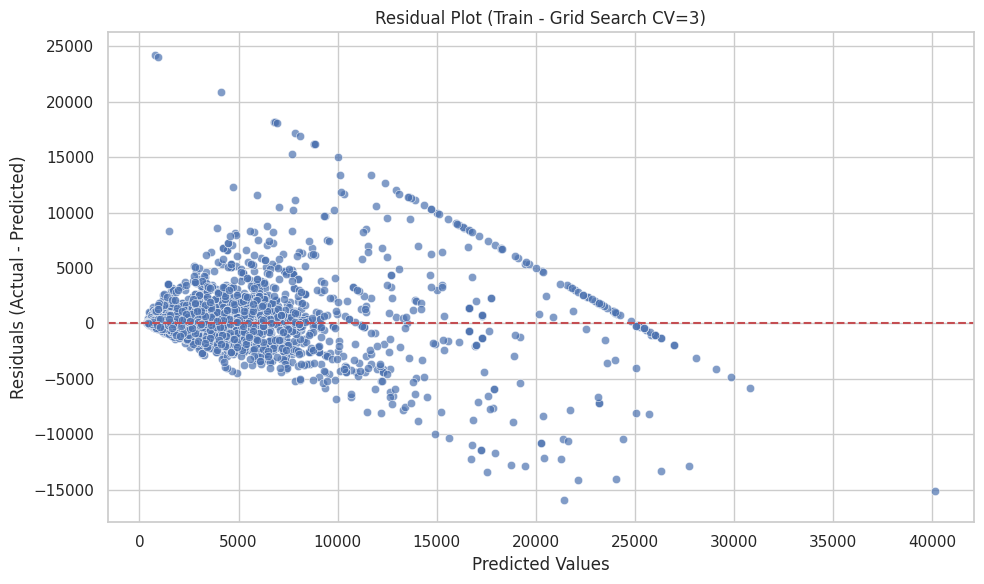

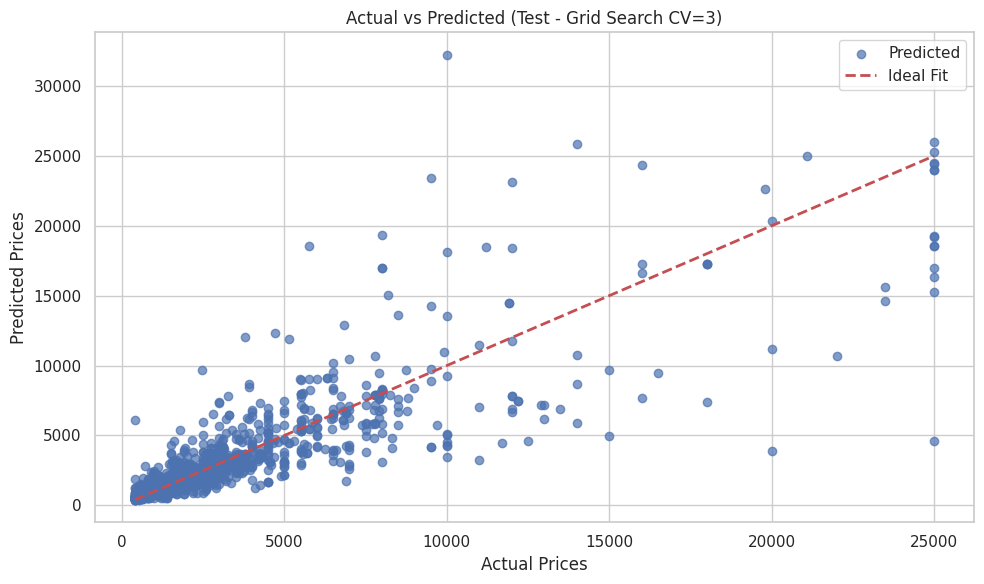

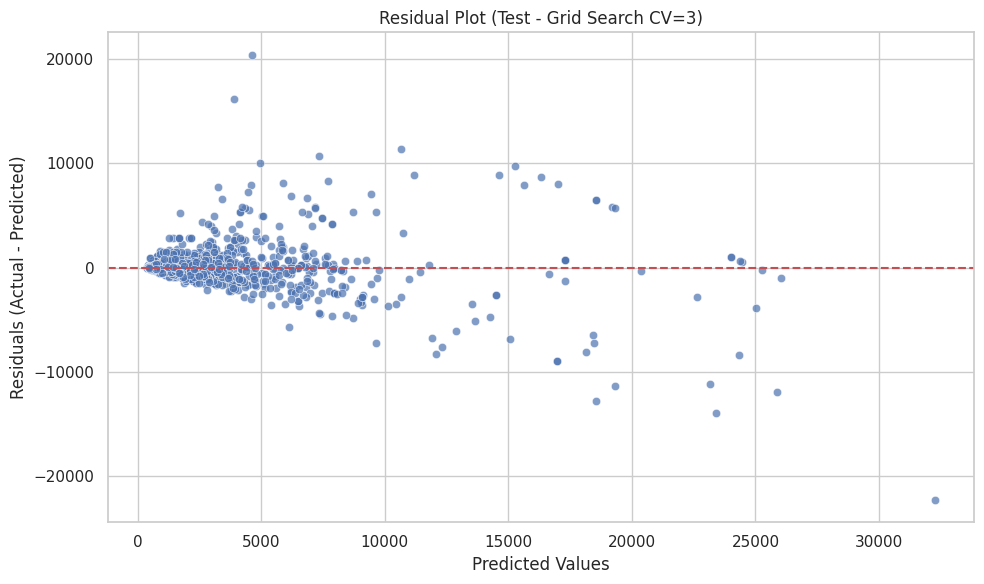

In [ ]:
# GRID SEARCH SVR (CV = 3)
from sklearn.model_selection import GridSearchCV, cross_val_predict

# Pipeline SVR
pipeline_gs_cv3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Parameter grid
param_grid_gs_cv3 = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [3, 6],
        'svr__epsilon': [0.02, 0.04],
        'svr__gamma': ['scale']
    },
    {
        'svr__kernel': ['poly'],
        'svr__degree': [2],
        'svr__C': [3, 6],
        'svr__epsilon': [0.02, 0.04],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [3, 6],
        'svr__epsilon': [0.02, 0.04],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    }
]

grid_search_gs_cv3 = GridSearchCV(
    pipeline_gs_cv3,
    param_grid_gs_cv3,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# TRAIN
start_time = time.time()

# Log transform target
y_train_log = np.log1p(y_train)

# Fit ke data training
grid_search_gs_cv3.fit(x_train, y_train_log)

end_time = time.time()

# Best parameter & CV score
print("\n[Grid Search | CV=3] Best Parameters:")
print(grid_search_gs_cv3.best_params_)
print("[Grid Search | CV=3] Best Cross-Validation R²:", grid_search_gs_cv3.best_score_)

# Cross-validation prediction (train)
y_cv_pred_log_gs_cv3 = cross_val_predict(
    grid_search_gs_cv3.best_estimator_,
    x_train,
    y_train_log,
    cv=3,
    n_jobs=-1
)
y_cv_pred_gs_cv3 = np.expm1(y_cv_pred_log_gs_cv3)

# Evaluation metrics train (CV)
mse_gs_cv3 = mean_squared_error(y_train, y_cv_pred_gs_cv3)
rmse_gs_cv3 = np.sqrt(mse_gs_cv3)
r2_gs_cv3 = r2_score(y_train, y_cv_pred_gs_cv3)

print("\n[Grid Search | CV=3] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_gs_cv3:.2f}")
print(f"RMSE (CV): {rmse_gs_cv3:.2f}")
print(f"R²   (CV): {r2_gs_cv3:.4f}")

# Evaluasi data test
y_test_log_pred_gs_cv3 = grid_search_gs_cv3.best_estimator_.predict(x_test)
y_test_pred_gs_cv3 = np.expm1(y_test_log_pred_gs_cv3)

mse_test_gs_cv3 = mean_squared_error(y_test, y_test_pred_gs_cv3)
rmse_test_gs_cv3 = np.sqrt(mse_test_gs_cv3)
r2_test_gs_cv3 = r2_score(y_test, y_test_pred_gs_cv3)

print("\n[Grid Search | CV=3] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_gs_cv3:.2f}")
print(f"RMSE (Test): {rmse_test_gs_cv3:.2f}")
print(f"R²   (Test): {r2_test_gs_cv3:.4f}")

# Waktu komputasi
elapsed_time_gs_cv3 = end_time - start_time
m, s = divmod(elapsed_time_gs_cv3, 60)
print(f"\n[Grid Search | CV=3] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_gs_cv3, alpha=0.7, label='Predicted')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Grid Search CV=3)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_gs_cv3 = y_train - y_cv_pred_gs_cv3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_gs_cv3, y=residuals_gs_cv3, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Train - Grid Search CV=3)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_gs_cv3, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Grid Search CV=3)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_gs_cv3 = y_test - y_test_pred_gs_cv3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_gs_cv3, y=residuals_test_gs_cv3, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Grid Search CV=3)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel Aktual vs Prediksi (Test)
predictions_test_gs_cv3_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_gs_cv3[:10]
})

print("\nPerbandingan 10 data pertama (Grid Search CV=3 - Test):")
print(predictions_test_gs_cv3_df)



Perbandingan 10 data pertama (Grid Search CV=3 - Test):
   Actual    Predicted
0  4200.0  3167.921518
1  2000.0  2942.742754
2  1990.0  2844.914648
3   574.0   562.474417
4  1900.0  1978.069614
5  3100.0  2858.565601
6  6500.0  3632.970091
7  4500.0  5860.049864
8  1670.0  2301.219352
9   479.0   460.486938


**GRID SEARCH CV 5**

Fitting 5 folds for each of 18 candidates, totalling 90 fits

[Grid Search | CV=5] Best Parameters:
{'svr__C': 5, 'svr__epsilon': 0.05, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
[Grid Search | CV=5] Best Cross-Validation R²: 0.8391889141522688

[Grid Search | CV=5] Cross-Validation Evaluation (Train):
MSE  (CV): 4790962.86
RMSE (CV): 2188.83
R²   (CV): 0.7638

[Grid Search | CV=5] Test Set Evaluation:
MSE  (Test): 4597804.94
RMSE (Test): 2144.25
R²   (Test): 0.7008

[Grid Search | CV=5] Waktu komputasi: 3 menit 13.57 detik


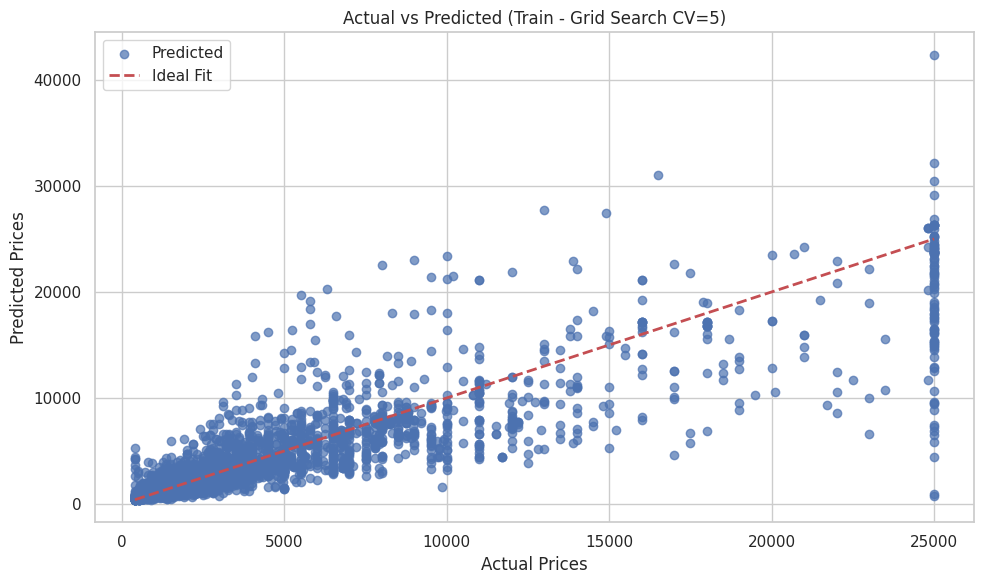

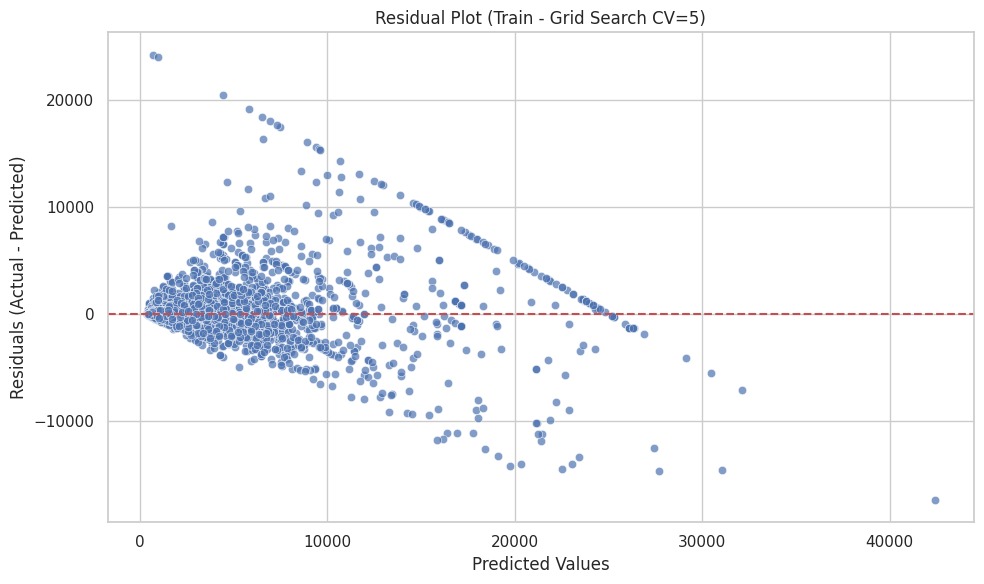

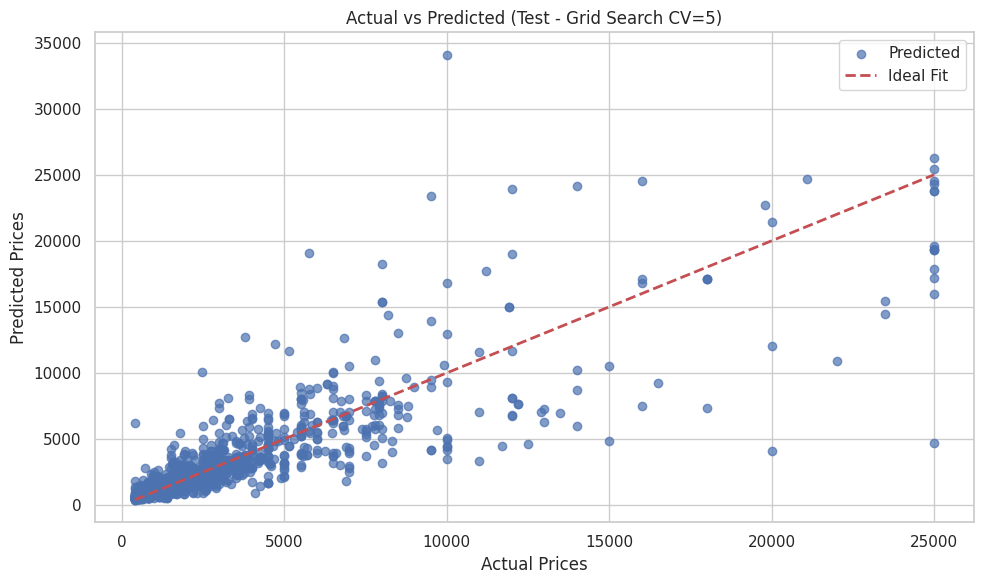

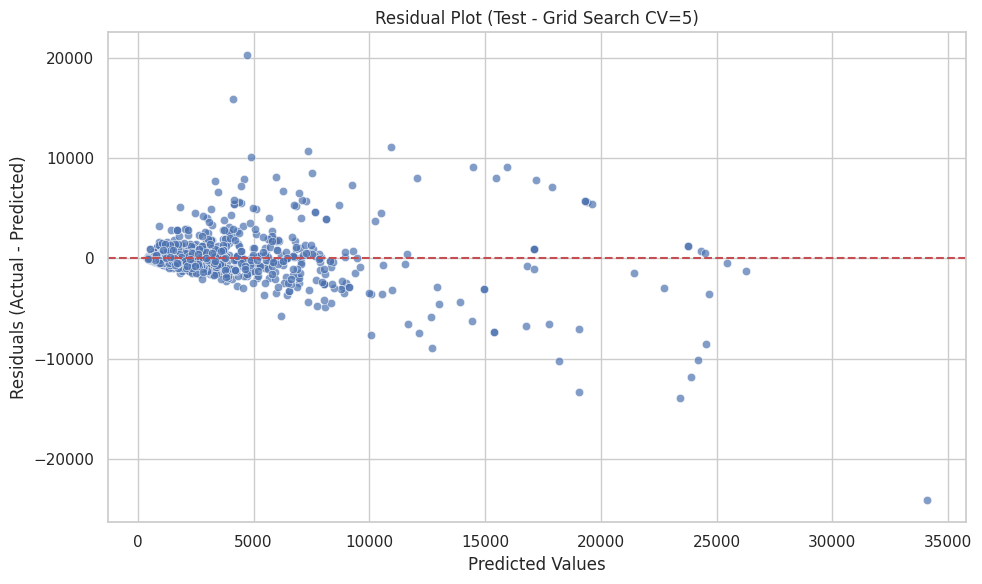

In [ ]:
# HYPERPARAMETER TUNING: GridSearch (CV = 5)

# Pipeline: StandardScaler + SVR
pipeline_gs_cv5 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Grid Search Parameter (CV = 5)
param_grid_gs_cv5 = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [5, 10, 20],
        'svr__epsilon': [0.03, 0.05],
        'svr__gamma': ['scale']
    },
    {
        'svr__kernel': ['poly'],
        'svr__degree': [2],
        'svr__C': [5, 10, 20],
        'svr__epsilon': [0.03, 0.05],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [5, 10, 20],
        'svr__epsilon': [0.03, 0.05],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    }
]

grid_search_gs_cv5 = GridSearchCV(
    pipeline_gs_cv5,
    param_grid_gs_cv5,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# TRAIN
start_time = time.time()

# Log transform target
y_train_log = np.log1p(y_train)

# Fit ke data training
grid_search_gs_cv5.fit(x_train, y_train_log)

end_time = time.time()

# Best parameter & CV score
print("\n[Grid Search | CV=5] Best Parameters:")
print(grid_search_gs_cv5.best_params_)
print("[Grid Search | CV=5] Best Cross-Validation R²:", grid_search_gs_cv5.best_score_)

# Cross-validation prediction (train)
y_cv_pred_log_gs_cv5 = cross_val_predict(
    grid_search_gs_cv5.best_estimator_,
    x_train,
    y_train_log,
    cv=5,
    n_jobs=-1
)
y_cv_pred_gs_cv5 = np.expm1(y_cv_pred_log_gs_cv5)

# Evaluation metrics train (CV)
mse_gs_cv5 = mean_squared_error(y_train, y_cv_pred_gs_cv5)
rmse_gs_cv5 = np.sqrt(mse_gs_cv5)
r2_gs_cv5 = r2_score(y_train, y_cv_pred_gs_cv5)

print("\n[Grid Search | CV=5] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_gs_cv5:.2f}")
print(f"RMSE (CV): {rmse_gs_cv5:.2f}")
print(f"R²   (CV): {r2_gs_cv5:.4f}")

# Evaluasi data test
y_test_log_pred_gs_cv5 = grid_search_gs_cv5.best_estimator_.predict(x_test)
y_test_pred_gs_cv5 = np.expm1(y_test_log_pred_gs_cv5)

mse_test_gs_cv5 = mean_squared_error(y_test, y_test_pred_gs_cv5)
rmse_test_gs_cv5 = np.sqrt(mse_test_gs_cv5)
r2_test_gs_cv5 = r2_score(y_test, y_test_pred_gs_cv5)

print("\n[Grid Search | CV=5] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_gs_cv5:.2f}")
print(f"RMSE (Test): {rmse_test_gs_cv5:.2f}")
print(f"R²   (Test): {r2_test_gs_cv5:.4f}")

# Waktu komputasi
elapsed_time_gs_cv5 = end_time - start_time
m, s = divmod(elapsed_time_gs_cv5, 60)
print(f"\n[Grid Search | CV=5] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_gs_cv5, alpha=0.7, label='Predicted')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Grid Search CV=5)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_gs_cv5 = y_train - y_cv_pred_gs_cv5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_gs_cv5, y=residuals_gs_cv5, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Train - Grid Search CV=5)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_gs_cv5, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Grid Search CV=5)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_gs_cv5 = y_test - y_test_pred_gs_cv5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_gs_cv5, y=residuals_test_gs_cv5, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Grid Search CV=5)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel 10 data pertama test set
predictions_test_gs_cv5_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_gs_cv5[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Grid Search CV=5):")
print(predictions_test_gs_cv5_df)


Perbandingan 10 data pertama (Test Set - Grid Search CV=5):
   Actual    Predicted
0  4200.0  3177.514820
1  2000.0  2933.990012
2  1990.0  2808.728344
3   574.0   567.519581
4  1900.0  1998.188415
5  3100.0  2831.936338
6  6500.0  3688.855141
7  4500.0  5907.936289
8  1670.0  2350.952521
9   479.0   458.316899


**GRID SEARCH CV 10**

Fitting 10 folds for each of 27 candidates, totalling 270 fits

[Grid Search | CV=10] Best Parameters:
{'svr__C': 8, 'svr__epsilon': 0.035, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
[Grid Search | CV=10] Best Cross-Validation R²: 0.8378195918062838

[Grid Search | CV=10] Cross-Validation Evaluation (Train):
MSE  (CV): 4850233.44
RMSE (CV): 2202.32
R²   (CV): 0.7609

[Grid Search | CV=10] Test Set Evaluation:
MSE  (Test): 4475487.31
RMSE (Test): 2115.53
R²   (Test): 0.7088

[Grid Search | CV=10] Waktu komputasi: 11 menit 19.97 detik


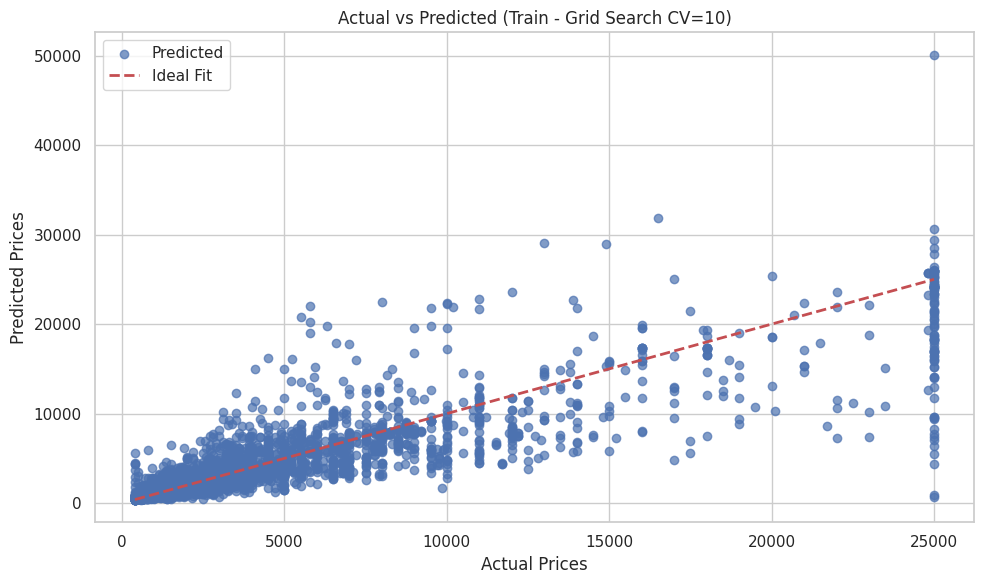

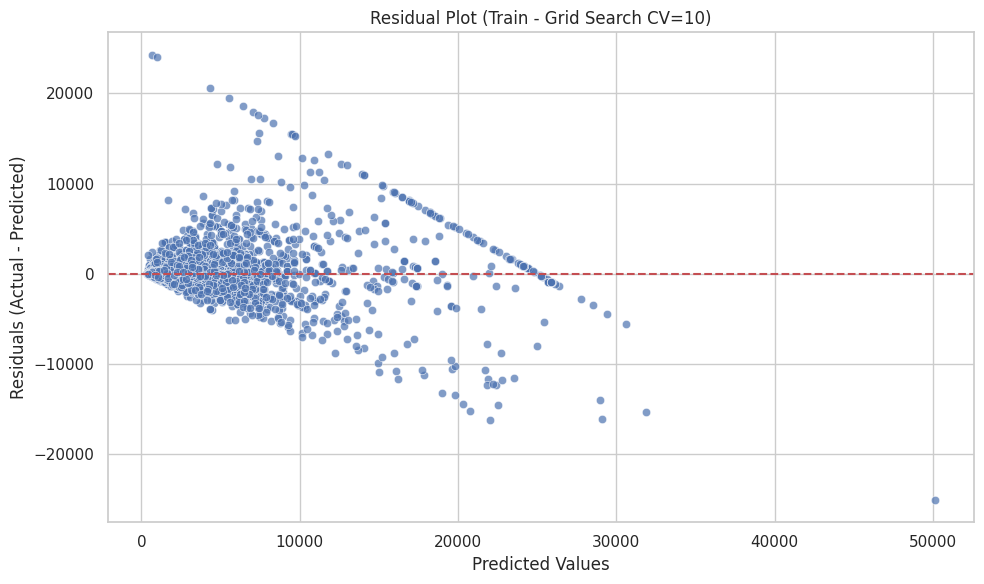

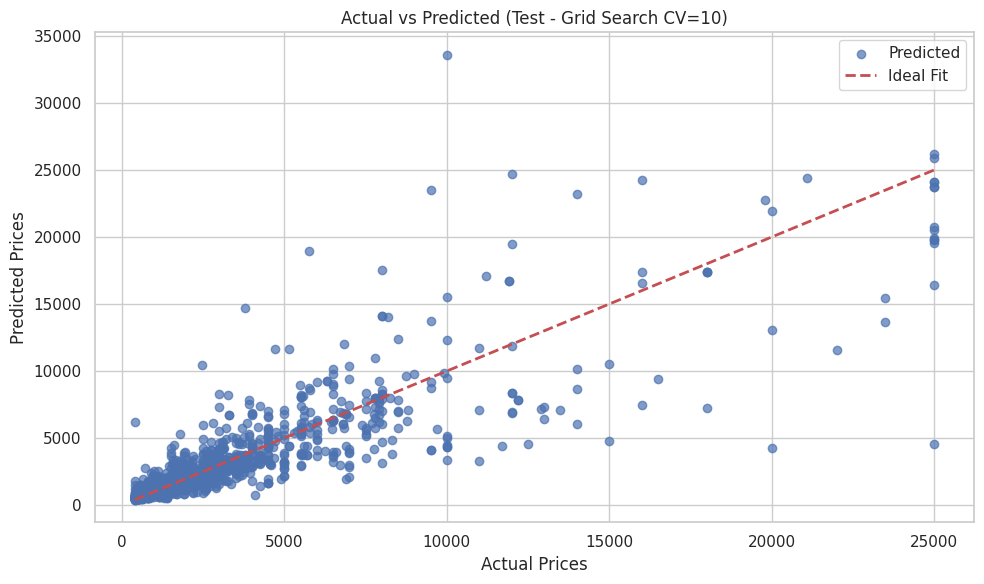

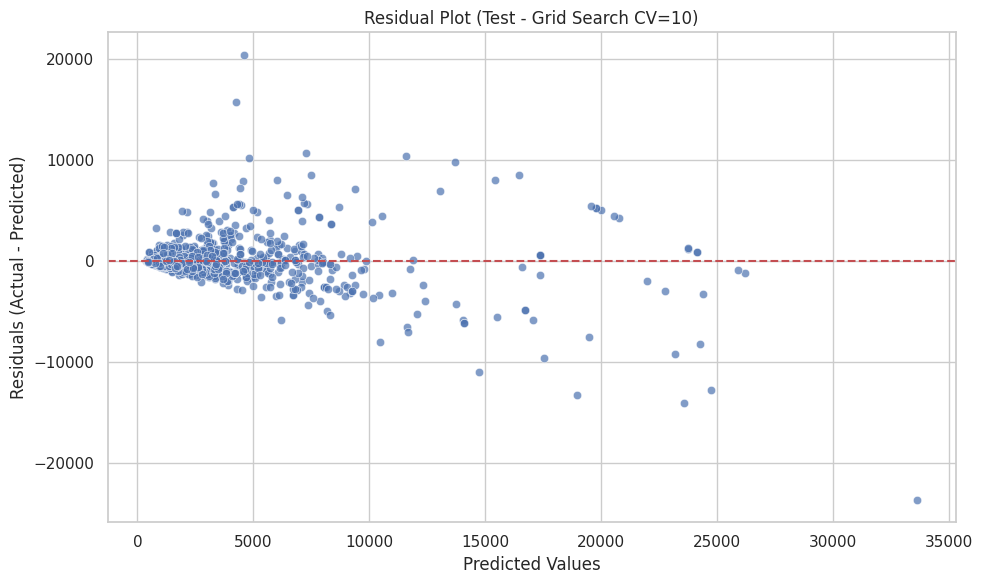

In [ ]:
# HYPERPARAMETER TUNING: GridSearch (CV = 10)

# Pipeline: StandardScaler + SVR
pipeline_gs_cv10 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Grid Search Parameter (CV = 10)
param_grid_gs_cv10 = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [8, 10, 12],
        'svr__epsilon': [0.025, 0.03, 0.035],
        'svr__gamma': ['scale']
    },
    {
        'svr__kernel': ['poly'],
        'svr__degree': [2],
        'svr__C': [8, 10, 12],
        'svr__epsilon': [0.025, 0.03, 0.035],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [8, 10, 12],
        'svr__epsilon': [0.025, 0.03, 0.035],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    }
]

grid_search_gs_cv10 = GridSearchCV(
    pipeline_gs_cv10,
    param_grid_gs_cv10,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# TRAINING
start_time = time.time()

# Log transform target
y_train_log = np.log1p(y_train)

# Fit ke data training
grid_search_gs_cv10.fit(x_train, y_train_log)

end_time = time.time()

# Best parameter & CV score
print("\n[Grid Search | CV=10] Best Parameters:")
print(grid_search_gs_cv10.best_params_)
print("[Grid Search | CV=10] Best Cross-Validation R²:", grid_search_gs_cv10.best_score_)

# Cross-validation prediction (train)
y_cv_pred_log_gs_cv10 = cross_val_predict(
    grid_search_gs_cv10.best_estimator_,
    x_train,
    y_train_log,
    cv=10,
    n_jobs=-1
)
y_cv_pred_gs_cv10 = np.expm1(y_cv_pred_log_gs_cv10)

# Evaluation metrics train (CV)
mse_gs_cv10 = mean_squared_error(y_train, y_cv_pred_gs_cv10)
rmse_gs_cv10 = np.sqrt(mse_gs_cv10)
r2_gs_cv10 = r2_score(y_train, y_cv_pred_gs_cv10)

print("\n[Grid Search | CV=10] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_gs_cv10:.2f}")
print(f"RMSE (CV): {rmse_gs_cv10:.2f}")
print(f"R²   (CV): {r2_gs_cv10:.4f}")

# Evaluasi data test
y_test_log_pred_gs_cv10 = grid_search_gs_cv10.best_estimator_.predict(x_test)
y_test_pred_gs_cv10 = np.expm1(y_test_log_pred_gs_cv10)

mse_test_gs_cv10 = mean_squared_error(y_test, y_test_pred_gs_cv10)
rmse_test_gs_cv10 = np.sqrt(mse_test_gs_cv10)
r2_test_gs_cv10 = r2_score(y_test, y_test_pred_gs_cv10)

print("\n[Grid Search | CV=10] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_gs_cv10:.2f}")
print(f"RMSE (Test): {rmse_test_gs_cv10:.2f}")
print(f"R²   (Test): {r2_test_gs_cv10:.4f}")

# Waktu komputasi
elapsed_time_gs_cv10 = end_time - start_time
m, s = divmod(elapsed_time_gs_cv10, 60)
print(f"\n[Grid Search | CV=10] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_gs_cv10, alpha=0.7, label='Predicted')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Grid Search CV=10)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_gs_cv10 = y_train - y_cv_pred_gs_cv10
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_gs_cv10, y=residuals_gs_cv10, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Train - Grid Search CV=10)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_gs_cv10, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Grid Search CV=10)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_gs_cv10 = y_test - y_test_pred_gs_cv10
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_gs_cv10, y=residuals_test_gs_cv10, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Grid Search CV=10)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel 10 data pertama test set
predictions_test_gs_cv10_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_gs_cv10[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Grid Search CV=10):")
print(predictions_test_gs_cv10_df)


Perbandingan 10 data pertama (Test Set - Grid Search CV=10):
   Actual    Predicted
0  4200.0  3163.145871
1  2000.0  2964.105049
2  1990.0  2801.060037
3   574.0   559.653914
4  1900.0  1959.678881
5  3100.0  2827.601671
6  6500.0  3585.228962
7  4500.0  5725.099566
8  1670.0  2347.071777
9   479.0   456.168415


**RANDOM SEARCH CV 3**

Fitting 3 folds for each of 5 candidates, totalling 15 fits

[Random Search | CV=3] Best Parameters:
{'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__epsilon': 0.02, 'svr__C': 3}
[Random Search | CV=3] Best Cross-Validation R²: 0.8387181030069298

[Random Search | CV=3] Cross-Validation Evaluation (Train):
MSE  (CV): 4749665.47
RMSE (CV): 2179.37
R²   (CV): 0.7658

[Random Search | CV=3] Test Set Evaluation:
MSE  (Test): 4652139.85
RMSE (Test): 2156.88
R²   (Test): 0.6973
[Random Search | CV=3] Waktu komputasi: 0 menit 18.78 detik


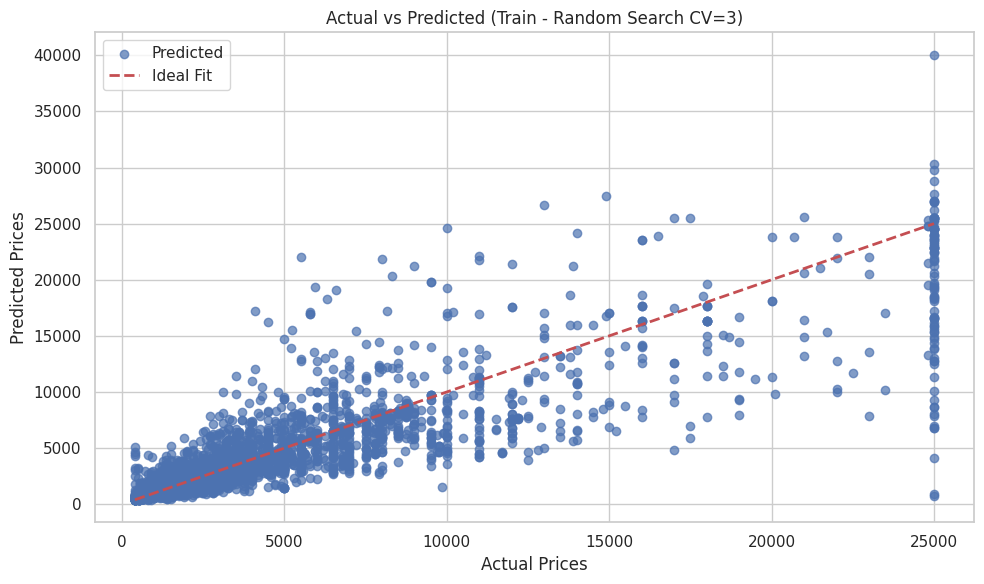

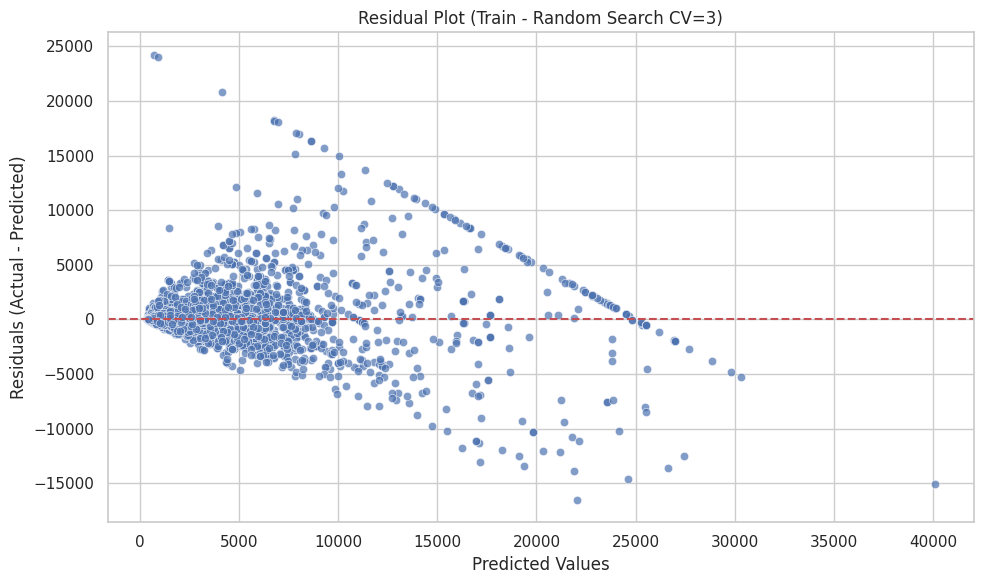

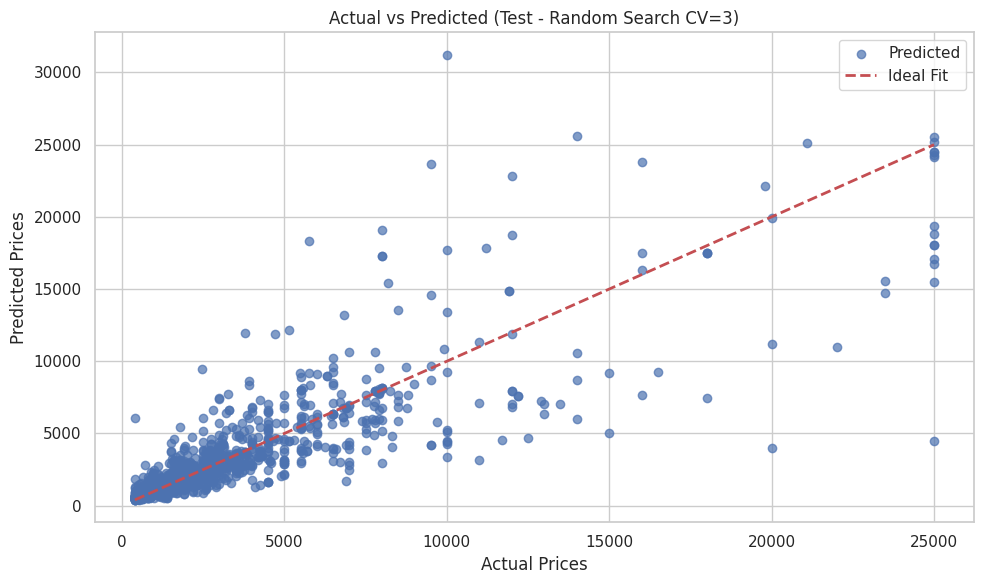

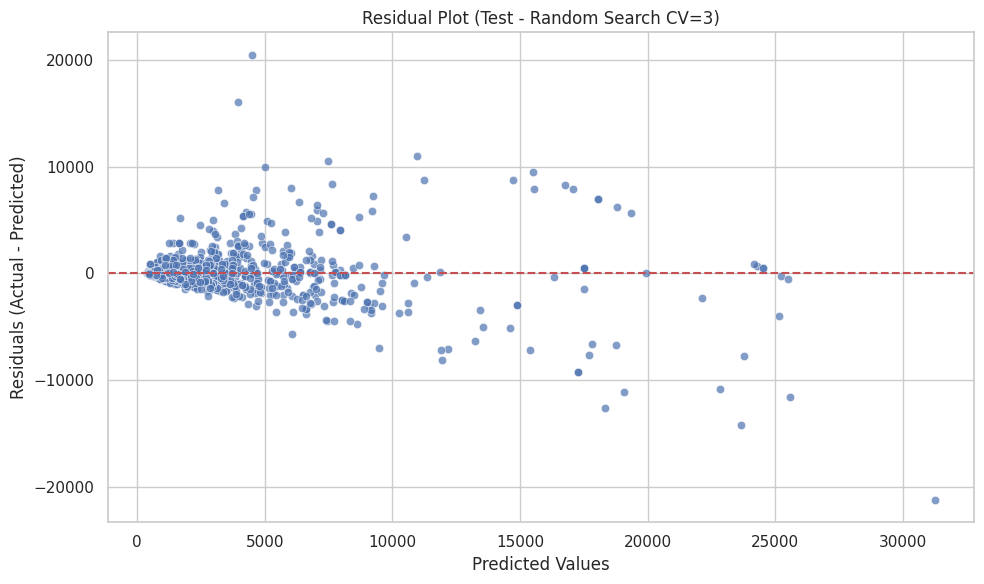

In [ ]:
# HYPERPARAMETER TUNING: Random Search (CV = 3)
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict

# Pipeline: StandardScaler + SVR
pipeline_rs_cv3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Random Search Parameter (CV = 3)
param_dist_rs_cv3 = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [3, 6],
        'svr__epsilon': [0.02, 0.04],
        'svr__gamma': ['scale']
    },
    {
        'svr__kernel': ['poly'],
        'svr__degree': [2],
        'svr__C': [3, 6],
        'svr__epsilon': [0.02, 0.04],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [3, 6],
        'svr__epsilon': [0.02, 0.04],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    }
]

random_search_rs_cv3 = RandomizedSearchCV(
    pipeline_rs_cv3,
    param_distributions=param_dist_rs_cv3,
    n_iter=5,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# TRAIN
start_time = time.time()

# Fit target log-transform (pakai y_train_log yang sudah ada)
random_search_rs_cv3.fit(x_train, y_train_log)

end_time = time.time()

# Best parameter & CV score
print("\n[Random Search | CV=3] Best Parameters:")
print(random_search_rs_cv3.best_params_)
print("[Random Search | CV=3] Best Cross-Validation R²:", random_search_rs_cv3.best_score_)

# Cross-validation prediction (train)
y_cv_pred_log_rs_cv3 = cross_val_predict(
    random_search_rs_cv3.best_estimator_,
    x_train,
    y_train_log,
    cv=3,
    n_jobs=-1
)
y_cv_pred_rs_cv3 = np.expm1(y_cv_pred_log_rs_cv3)

# Evaluation metrics train (CV)
mse_rs_cv3 = mean_squared_error(y_train, y_cv_pred_rs_cv3)
rmse_rs_cv3 = np.sqrt(mse_rs_cv3)
r2_rs_cv3 = r2_score(y_train, y_cv_pred_rs_cv3)

print("\n[Random Search | CV=3] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_rs_cv3:.2f}")
print(f"RMSE (CV): {rmse_rs_cv3:.2f}")
print(f"R²   (CV): {r2_rs_cv3:.4f}")

# Evaluasi data test
y_test_log_pred_rs_cv3 = random_search_rs_cv3.best_estimator_.predict(x_test)
y_test_pred_rs_cv3 = np.expm1(y_test_log_pred_rs_cv3)

mse_test_rs_cv3 = mean_squared_error(y_test, y_test_pred_rs_cv3)
rmse_test_rs_cv3 = np.sqrt(mse_test_rs_cv3)
r2_test_rs_cv3 = r2_score(y_test, y_test_pred_rs_cv3)

print("\n[Random Search | CV=3] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_rs_cv3:.2f}")
print(f"RMSE (Test): {rmse_test_rs_cv3:.2f}")
print(f"R²   (Test): {r2_test_rs_cv3:.4f}")

# Waktu komputasi
elapsed_time_rs_cv3 = end_time - start_time
m, s = divmod(elapsed_time_rs_cv3, 60)
print(f"[Random Search | CV=3] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_rs_cv3, alpha=0.7, label='Predicted')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Random Search CV=3)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_rs_cv3 = y_train - y_cv_pred_rs_cv3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_rs_cv3, y=residuals_rs_cv3, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Train - Random Search CV=3)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rs_cv3, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Random Search CV=3)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_rs_cv3 = y_test - y_test_pred_rs_cv3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_rs_cv3, y=residuals_test_rs_cv3, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Random Search CV=3)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel 10 data pertama test set
predictions_test_rs_cv3_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_rs_cv3[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Random Search CV=3):")
print(predictions_test_rs_cv3_df)


Perbandingan 10 data pertama (Test Set - Random Search CV=3):
   Actual    Predicted
0  4200.0  3156.093172
1  2000.0  2984.681373
2  1990.0  2886.335710
3   574.0   562.387076
4  1900.0  1938.926987
5  3100.0  2878.334339
6  6500.0  3646.582478
7  4500.0  5870.671713
8  1670.0  2273.797178
9   479.0   455.839261


**RANDOM SEARCH CV 5**

Fitting 5 folds for each of 10 candidates, totalling 50 fits

[Random Search | CV=5] Best Parameters:
{'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__epsilon': 0.05, 'svr__C': 5}
[Random Search | CV=5] Best Cross-Validation R²: 0.8391889141522688

[Random Search | CV=5] Cross-Validation Evaluation (Train):
MSE  (CV): 4790962.86
RMSE (CV): 2188.83
R²   (CV): 0.7638

[Random Search | CV=5] Test Set Evaluation:
MSE  (Test): 4597804.94
RMSE (Test): 2144.25
R²   (Test): 0.7008
[Random Search | CV=5] Waktu komputasi: 1 menit 46.17 detik


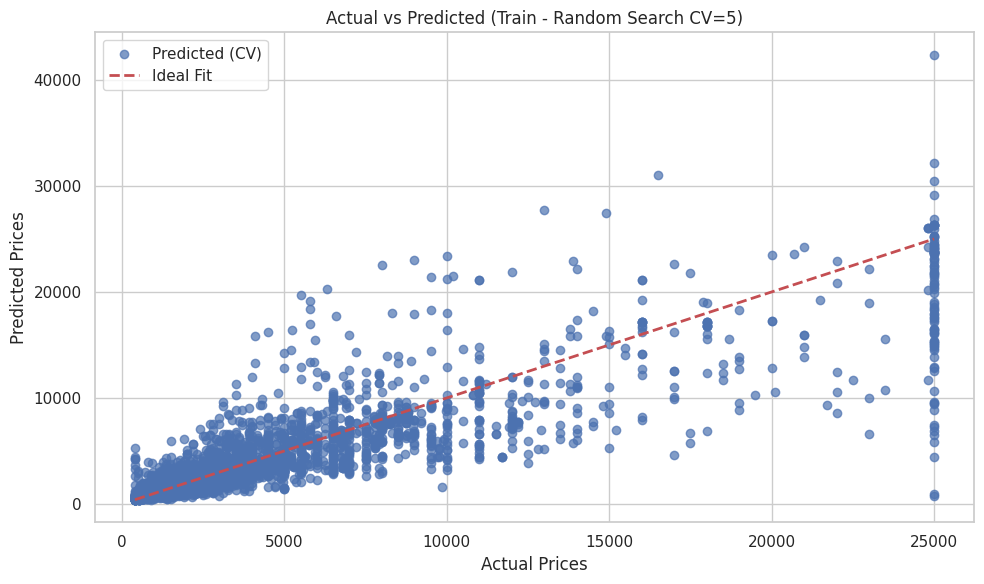

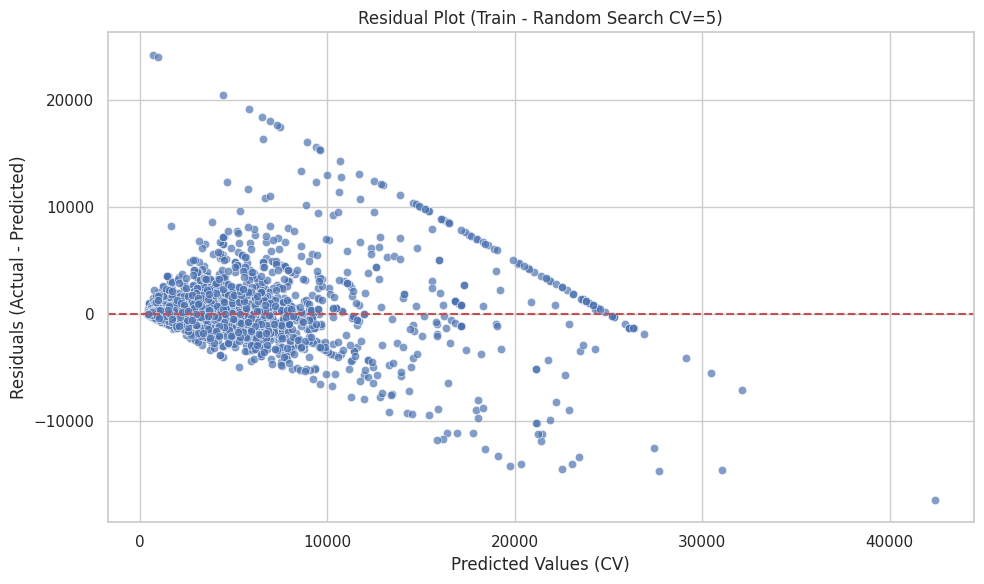

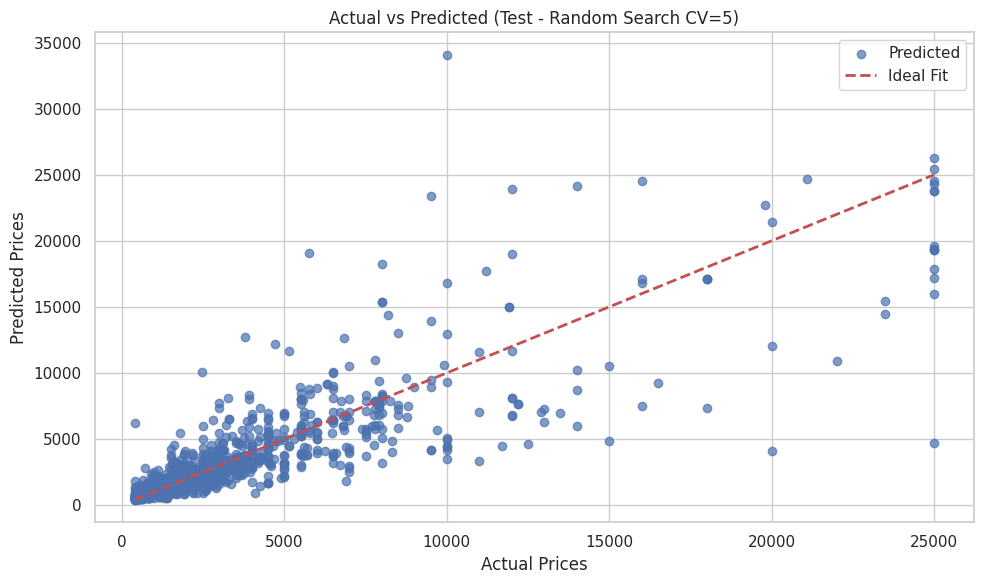

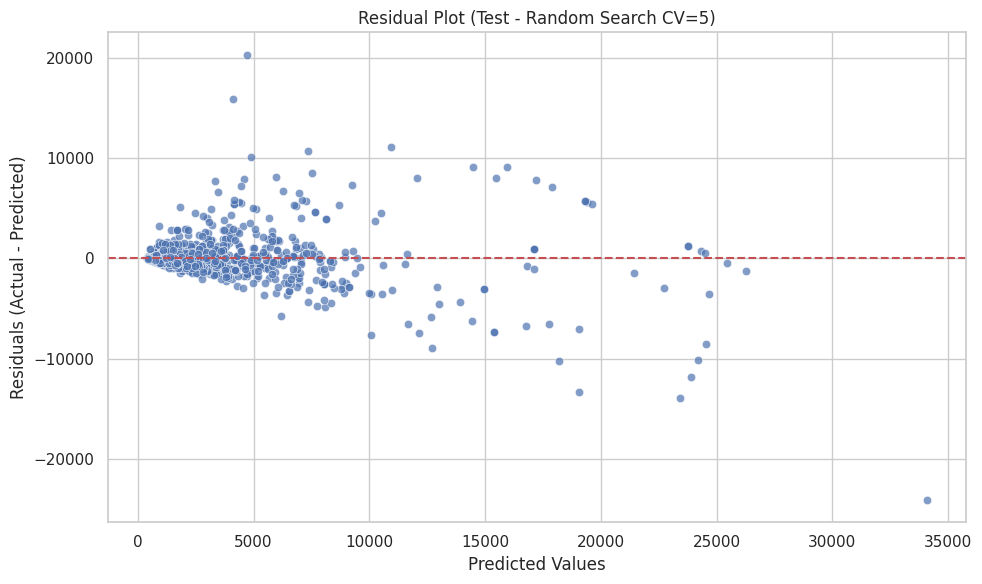

In [ ]:
# HYPERPARAMETER TUNING: Random Search (CV = 5)

# Pipeline: StandardScaler + SVR
pipeline_rs_cv5 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Random Search Parameter (CV = 5)
param_dist_rs_cv5 = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [5, 10, 20],
        'svr__epsilon': [0.03, 0.05],
        'svr__gamma': ['scale']
    },
    {
        'svr__kernel': ['poly'],
        'svr__degree': [2],
        'svr__C': [5, 10, 20],
        'svr__epsilon': [0.03, 0.05],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [5, 10, 20],
        'svr__epsilon': [0.03, 0.05],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    }
]

random_search_rs_cv5 = RandomizedSearchCV(
    pipeline_rs_cv5,
    param_distributions=param_dist_rs_cv5,
    n_iter=10,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# TRAIN
start_time = time.time()

# Fit dengan target log-transform
random_search_rs_cv5.fit(x_train, y_train_log)

end_time = time.time()

# Best Parameters & CV Score
print("\n[Random Search | CV=5] Best Parameters:")
print(random_search_rs_cv5.best_params_)
print("[Random Search | CV=5] Best Cross-Validation R²:", random_search_rs_cv5.best_score_)

# Cross-validation prediction (train)
best_model_rs_cv5 = random_search_rs_cv5.best_estimator_
y_cv_pred_log_rs_cv5 = cross_val_predict(
    best_model_rs_cv5,
    x_train,
    y_train_log,
    cv=5,
    n_jobs=-1
)
y_cv_pred_rs_cv5 = np.expm1(y_cv_pred_log_rs_cv5)

# Evaluation metrics train (CV)
mse_rs_cv5 = mean_squared_error(y_train, y_cv_pred_rs_cv5)
rmse_rs_cv5 = np.sqrt(mse_rs_cv5)
r2_rs_cv5 = r2_score(y_train, y_cv_pred_rs_cv5)

print("\n[Random Search | CV=5] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_rs_cv5:.2f}")
print(f"RMSE (CV): {rmse_rs_cv5:.2f}")
print(f"R²   (CV): {r2_rs_cv5:.4f}")

# Evaluasi data test
y_test_log_pred_rs_cv5 = best_model_rs_cv5.predict(x_test)
y_test_pred_rs_cv5 = np.expm1(y_test_log_pred_rs_cv5)

mse_test_rs_cv5 = mean_squared_error(y_test, y_test_pred_rs_cv5)
rmse_test_rs_cv5 = np.sqrt(mse_test_rs_cv5)
r2_test_rs_cv5 = r2_score(y_test, y_test_pred_rs_cv5)

print("\n[Random Search | CV=5] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_rs_cv5:.2f}")
print(f"RMSE (Test): {rmse_test_rs_cv5:.2f}")
print(f"R²   (Test): {r2_test_rs_cv5:.4f}")

# Waktu komputasi
elapsed_time_rs_cv5 = end_time - start_time
m, s = divmod(elapsed_time_rs_cv5, 60)
print(f"[Random Search | CV=5] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_rs_cv5, alpha=0.7, label='Predicted (CV)')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Random Search CV=5)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_rs_cv5 = y_train - y_cv_pred_rs_cv5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_rs_cv5, y=residuals_rs_cv5, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values (CV)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Train - Random Search CV=5)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rs_cv5, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Random Search CV=5)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_rs_cv5 = y_test - y_test_pred_rs_cv5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_rs_cv5, y=residuals_test_rs_cv5, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Random Search CV=5)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel 10 data pertama test set
predictions_test_rs_cv5_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_rs_cv5[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Random Search CV=5):")
print(predictions_test_rs_cv5_df)


Perbandingan 10 data pertama (Test Set - Random Search CV=5):
   Actual    Predicted
0  4200.0  3177.514820
1  2000.0  2933.990012
2  1990.0  2808.728344
3   574.0   567.519581
4  1900.0  1998.188415
5  3100.0  2831.936338
6  6500.0  3688.855141
7  4500.0  5907.936289
8  1670.0  2350.952521
9   479.0   458.316899


**RANDOM SEARCH CV 10**

Fitting 10 folds for each of 10 candidates, totalling 100 fits

[Random Search | CV=10] Best Parameters:
{'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__epsilon': 0.025, 'svr__C': 8}
[Random Search | CV=10] Best Cross-Validation R²: 0.8377987729754764

[Random Search | CV=10] Cross-Validation Evaluation (Train):
MSE  (CV): 4873790.47
RMSE (CV): 2207.67
R²   (CV): 0.7597

[Random Search | CV=10] Test Set Evaluation:
MSE  (Test): 4441286.55
RMSE (Test): 2107.44
R²   (Test): 0.7110
[Random Search | CV=10] Waktu komputasi: 4 menit 48.98 detik


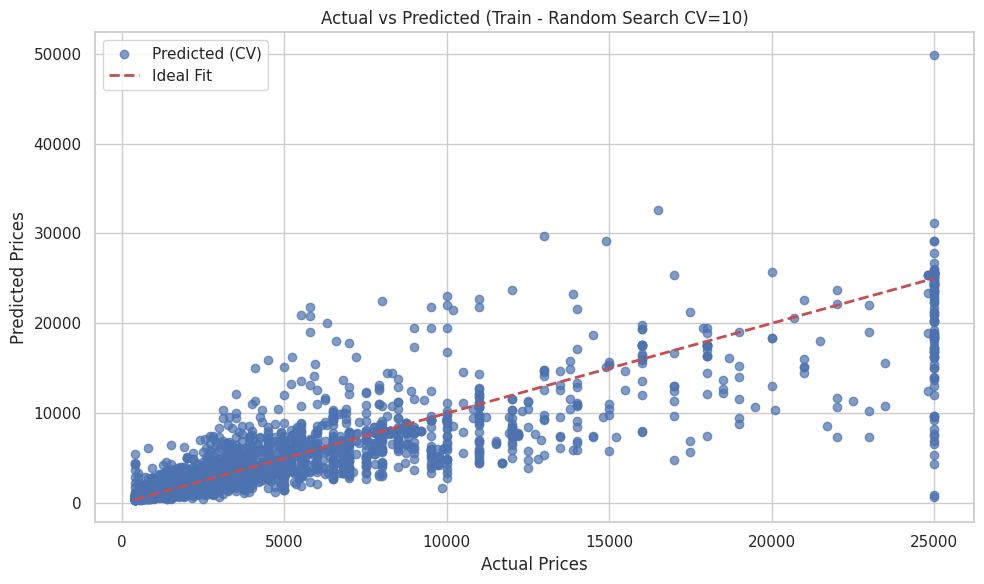

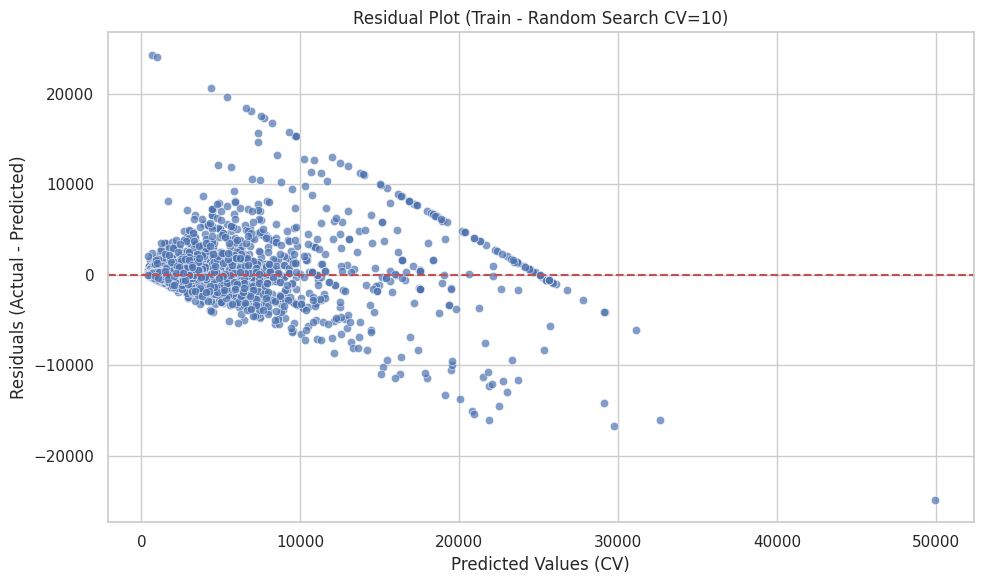

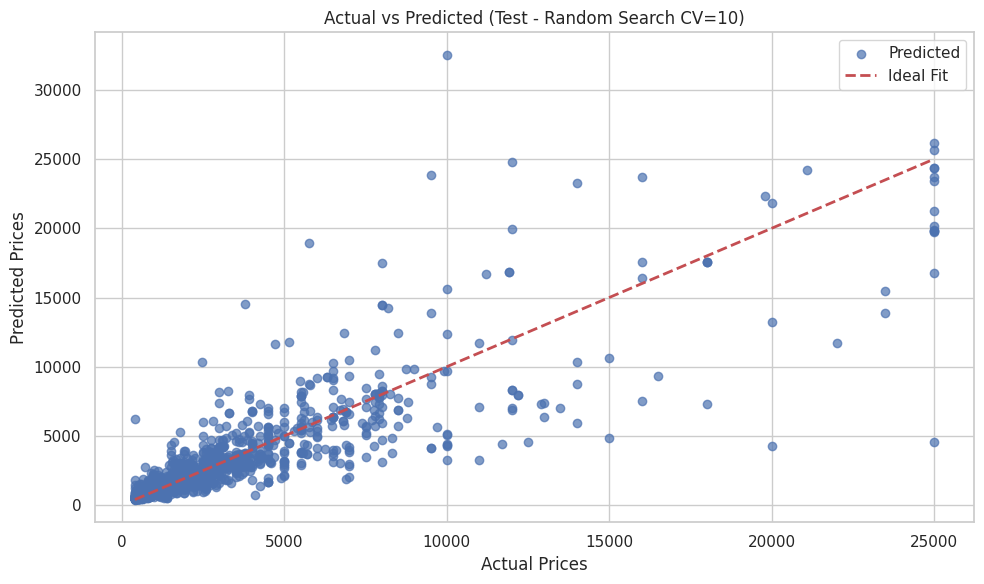

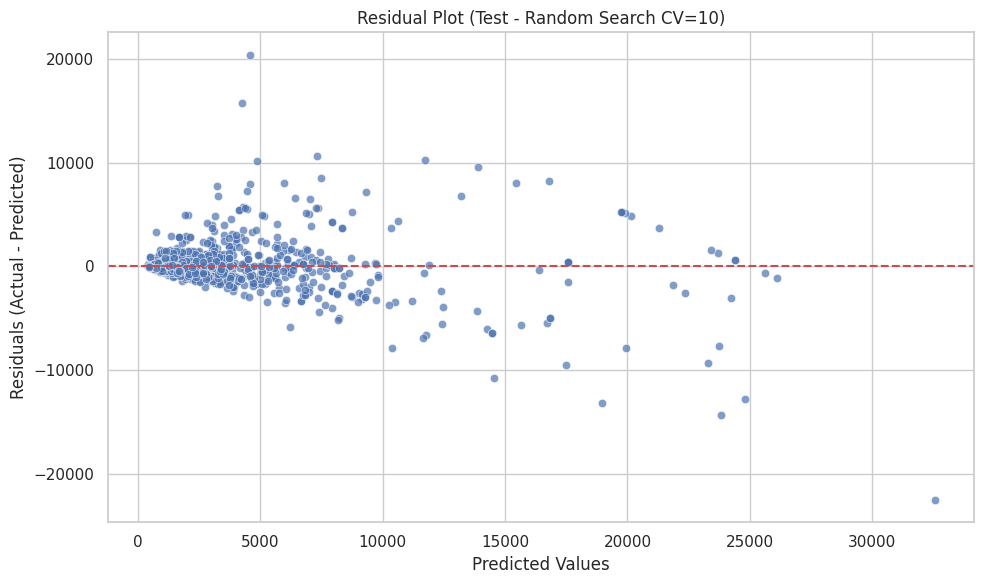

In [ ]:
# HYPERPARAMETER TUNING: Random Search (CV = 10)

# Pipeline: StandardScaler + SVR
pipeline_rs_cv10 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Random Search Parameter (CV = 10)
param_dist_rs_cv10 = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [8, 10, 12],
        'svr__epsilon': [0.025, 0.03, 0.035],
        'svr__gamma': ['scale']
    },
    {
        'svr__kernel': ['poly'],
        'svr__degree': [2],
        'svr__C': [8, 10, 12],
        'svr__epsilon': [0.025, 0.03, 0.035],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [8, 10, 12],
        'svr__epsilon': [0.025, 0.03, 0.035],
        'svr__gamma': ['scale'],
        'svr__coef0': [0]
    }
]

random_search_rs_cv10 = RandomizedSearchCV(
    pipeline_rs_cv10,
    param_distributions=param_dist_rs_cv10,
    n_iter=10,
    cv=10,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# TRAIN
start_time = time.time()

# Fit dengan target log-transform
random_search_rs_cv10.fit(x_train, y_train_log)

end_time = time.time()

# Best Parameters & CV Score
print("\n[Random Search | CV=10] Best Parameters:")
print(random_search_rs_cv10.best_params_)
print("[Random Search | CV=10] Best Cross-Validation R²:", random_search_rs_cv10.best_score_)

# Cross-validation prediction (train)
best_model_rs_cv10 = random_search_rs_cv10.best_estimator_
y_cv_pred_log_rs_cv10 = cross_val_predict(
    best_model_rs_cv10,
    x_train,
    y_train_log,
    cv=10,
    n_jobs=-1
)
y_cv_pred_rs_cv10 = np.expm1(y_cv_pred_log_rs_cv10)

# Evaluation metrics train (CV)
mse_rs_cv10 = mean_squared_error(y_train, y_cv_pred_rs_cv10)
rmse_rs_cv10 = np.sqrt(mse_rs_cv10)
r2_rs_cv10 = r2_score(y_train, y_cv_pred_rs_cv10)

print("\n[Random Search | CV=10] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_rs_cv10:.2f}")
print(f"RMSE (CV): {rmse_rs_cv10:.2f}")
print(f"R²   (CV): {r2_rs_cv10:.4f}")

# Evaluasi data test
y_test_log_pred_rs_cv10 = best_model_rs_cv10.predict(x_test)
y_test_pred_rs_cv10 = np.expm1(y_test_log_pred_rs_cv10)

mse_test_rs_cv10 = mean_squared_error(y_test, y_test_pred_rs_cv10)
rmse_test_rs_cv10 = np.sqrt(mse_test_rs_cv10)
r2_test_rs_cv10 = r2_score(y_test, y_test_pred_rs_cv10)

print("\n[Random Search | CV=10] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_rs_cv10:.2f}")
print(f"RMSE (Test): {rmse_test_rs_cv10:.2f}")
print(f"R²   (Test): {r2_test_rs_cv10:.4f}")

# Waktu komputasi
elapsed_time_rs_cv10 = end_time - start_time
m, s = divmod(elapsed_time_rs_cv10, 60)
print(f"[Random Search | CV=10] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_rs_cv10, alpha=0.7, label='Predicted (CV)')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Random Search CV=10)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_rs_cv10 = y_train - y_cv_pred_rs_cv10
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_rs_cv10, y=residuals_rs_cv10, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values (CV)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Train - Random Search CV=10)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rs_cv10, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Random Search CV=10)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_rs_cv10 = y_test - y_test_pred_rs_cv10
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_rs_cv10, y=residuals_test_rs_cv10, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Random Search CV=10)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel 10 data pertama test set
predictions_test_rs_cv10_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_rs_cv10[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Random Search CV=10):")
print(predictions_test_rs_cv10_df)


Perbandingan 10 data pertama (Test Set - Random Search CV=10):
   Actual    Predicted
0  4200.0  3172.566756
1  2000.0  2980.946518
2  1990.0  2813.445490
3   574.0   565.720848
4  1900.0  1947.886904
5  3100.0  2846.950004
6  6500.0  3530.913068
7  4500.0  5638.046064
8  1670.0  2322.343915
9   479.0   456.970712


**BAYESIAN OPTIMIZATION CV 3**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 14.0 MB/s eta 0:00:00


[I 2026-01-07 15:14:14,717] A new study created in memory with name: no-name-016ce3be-959d-4b58-adf9-df1e7cf9850f
[I 2026-01-07 15:14:17,656] Trial 0 finished with value: 0.8390325754915029 and parameters: {'svr__kernel': 'rbf', 'svr__C': 3, 'svr__epsilon': 0.04}. Best is trial 0 with value: 0.8390325754915029.
[I 2026-01-07 15:14:20,872] Trial 1 finished with value: -256897.49466475646 and parameters: {'svr__kernel': 'sigmoid', 'svr__C': 6, 'svr__epsilon': 0.04}. Best is trial 0 with value: 0.8390325754915029.
[I 2026-01-07 15:14:25,627] Trial 2 finished with value: 0.8365393393047175 and parameters: {'svr__kernel': 'rbf', 'svr__C': 6, 'svr__epsilon': 0.02}. Best is trial 0 with value: 0.8390325754915029.
[I 2026-01-07 15:14:29,728] Trial 3 finished with value: -64258.129077099475 and parameters: {'svr__kernel': 'sigmoid', 'svr__C': 3, 'svr__epsilon': 0.04}. Best is trial 0 with value: 0.8390325754915029.
[I 2026-01-07 15:14:33,448] Trial 4 finished with value: 0.8365393393047175 and 


[Bayesian Optimization | CV=3] Best Parameters:
{'svr__kernel': 'rbf', 'svr__C': 3, 'svr__epsilon': 0.04}
[Bayesian Optimization | CV=3] Best Cross-Validation R²: 0.8390325754915029

[Bayesian Optimization | CV=3] Cross-Validation Evaluation (Train):
MSE  (CV): 4750360.76
RMSE (CV): 2179.53
R²   (CV): 0.7658

[Bayesian Optimization | CV=3] Test Set Evaluation:
MSE  (Test): 4697779.12
RMSE (Test): 2167.44
R²   (Test): 0.6943
[Bayesian Optimization | CV=3] Waktu komputasi: 0 menit 18.73 detik


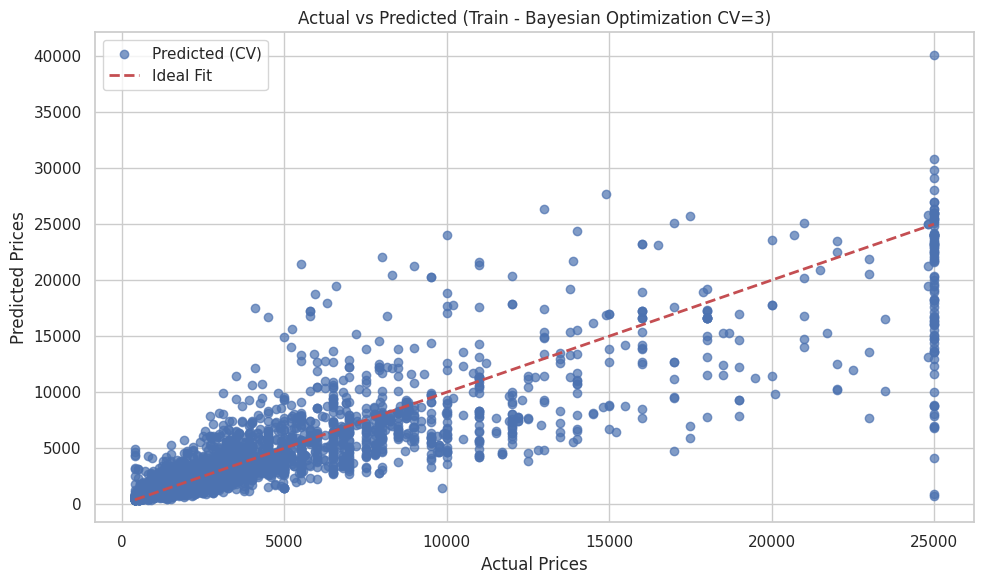

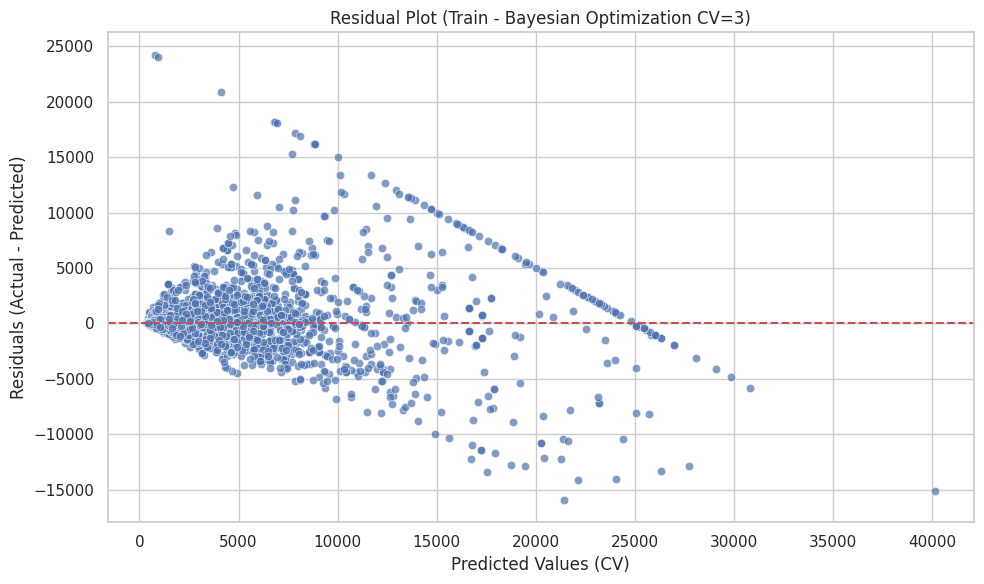

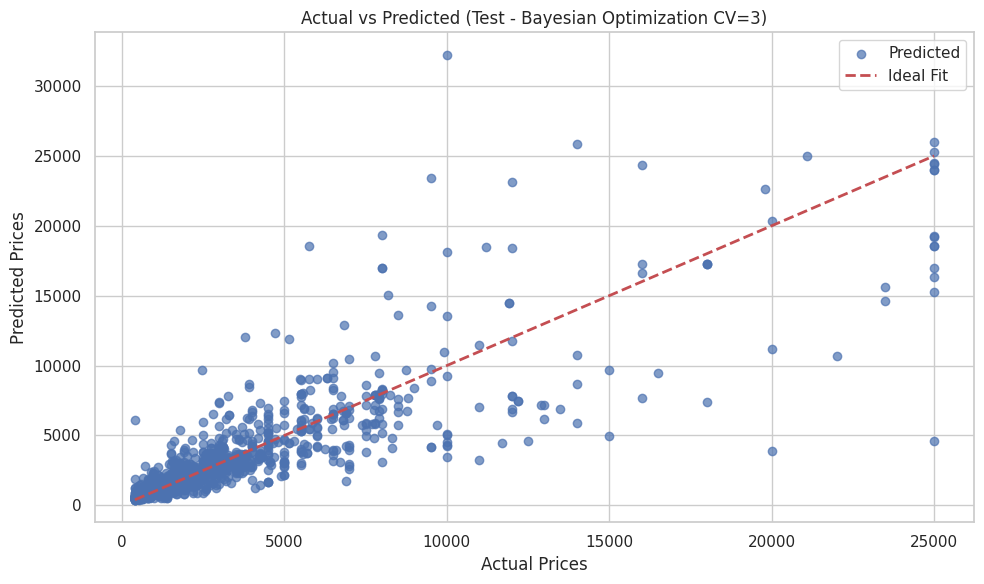

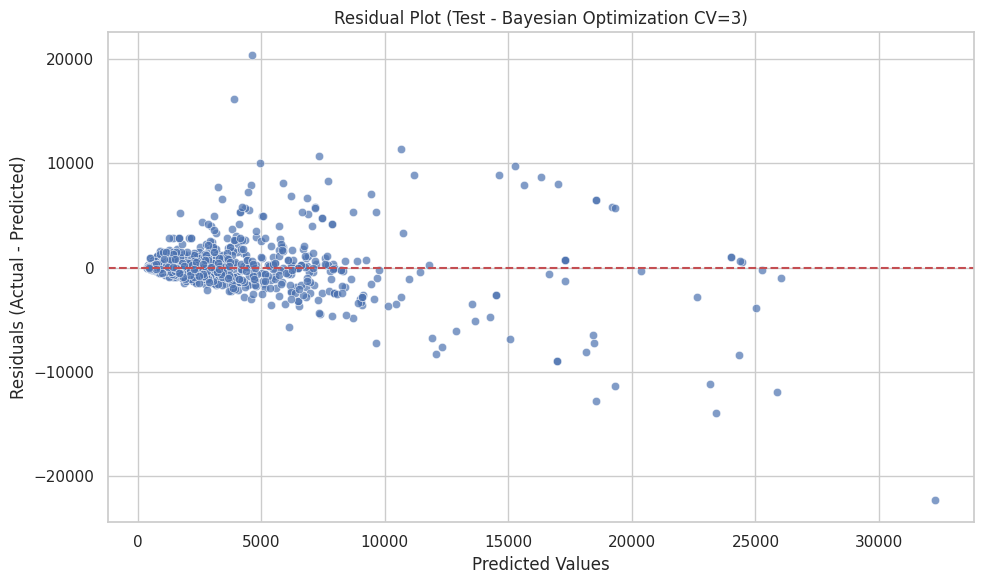

In [ ]:
# HYPERPARAMETER TUNING: Bayesian Optimization (CV = 3)
!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score, cross_val_predict

def objective_bo_cv3(trial):

    kernel = trial.suggest_categorical("svr__kernel", ["rbf", "poly", "sigmoid"])

    if kernel == "rbf":
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [3, 6]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.02, 0.04]),
            "gamma": "scale"
        }

    elif kernel == "poly":
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [3, 6]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.02, 0.04]),
            "gamma": "scale",
            "degree": 2,
            "coef0": 0
        }

    else:  # sigmoid
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [3, 6]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.02, 0.04]),
            "gamma": "scale",
            "coef0": 0
        }

    pipeline_bo_cv3 = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(**params_svr))
    ])

    scores = cross_val_score(
        pipeline_bo_cv3,
        x_train,
        y_train_log,
        scoring='r2',
        cv=3,
        n_jobs=-1
    )

    return scores.mean()


# Optimization
start_time = time.time()

study_bo_cv3 = optuna.create_study(direction="maximize")
study_bo_cv3.optimize(objective_bo_cv3, n_trials=5)

end_time = time.time()

# Best Parameters & CV Score
best_params_bo_cv3 = study_bo_cv3.best_params
best_score_bo_cv3 = study_bo_cv3.best_value

print("\n[Bayesian Optimization | CV=3] Best Parameters:")
print(best_params_bo_cv3)
print("[Bayesian Optimization | CV=3] Best Cross-Validation R²:", best_score_bo_cv3)

# Best model
best_model_bo_cv3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(
        kernel=best_params_bo_cv3["svr__kernel"],
        C=best_params_bo_cv3["svr__C"],
        epsilon=best_params_bo_cv3["svr__epsilon"],
        gamma="scale",
        degree=best_params_bo_cv3.get("svr__degree", 2),
        coef0=best_params_bo_cv3.get("svr__coef0", 0)
    ))
])

# Cross-validation prediction (Train)
y_cv_pred_log_bo_cv3 = cross_val_predict(
    best_model_bo_cv3,
    x_train,
    y_train_log,
    cv=3,
    n_jobs=-1
)
y_cv_pred_bo_cv3 = np.expm1(y_cv_pred_log_bo_cv3)

# Evaluation metrics (Train CV)
mse_bo_cv3 = mean_squared_error(y_train, y_cv_pred_bo_cv3)
rmse_bo_cv3 = np.sqrt(mse_bo_cv3)
r2_bo_cv3 = r2_score(y_train, y_cv_pred_bo_cv3)

print("\n[Bayesian Optimization | CV=3] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_bo_cv3:.2f}")
print(f"RMSE (CV): {rmse_bo_cv3:.2f}")
print(f"R²   (CV): {r2_bo_cv3:.4f}")

# Fit final model
best_model_bo_cv3.fit(x_train, y_train_log)

# Evaluasi data test
y_test_log_pred_bo_cv3 = best_model_bo_cv3.predict(x_test)
y_test_pred_bo_cv3 = np.expm1(y_test_log_pred_bo_cv3)

mse_test_bo_cv3 = mean_squared_error(y_test, y_test_pred_bo_cv3)
rmse_test_bo_cv3 = np.sqrt(mse_test_bo_cv3)
r2_test_bo_cv3 = r2_score(y_test, y_test_pred_bo_cv3)

print("\n[Bayesian Optimization | CV=3] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_bo_cv3:.2f}")
print(f"RMSE (Test): {rmse_test_bo_cv3:.2f}")
print(f"R²   (Test): {r2_test_bo_cv3:.4f}")

# Waktu komputasi
elapsed_time_bo_cv3 = end_time - start_time
m, s = divmod(elapsed_time_bo_cv3, 60)
print(f"[Bayesian Optimization | CV=3] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_bo_cv3, alpha=0.7, label='Predicted (CV)')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Bayesian Optimization CV=3)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_bo_cv3 = y_train - y_cv_pred_bo_cv3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_bo_cv3, y=residuals_bo_cv3, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values (CV)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Train - Bayesian Optimization CV=3)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_bo_cv3, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Bayesian Optimization CV=3)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_bo_cv3 = y_test - y_test_pred_bo_cv3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_bo_cv3, y=residuals_test_bo_cv3, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Bayesian Optimization CV=3)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel 10 data pertama test set
predictions_test_bo_cv3_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_bo_cv3[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Bayesian Optimization CV=3):")
print(predictions_test_bo_cv3_df)


Perbandingan 10 data pertama (Test Set - Bayesian Optimization CV=3):
   Actual    Predicted
0  4200.0  3167.921518
1  2000.0  2942.742754
2  1990.0  2844.914648
3   574.0   562.474417
4  1900.0  1978.069614
5  3100.0  2858.565601
6  6500.0  3632.970091
7  4500.0  5860.049864
8  1670.0  2301.219352
9   479.0   460.486938


**BAYESIAN OPTIMIZATION CV 5**

[I 2026-01-07 15:14:40,417] A new study created in memory with name: no-name-54881d03-bba0-4797-bf7a-16faf3d19a32
[I 2026-01-07 15:15:12,832] Trial 0 finished with value: -3.4303438112490596 and parameters: {'svr__kernel': 'poly', 'svr__C': 10, 'svr__epsilon': 0.05}. Best is trial 0 with value: -3.4303438112490596.
[I 2026-01-07 15:15:25,320] Trial 1 finished with value: -257801.80811724448 and parameters: {'svr__kernel': 'sigmoid', 'svr__C': 5, 'svr__epsilon': 0.03}. Best is trial 0 with value: -3.4303438112490596.
[I 2026-01-07 15:15:33,923] Trial 2 finished with value: -4125667.5822147354 and parameters: {'svr__kernel': 'sigmoid', 'svr__C': 20, 'svr__epsilon': 0.03}. Best is trial 0 with value: -3.4303438112490596.
[I 2026-01-07 15:15:40,307] Trial 3 finished with value: -4117995.9326217673 and parameters: {'svr__kernel': 'sigmoid', 'svr__C': 20, 'svr__epsilon': 0.05}. Best is trial 0 with value: -3.4303438112490596.
[I 2026-01-07 15:15:48,752] Trial 4 finished with value: -4117995.


[Bayesian Optimization | CV=5] Best Parameters:
{'svr__kernel': 'rbf', 'svr__C': 5, 'svr__epsilon': 0.03}
[Bayesian Optimization | CV=5] Best Cross-Validation R²: 0.838889495338681

[Bayesian Optimization | CV=5] Cross-Validation Evaluation (Train):
MSE  (CV): 4829285.09
RMSE (CV): 2197.56
R²   (CV): 0.7619
[Bayesian Optimization | CV=5] Waktu komputasi: 1 menit 56.59 detik


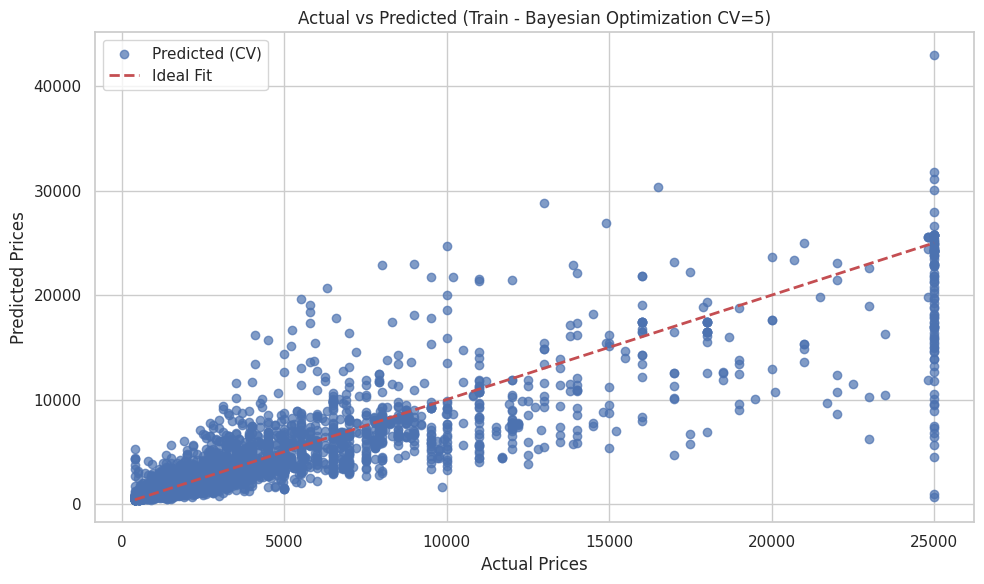

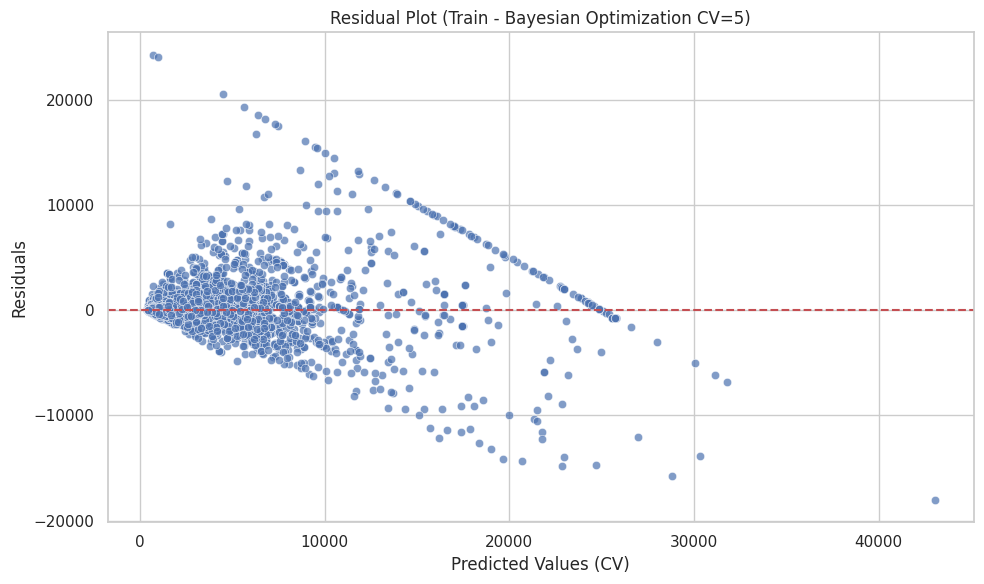


[Bayesian Optimization | CV=5] Test Set Evaluation:
MSE  (Test): 4579233.46
RMSE (Test): 2139.91
R²   (Test): 0.7020


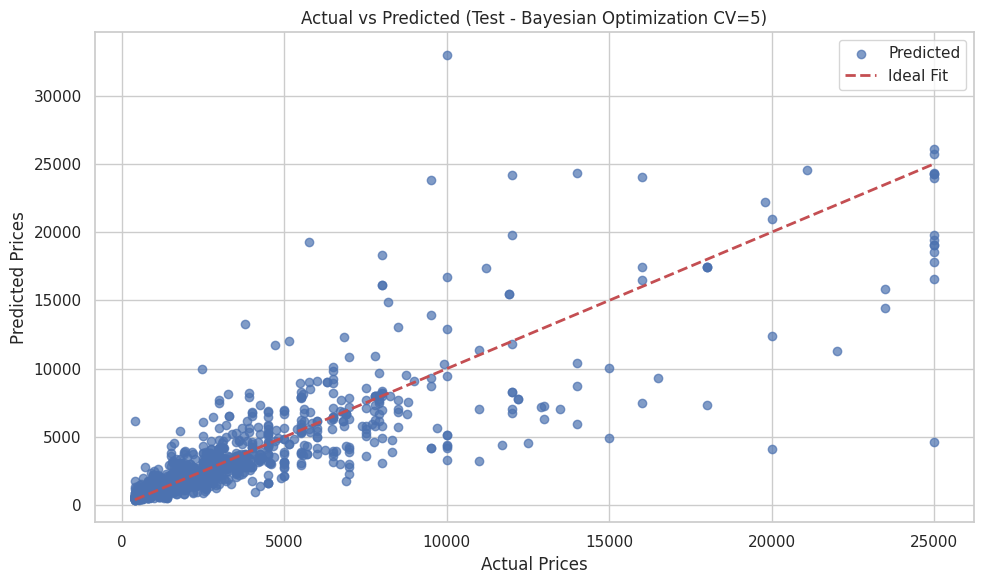

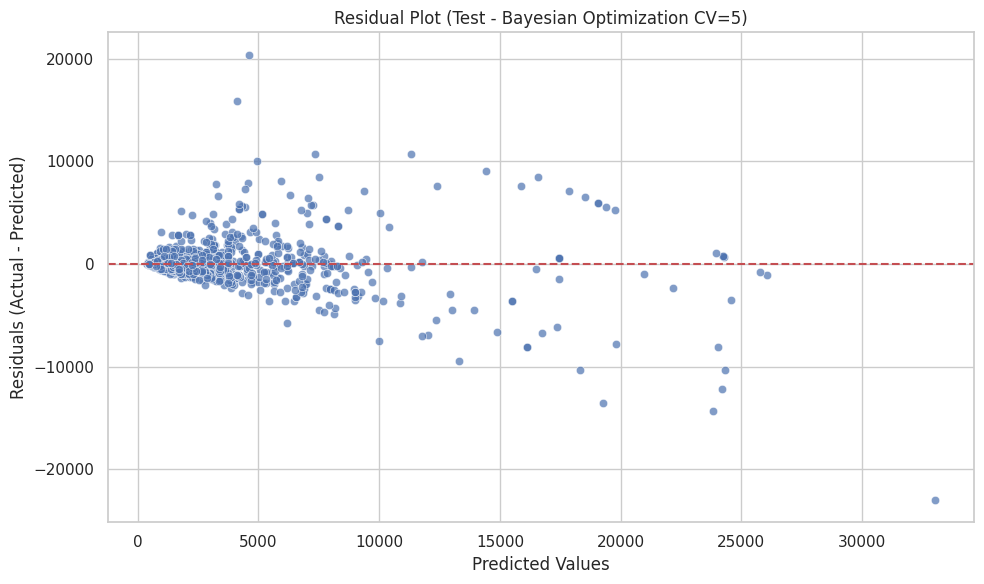

In [ ]:
# HYPERPARAMETER TUNING: Bayesian Optimization (CV = 5)

def objective_bo_cv5(trial):

    kernel = trial.suggest_categorical("svr__kernel", ["rbf", "poly", "sigmoid"])

    if kernel == "rbf":
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [5, 10, 20]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.03, 0.05]),
            "gamma": "scale"
        }

    elif kernel == "poly":
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [5, 10, 20]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.03, 0.05]),
            "gamma": "scale",
            "degree": 2,
            "coef0": 0
        }

    else:  # sigmoid
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [5, 10, 20]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.03, 0.05]),
            "gamma": "scale",
            "coef0": 0
        }

    pipeline_bo_cv5 = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(**params_svr))
    ])

    scores = cross_val_score(
        pipeline_bo_cv5,
        x_train,
        y_train_log,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )

    return scores.mean()

# Optimization
start_time = time.time()

study_bo_cv5 = optuna.create_study(direction="maximize")
study_bo_cv5.optimize(objective_bo_cv5, n_trials=10)

end_time = time.time()

# Best Parameters & CV Score
best_params_bo_cv5 = study_bo_cv5.best_params
best_score_bo_cv5 = study_bo_cv5.best_value

print("\n[Bayesian Optimization | CV=5] Best Parameters:")
print(best_params_bo_cv5)
print("[Bayesian Optimization | CV=5] Best Cross-Validation R²:", best_score_bo_cv5)

# Best model
best_model_bo_cv5 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(
        kernel=best_params_bo_cv5["svr__kernel"],
        C=best_params_bo_cv5["svr__C"],
        epsilon=best_params_bo_cv5["svr__epsilon"],
        gamma="scale",
        degree=best_params_bo_cv5.get("svr__degree", 2),
        coef0=best_params_bo_cv5.get("svr__coef0", 0)
    ))
])

# Cross-validation prediction (Train)
y_cv_pred_log_bo_cv5 = cross_val_predict(
    best_model_bo_cv5,
    x_train,
    y_train_log,
    cv=5,
    n_jobs=-1
)
y_cv_pred_bo_cv5 = np.expm1(y_cv_pred_log_bo_cv5)

# Evaluation metrics (Train CV)
mse_bo_cv5 = mean_squared_error(y_train, y_cv_pred_bo_cv5)
rmse_bo_cv5 = np.sqrt(mse_bo_cv5)
r2_bo_cv5 = r2_score(y_train, y_cv_pred_bo_cv5)

print("\n[Bayesian Optimization | CV=5] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_bo_cv5:.2f}")
print(f"RMSE (CV): {rmse_bo_cv5:.2f}")
print(f"R²   (CV): {r2_bo_cv5:.4f}")

# Fit final model
best_model_bo_cv5.fit(x_train, y_train_log)

# Waktu komputasi
elapsed_time_bo_cv5 = end_time - start_time
m, s = divmod(elapsed_time_bo_cv5, 60)
print(f"[Bayesian Optimization | CV=5] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_bo_cv5, alpha=0.7, label='Predicted (CV)')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Bayesian Optimization CV=5)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_bo_cv5 = y_train - y_cv_pred_bo_cv5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_bo_cv5, y=residuals_bo_cv5, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values (CV)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Train - Bayesian Optimization CV=5)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluasi data test
y_test_log_pred_bo_cv5 = best_model_bo_cv5.predict(x_test)
y_test_pred_bo_cv5 = np.expm1(y_test_log_pred_bo_cv5)

mse_test_bo_cv5 = mean_squared_error(y_test, y_test_pred_bo_cv5)
rmse_test_bo_cv5 = np.sqrt(mse_test_bo_cv5)
r2_test_bo_cv5 = r2_score(y_test, y_test_pred_bo_cv5)

print("\n[Bayesian Optimization | CV=5] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_bo_cv5:.2f}")
print(f"RMSE (Test): {rmse_test_bo_cv5:.2f}")
print(f"R²   (Test): {r2_test_bo_cv5:.4f}")

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_bo_cv5, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Bayesian Optimization CV=5)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_bo_cv5 = y_test - y_test_pred_bo_cv5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_bo_cv5, y=residuals_test_bo_cv5, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Bayesian Optimization CV=5)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tabel 10 data pertama test set
predictions_test_bo_cv5_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_bo_cv5[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Bayesian Optimization CV=5):")
print(predictions_test_bo_cv5_df)


Perbandingan 10 data pertama (Test Set - Bayesian Optimization CV=5):
   Actual    Predicted
0  4200.0  3135.647998
1  2000.0  2977.693536
2  1990.0  2830.339020
3   574.0   560.323638
4  1900.0  1958.183824
5  3100.0  2853.634182
6  6500.0  3618.875951
7  4500.0  5773.454152
8  1670.0  2327.153371
9   479.0   458.546452


**BAYESIAN OPTIMIZATION CV 10**

[I 2026-01-07 15:16:49,707] A new study created in memory with name: no-name-60786f4c-72b3-4e18-91ea-e7804373cf84
[I 2026-01-07 15:17:32,975] Trial 0 finished with value: 0.8371915083509347 and parameters: {'svr__kernel': 'rbf', 'svr__C': 10, 'svr__epsilon': 0.035}. Best is trial 0 with value: 0.8371915083509347.
[I 2026-01-07 15:18:10,516] Trial 1 finished with value: 0.176338994363718 and parameters: {'svr__kernel': 'poly', 'svr__C': 12, 'svr__epsilon': 0.025}. Best is trial 0 with value: 0.8371915083509347.
[I 2026-01-07 15:18:26,577] Trial 2 finished with value: -1878994.9001752983 and parameters: {'svr__kernel': 'sigmoid', 'svr__C': 12, 'svr__epsilon': 0.035}. Best is trial 0 with value: 0.8371915083509347.
[I 2026-01-07 15:18:42,714] Trial 3 finished with value: -1878926.2962400909 and parameters: {'svr__kernel': 'sigmoid', 'svr__C': 12, 'svr__epsilon': 0.025}. Best is trial 0 with value: 0.8371915083509347.
[I 2026-01-07 15:19:09,324] Trial 4 finished with value: 0.8364414260536


[Bayesian Optimization | CV=10] Best Parameters:
{'svr__kernel': 'rbf', 'svr__C': 10, 'svr__epsilon': 0.035}
[Bayesian Optimization | CV=10] Best Cross-Validation R²: 0.8371915083509347

[Bayesian Optimization | CV=10] Cross-Validation Evaluation (Train):
MSE  (CV): 4929881.44
RMSE (CV): 2220.33
R²   (CV): 0.7569
[Bayesian Optimization | CV=10] Waktu komputasi: 4 menit 56.64 detik


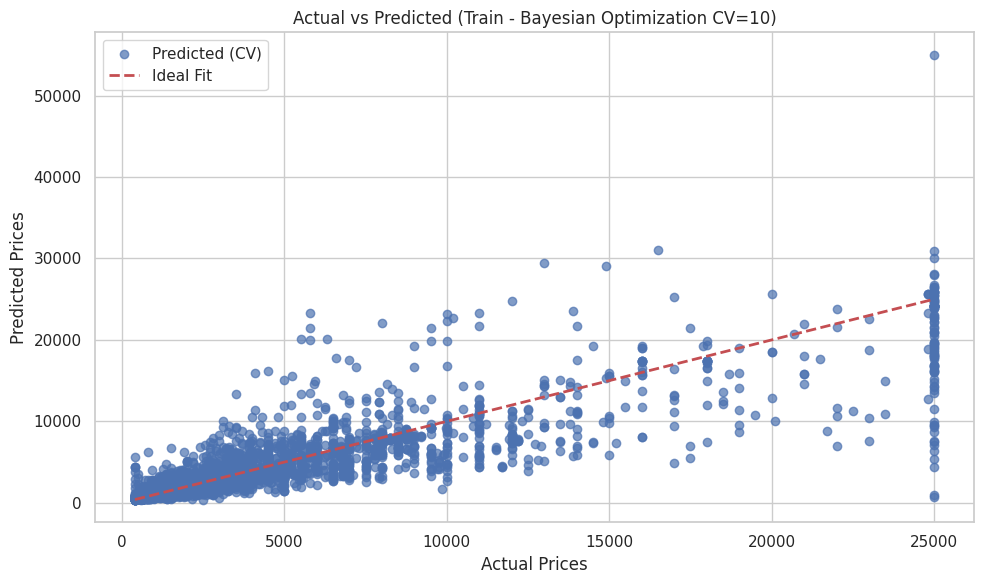

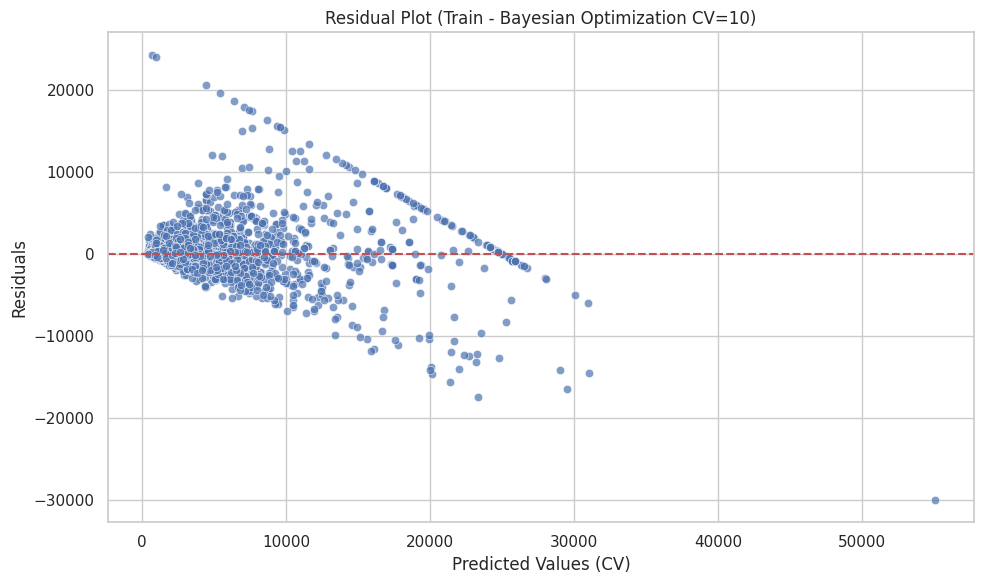


[Bayesian Optimization | CV=10] Test Set Evaluation:
MSE  (Test): 4446461.11
RMSE (Test): 2108.66
R²   (Test): 0.7107


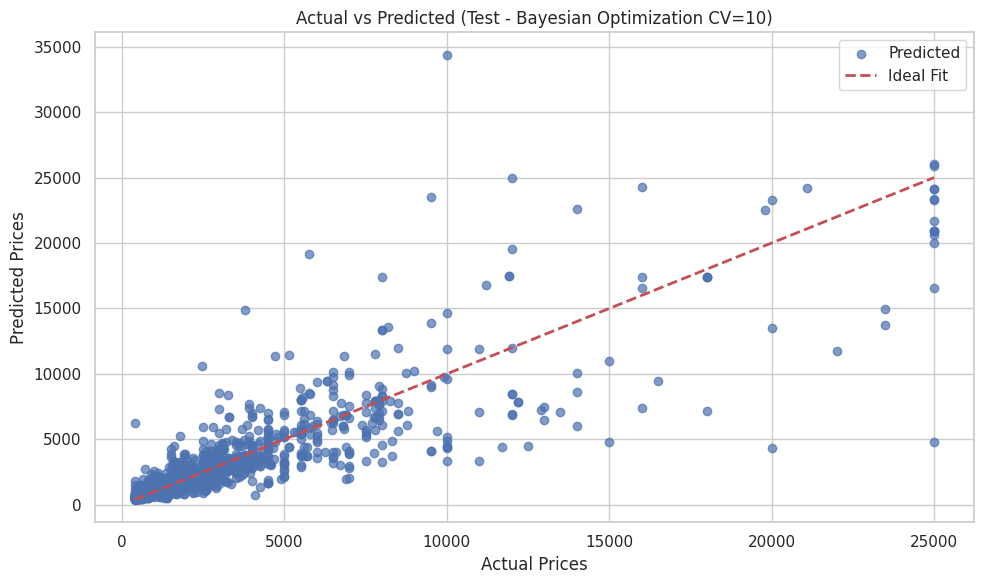

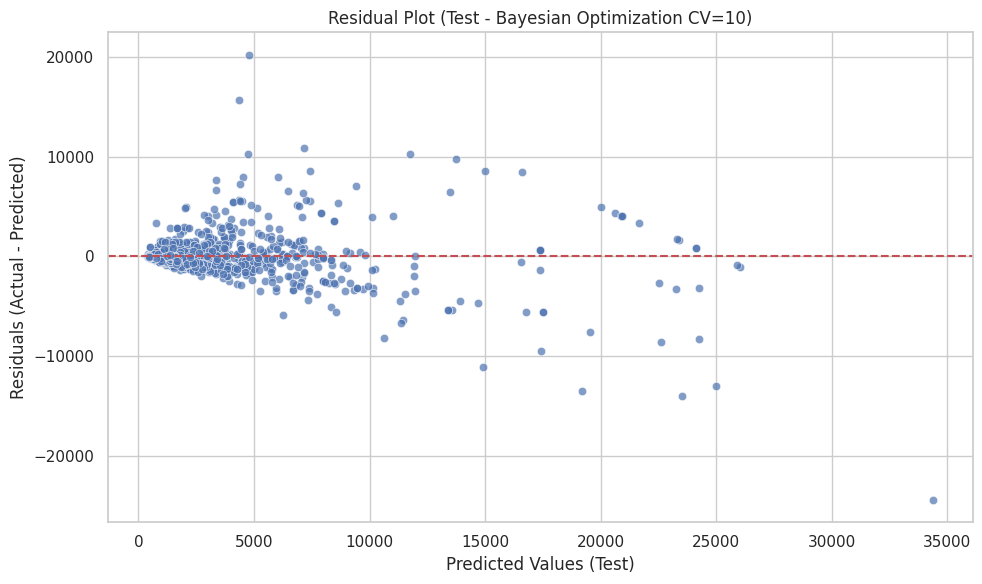

In [ ]:
# HYPERPARAMETER TUNING: Bayesian Optimization (CV = 10)

def objective_bo_cv10(trial):

    kernel = trial.suggest_categorical("svr__kernel", ["rbf", "poly", "sigmoid"])

    if kernel == "rbf":
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [8, 10, 12]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.025, 0.03, 0.035]),
            "gamma": "scale"
        }

    elif kernel == "poly":
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [8, 10, 12]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.025, 0.03, 0.035]),
            "gamma": "scale",
            "degree": 2,
            "coef0": 0
        }

    else:  # sigmoid
        params_svr = {
            "kernel": kernel,
            "C": trial.suggest_categorical("svr__C", [8, 10, 12]),
            "epsilon": trial.suggest_categorical("svr__epsilon", [0.025, 0.03, 0.035]),
            "gamma": "scale",
            "coef0": 0
        }

    pipeline_bo_cv10 = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(**params_svr))
    ])

    scores = cross_val_score(
        pipeline_bo_cv10,
        x_train,
        y_train_log,
        scoring='r2',
        cv=10,
        n_jobs=-1
    )

    return scores.mean()

# Optimization
start_time = time.time()

study_bo_cv10 = optuna.create_study(direction="maximize")
study_bo_cv10.optimize(objective_bo_cv10, n_trials=10)

end_time = time.time()

# Best Parameters & CV Score
best_params_bo_cv10 = study_bo_cv10.best_params
best_score_bo_cv10 = study_bo_cv10.best_value

print("\n[Bayesian Optimization | CV=10] Best Parameters:")
print(best_params_bo_cv10)
print("[Bayesian Optimization | CV=10] Best Cross-Validation R²:", best_score_bo_cv10)

# Best model
best_model_bo_cv10 = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(
        kernel=best_params_bo_cv10["svr__kernel"],
        C=best_params_bo_cv10["svr__C"],
        epsilon=best_params_bo_cv10["svr__epsilon"],
        gamma="scale",
        degree=best_params_bo_cv10.get("svr__degree", 2),
        coef0=best_params_bo_cv10.get("svr__coef0", 0)
    ))
])

# Cross-validation prediction (Train)
y_cv_pred_log_bo_cv10 = cross_val_predict(
    best_model_bo_cv10,
    x_train,
    y_train_log,
    cv=10,
    n_jobs=-1
)
y_cv_pred_bo_cv10 = np.expm1(y_cv_pred_log_bo_cv10)

# Evaluation metrics (Train CV)
mse_bo_cv10 = mean_squared_error(y_train, y_cv_pred_bo_cv10)
rmse_bo_cv10 = np.sqrt(mse_bo_cv10)
r2_bo_cv10 = r2_score(y_train, y_cv_pred_bo_cv10)

print("\n[Bayesian Optimization | CV=10] Cross-Validation Evaluation (Train):")
print(f"MSE  (CV): {mse_bo_cv10:.2f}")
print(f"RMSE (CV): {rmse_bo_cv10:.2f}")
print(f"R²   (CV): {r2_bo_cv10:.4f}")

# Fit final model
best_model_bo_cv10.fit(x_train, y_train_log)

# Waktu komputasi
elapsed_time_bo_cv10 = end_time - start_time
m, s = divmod(elapsed_time_bo_cv10, 60)
print(f"[Bayesian Optimization | CV=10] Waktu komputasi: {int(m)} menit {s:.2f} detik")

# Plot Actual vs Predicted (Train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_cv_pred_bo_cv10, alpha=0.7, label='Predicted (CV)')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Train - Bayesian Optimization CV=10)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Train)
residuals_bo_cv10 = y_train - y_cv_pred_bo_cv10
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_cv_pred_bo_cv10, y=residuals_bo_cv10, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values (CV)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Train - Bayesian Optimization CV=10)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluasi data test
y_test_log_pred_bo_cv10 = best_model_bo_cv10.predict(x_test)
y_test_pred_bo_cv10 = np.expm1(y_test_log_pred_bo_cv10)

mse_test_bo_cv10 = mean_squared_error(y_test, y_test_pred_bo_cv10)
rmse_test_bo_cv10 = np.sqrt(mse_test_bo_cv10)
r2_test_bo_cv10 = r2_score(y_test, y_test_pred_bo_cv10)

print("\n[Bayesian Optimization | CV=10] Test Set Evaluation:")
print(f"MSE  (Test): {mse_test_bo_cv10:.2f}")
print(f"RMSE (Test): {rmse_test_bo_cv10:.2f}")
print(f"R²   (Test): {r2_test_bo_cv10:.4f}")

# Plot Actual vs Predicted (Test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_bo_cv10, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted (Test - Bayesian Optimization CV=10)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot (Test)
residuals_test_bo_cv10 = y_test - y_test_pred_bo_cv10
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_bo_cv10, y=residuals_test_bo_cv10, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values (Test)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test - Bayesian Optimization CV=10)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Tabel 10 data pertama test set
predictions_test_bo_cv10_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred_bo_cv10[:10]
})

print("\nPerbandingan 10 data pertama (Test Set - Bayesian Optimization CV=10):")
print(predictions_test_bo_cv10_df)


Perbandingan 10 data pertama (Test Set - Bayesian Optimization CV=10):
   Actual    Predicted
0  4200.0  3184.527933
1  2000.0  2975.283563
2  1990.0  2791.614640
3   574.0   559.703889
4  1900.0  1937.673056
5  3100.0  2831.848992
6  6500.0  3544.293138
7  4500.0  5683.490625
8  1670.0  2355.718027
9   479.0   458.070352


###**8. EVALUASI PERBANDINGAN METODE**

In [ ]:
def format_time(seconds):
    m, s = divmod(seconds, 60)
    return f"{int(m)}:{int(s):02d}"

def model_size_svr_bytes(model):
    svr = model.named_steps['svr']
    size_bytes = 0
    for attr in ['support_vectors_', 'dual_coef_', '_intercept_']:
        if hasattr(svr, attr):
            size_bytes += np.array(getattr(svr, attr)).nbytes
    return size_bytes

def format_model_size(bytes_size):
    if bytes_size < 1024:
        return f"{bytes_size} B"
    elif bytes_size < 1024**2:
        return f"{bytes_size/1024:.2f} KB"
    else:
        return f"{bytes_size/1024**2:.2f} MB"

# FIT FINAL MODEL
# BASELINE
baseline_model.fit(x_train, y_train_log)

# GRID SEARCH
best_model_gs_cv3  = grid_search_gs_cv3.best_estimator_
best_model_gs_cv5  = grid_search_gs_cv5.best_estimator_
best_model_gs_cv10 = grid_search_gs_cv10.best_estimator_

best_model_gs_cv3.fit(x_train, y_train_log)
best_model_gs_cv5.fit(x_train, y_train_log)
best_model_gs_cv10.fit(x_train, y_train_log)

# RANDOM SEARCH
best_model_rs_cv3  = random_search_rs_cv3.best_estimator_
best_model_rs_cv5  = random_search_rs_cv5.best_estimator_
best_model_rs_cv10 = random_search_rs_cv10.best_estimator_

best_model_rs_cv3.fit(x_train, y_train_log)
best_model_rs_cv5.fit(x_train, y_train_log)
best_model_rs_cv10.fit(x_train, y_train_log)

# BAYESIAN OPTIMIZATION
best_model_bo_cv3.fit(x_train, y_train_log)
best_model_bo_cv5.fit(x_train, y_train_log)
best_model_bo_cv10.fit(x_train, y_train_log)

# Baseline
print("=== Baseline SVR ===")
print(f"R2      : {r2_train:.4f}")
print(f"MSE     : {mse_train:,.2f}")
print(f"RMSE    : {rmse_train:,.2f}")
print(f"Waktu   : {format_time(elapsed_time_baseline)}")
print(f"Ukuran  : {format_model_size(model_size_svr_bytes(baseline_model))}")

# TABEL EVALUASI MODEL TUNING
evaluation_table = pd.DataFrame([

    # GRID SEARCH
    {
        "Metode": "Grid Search CV=3",
        "R2_CV": r2_gs_cv3,
        "MSE_CV": mse_gs_cv3,
        "RMSE_CV": rmse_gs_cv3,
        "Waktu": format_time(elapsed_time_gs_cv3),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_gs_cv3))
    },
    {
        "Metode": "Grid Search CV=5",
        "R2_CV": r2_gs_cv5,
        "MSE_CV": mse_gs_cv5,
        "RMSE_CV": rmse_gs_cv5,
        "Waktu": format_time(elapsed_time_gs_cv5),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_gs_cv5))
    },
    {
        "Metode": "Grid Search CV=10",
        "R2_CV": r2_gs_cv10,
        "MSE_CV": mse_gs_cv10,
        "RMSE_CV": rmse_gs_cv10,
        "Waktu": format_time(elapsed_time_gs_cv10),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_gs_cv10))
    },

    # RANDOM SEARCH
    {
        "Metode": "Random Search CV=3",
        "R2_CV": r2_rs_cv3,
        "MSE_CV": mse_rs_cv3,
        "RMSE_CV": rmse_rs_cv3,
        "Waktu": format_time(elapsed_time_rs_cv3),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_rs_cv3))
    },
    {
        "Metode": "Random Search CV=5",
        "R2_CV": r2_rs_cv5,
        "MSE_CV": mse_rs_cv5,
        "RMSE_CV": rmse_rs_cv5,
        "Waktu": format_time(elapsed_time_rs_cv5),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_rs_cv5))
    },
    {
        "Metode": "Random Search CV=10",
        "R2_CV": r2_rs_cv10,
        "MSE_CV": mse_rs_cv10,
        "RMSE_CV": rmse_rs_cv10,
        "Waktu": format_time(elapsed_time_rs_cv10),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_rs_cv10))
    },

    # BAYESIAN OPTIMIZATION
    {
        "Metode": "Bayesian Opt CV=3",
        "R2_CV": r2_bo_cv3,
        "MSE_CV": mse_bo_cv3,
        "RMSE_CV": rmse_bo_cv3,
        "Waktu": format_time(elapsed_time_bo_cv3),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_bo_cv3))
    },
    {
        "Metode": "Bayesian Opt CV=5",
        "R2_CV": r2_bo_cv5,
        "MSE_CV": mse_bo_cv5,
        "RMSE_CV": rmse_bo_cv5,
        "Waktu": format_time(elapsed_time_bo_cv5),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_bo_cv5))
    },
    {
        "Metode": "Bayesian Opt CV=10",
        "R2_CV": r2_bo_cv10,
        "MSE_CV": mse_bo_cv10,
        "RMSE_CV": rmse_bo_cv10,
        "Waktu": format_time(elapsed_time_bo_cv10),
        "Ukuran_Model": format_model_size(model_size_svr_bytes(best_model_bo_cv10))
    }
])

# FORMAT KOLOM NUMERIC
evaluation_table["MSE_CV"]  = evaluation_table["MSE_CV"].apply(lambda x: f"{x:,.2f}")
evaluation_table["RMSE_CV"] = evaluation_table["RMSE_CV"].apply(lambda x: f"{x:,.2f}")
evaluation_table["R2_CV"]   = evaluation_table["R2_CV"].round(4)

models_dict = {
    "Grid Search CV=3": best_model_gs_cv3,
    "Grid Search CV=5": best_model_gs_cv5,
    "Grid Search CV=10": best_model_gs_cv10,
    "Random Search CV=3": best_model_rs_cv3,
    "Random Search CV=5": best_model_rs_cv5,
    "Random Search CV=10": best_model_rs_cv10,
    "Bayesian Opt CV=3": best_model_bo_cv3,
    "Bayesian Opt CV=5": best_model_bo_cv5,
    "Bayesian Opt CV=10": best_model_bo_cv10,
}

r2_test, mse_test, rmse_test = [], [], []

for metode in evaluation_table["Metode"]:
    model = models_dict[metode]

    y_pred_log = model.predict(x_test)
    y_pred = np.expm1(y_pred_log)

    r2_test.append(r2_score(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mse_test.append(mse)
    rmse_test.append(np.sqrt(mse))

evaluation_table["R2_Test"]   = np.round(r2_test, 4)
evaluation_table["MSE_Test"]  = [f"{x:,.2f}" for x in mse_test]
evaluation_table["RMSE_Test"] = [f"{x:,.2f}" for x in rmse_test]

evaluation_table

=== Baseline SVR ===
R2      : -0.0064
MSE     : 20,411,758.37
RMSE    : 4,517.94
Waktu   : 0:01
Ukuran  : 265.37 KB


Metode   R2_CV        MSE_CV   RMSE_CV  Waktu Ukuran_Model  \
0     Grid Search CV=3  0.7658  4,750,360.76  2,179.53   0:49    313.18 KB   
1     Grid Search CV=5  0.7638  4,790,962.86  2,188.83   3:13    305.09 KB   
2    Grid Search CV=10  0.7609  4,850,233.44  2,202.32  11:19    316.34 KB   
3   Random Search CV=3  0.7658  4,749,665.47  2,179.37   0:18    332.80 KB   
4   Random Search CV=5  0.7638  4,790,962.86  2,188.83   1:46    305.09 KB   
5  Random Search CV=10  0.7597  4,873,790.47  2,207.67   4:48    327.88 KB   
6    Bayesian Opt CV=3  0.7658  4,750,360.76  2,179.53   0:18    313.18 KB   
7    Bayesian Opt CV=5  0.7619  4,829,285.09  2,197.56   1:56    323.16 KB   
8   Bayesian Opt CV=10  0.7569  4,929,881.44  2,220.33   4:56    316.34 KB   

   R2_Test      MSE_Test RMSE_Test  
0   0.6943  4,697,779.12  2,167.44  
1   0.7008  4,597,804.94  2,144.25  
2   0.7088  4,475,487.31  2,115.53  
3   0.6973  4,652,139.85  2,156.88  
4   0.7008  4,597,804.94  2,144.25  
5   0.7110  4,441,286.55  2,107.44  
6   0.6943  4,697,779.12  2,167.44  
7   0.7020  4,579,233.46  2,139.91  
8   0.7107  4,446,461.11  2,108.66

In [ ]:
# PREP DATA UNTUK PLOT
plot_df = evaluation_table.copy()

# Singkat nama metode
plot_df["Metode_singkat"] = (
    plot_df["Metode"]
    .str.replace("Grid Search", "GS")
    .str.replace("Random Search", "RS")
    .str.replace("Bayesian Opt", "BO")
)

# MSE & RMSE: string -> float
plot_df["MSE_CV"]  = plot_df["MSE_CV"].str.replace(",", "").astype(float)
plot_df["RMSE_CV"] = plot_df["RMSE_CV"].str.replace(",", "").astype(float)

# Waktu: mm:ss -> detik -> menit
def time_to_seconds(t):
    m, s = t.split(":")
    return int(m) * 60 + int(s)

plot_df["Waktu_detik"] = plot_df["Waktu"].apply(time_to_seconds)
plot_df["Waktu_menit"] = plot_df["Waktu_detik"] / 60

# Ukuran model -> KB & MB
def size_to_kb(size_str):
    if "MB" in size_str:
        return float(size_str.replace(" MB", "")) * 1024
    elif "KB" in size_str:
        return float(size_str.replace(" KB", ""))
    else:
        return float(size_str.replace(" B", "")) / 1024

plot_df["Ukuran_KB"] = plot_df["Ukuran_Model"].apply(size_to_kb)
plot_df["Ukuran_MB"] = plot_df["Ukuran_KB"] / 1024


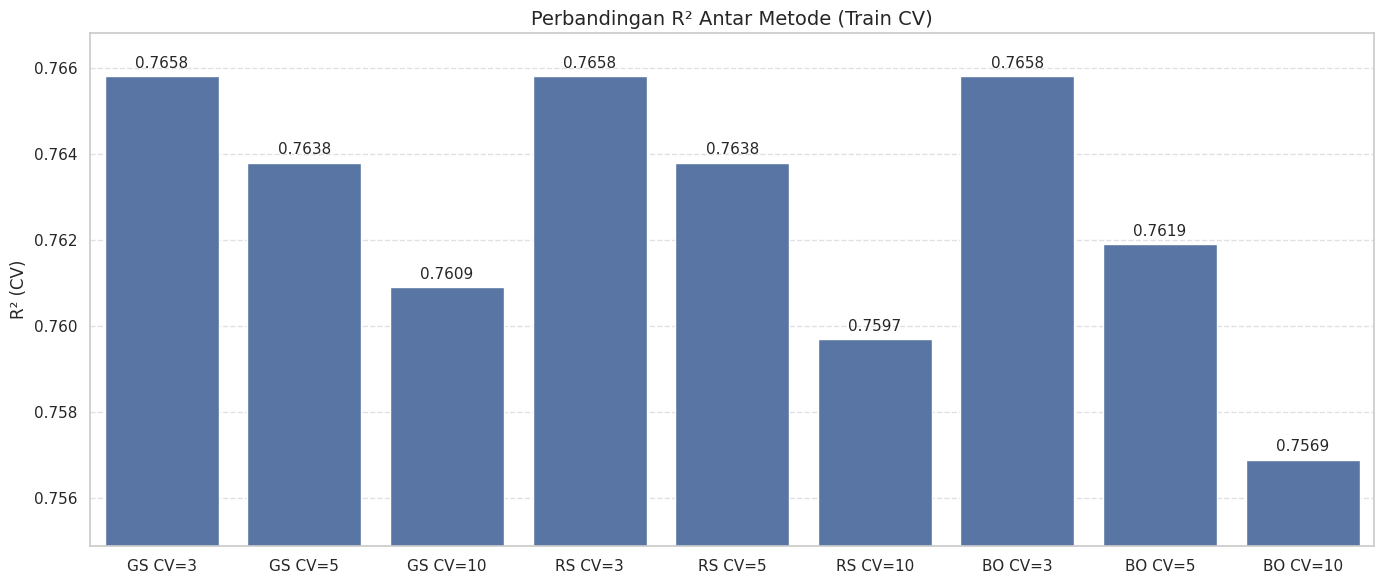

In [ ]:
# R Squared Train
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="Metode_singkat",
    y="R2_CV",
    errorbar=None
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=11,
        xytext=(0, 4),
        textcoords="offset points"
    )

plt.ylim(
    plot_df["R2_CV"].min() - 0.002,
    plot_df["R2_CV"].max() + 0.001
)

plt.title("Perbandingan R² Antar Metode (Train CV)", fontsize=14)
plt.ylabel("R² (CV)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


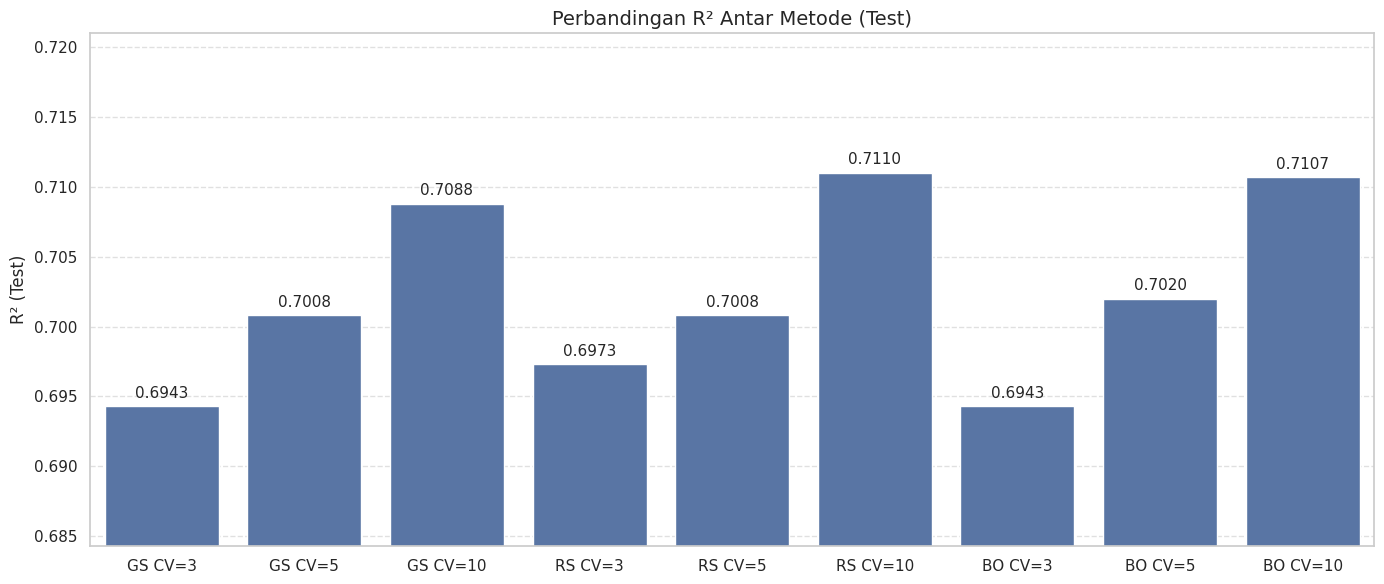

In [ ]:
# R Squared Test
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="Metode_singkat",
    y="R2_Test",
    errorbar=None
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=11,
        xytext=(0, 4),
        textcoords="offset points"
    )

plt.ylim(
    plot_df["R2_Test"].min() - 0.01,
    plot_df["R2_Test"].max() + 0.01
)

plt.title("Perbandingan R² Antar Metode (Test)", fontsize=14)
plt.ylabel("R² (Test)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


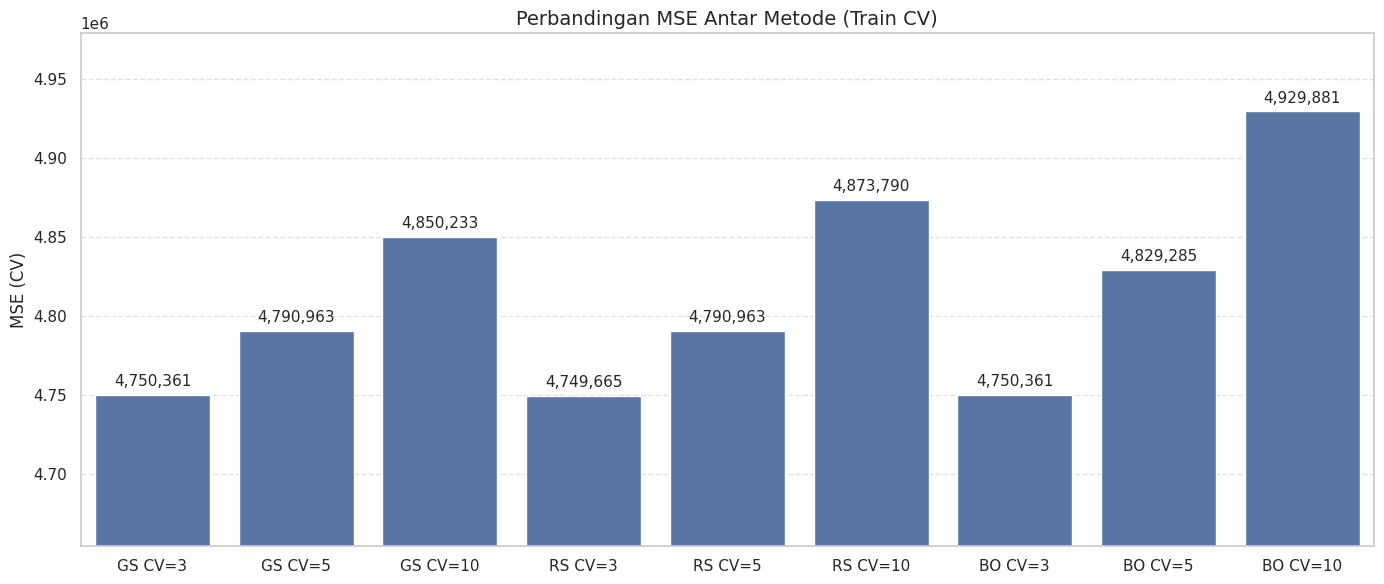

In [ ]:
# MSE Train
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="Metode_singkat",
    y="MSE_CV",
    errorbar=None
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=11,
        xytext=(0, 4),
        textcoords="offset points"
    )

plt.ylim(
    plot_df["MSE_CV"].min() * 0.98,
    plot_df["MSE_CV"].max() * 1.01
)

plt.title("Perbandingan MSE Antar Metode (Train CV)", fontsize=14)
plt.ylabel("MSE (CV)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


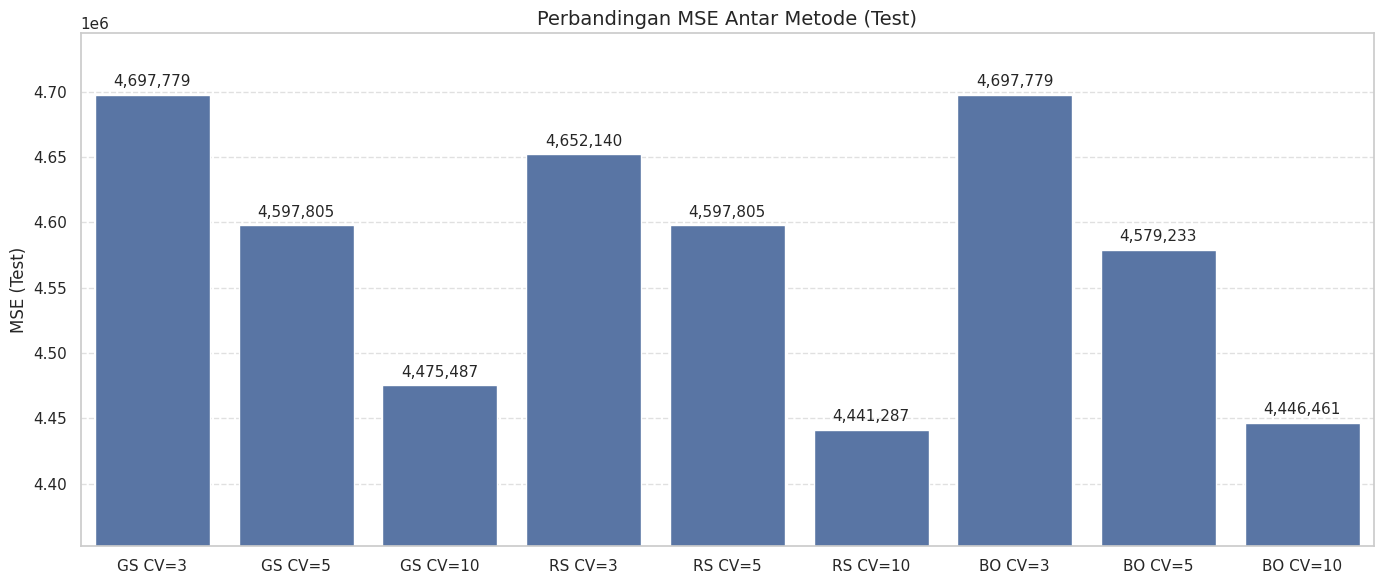

In [ ]:
# MSE Test
plot_df["MSE_Test"] = (
    plot_df["MSE_Test"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="Metode_singkat",
    y="MSE_Test",
    errorbar=None
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=11,
        xytext=(0, 4),
        textcoords="offset points"
    )

plt.ylim(
    plot_df["MSE_Test"].min() * 0.98,
    plot_df["MSE_Test"].max() * 1.01
)

plt.title("Perbandingan MSE Antar Metode (Test)", fontsize=14)
plt.ylabel("MSE (Test)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


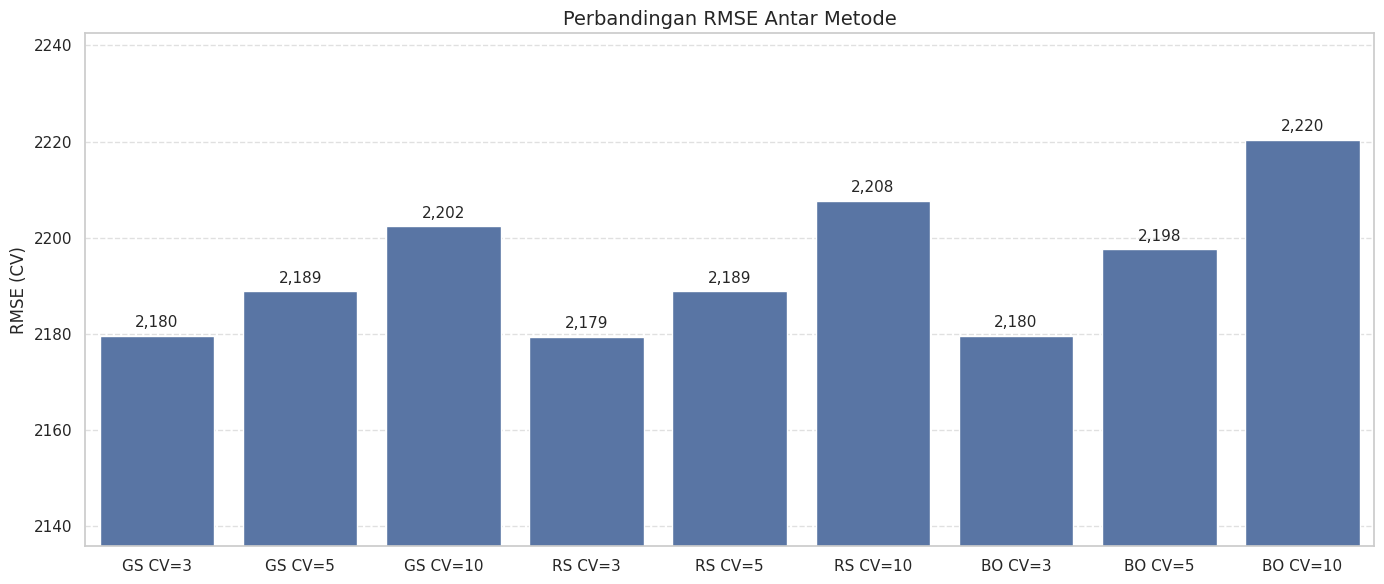

In [ ]:
# RMSE Train
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="Metode_singkat",
    y="RMSE_CV",
    errorbar=None
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=11,
        xytext=(0, 4),
        textcoords="offset points"
    )

plt.ylim(
    plot_df["RMSE_CV"].min() * 0.98,
    plot_df["RMSE_CV"].max() * 1.01
)

plt.title("Perbandingan RMSE Antar Metode", fontsize=14)
plt.ylabel("RMSE (CV)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


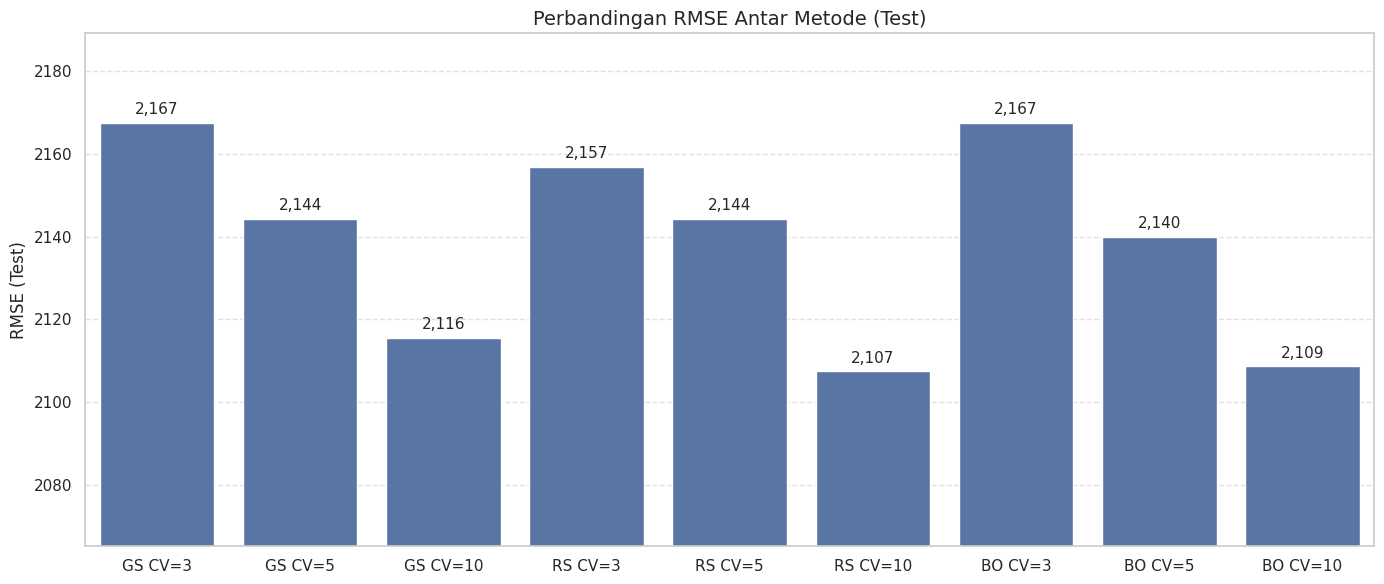

In [ ]:
# RMSE Test
plot_df["RMSE_Test"] = (
    plot_df["RMSE_Test"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="Metode_singkat",
    y="RMSE_Test",
    errorbar=None
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=11,
        xytext=(0, 4),
        textcoords="offset points"
    )

plt.ylim(
    plot_df["RMSE_Test"].min() * 0.98,
    plot_df["RMSE_Test"].max() * 1.01
)

plt.title("Perbandingan RMSE Antar Metode (Test)", fontsize=14)
plt.ylabel("RMSE (Test)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


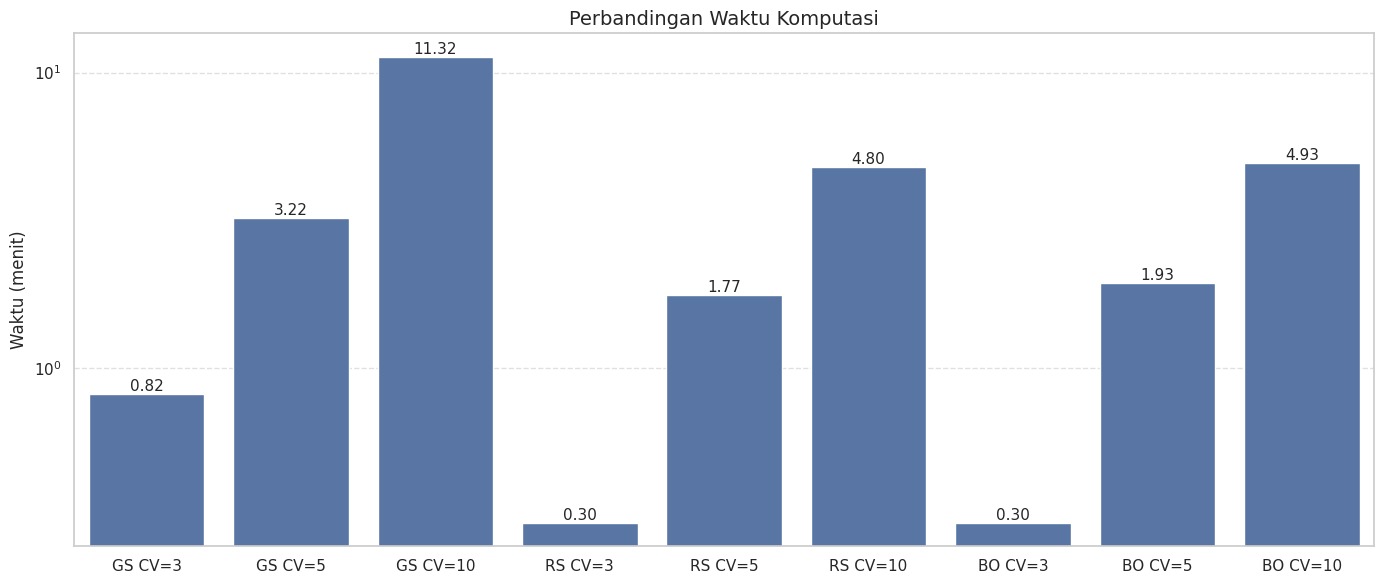

In [ ]:
# Waktu Komputasi
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="Metode_singkat",
    y="Waktu_menit",
    errorbar=None
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=11
    )

plt.yscale("log")
plt.title("Perbandingan Waktu Komputasi", fontsize=14)
plt.ylabel("Waktu (menit)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


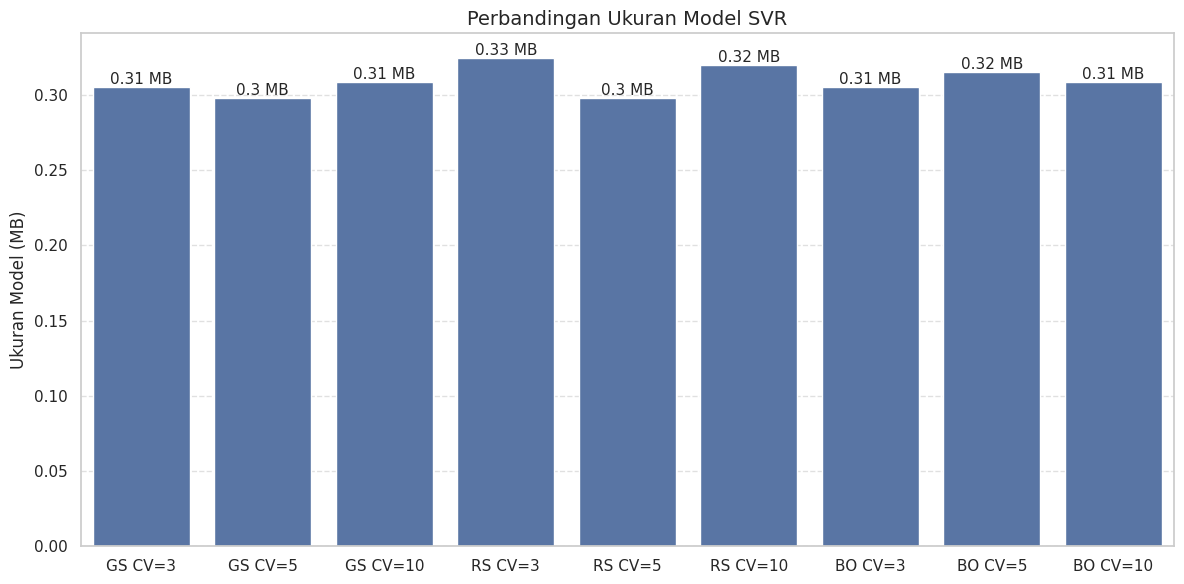

In [ ]:
# Ukuran Model
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=plot_df, x="Metode_singkat", y="Ukuran_MB", errorbar=None)

for p in ax.patches:
    h = p.get_height()
    label = f"{h:.2f}".rstrip("0").rstrip(".")
    ax.annotate(f"{label} MB",
                (p.get_x() + p.get_width()/2, h),
                ha="center", va="bottom", fontsize=11)

plt.title("Perbandingan Ukuran Model SVR", fontsize=14)
plt.ylabel("Ukuran Model (MB)")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

###**9. SAVE BEST MODEL**

In [ ]:
import joblib
import os

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)

# BASELINE
joblib.dump(
    baseline_model,
    f"{SAVE_DIR}/baseline_svr.pkl"
)

# GRID SEARCH
joblib.dump(best_model_gs_cv3,  f"{SAVE_DIR}/gs_cv3_svr.pkl")
joblib.dump(best_model_gs_cv5,  f"{SAVE_DIR}/gs_cv5_svr.pkl")
joblib.dump(best_model_gs_cv10, f"{SAVE_DIR}/gs_cv10_svr.pkl")

# RANDOM SEARCH
joblib.dump(best_model_rs_cv3,  f"{SAVE_DIR}/rs_cv3_svr.pkl")
joblib.dump(best_model_rs_cv5,  f"{SAVE_DIR}/rs_cv5_svr.pkl")
joblib.dump(best_model_rs_cv10, f"{SAVE_DIR}/rs_cv10_svr.pkl")

# BAYESIAN OPTIMIZATIO
joblib.dump(best_model_bo_cv3,  f"{SAVE_DIR}/bo_cv3_svr.pkl")
joblib.dump(best_model_bo_cv5,  f"{SAVE_DIR}/bo_cv5_svr.pkl")
joblib.dump(best_model_bo_cv10, f"{SAVE_DIR}/bo_cv10_svr.pkl")

print("✅ Semua model berhasil disimpan ke folder 'saved_models'")


✅ Semua model berhasil disimpan ke folder 'saved_models'
